<div style="text-align: center; font-size: 30px;"> Cible 1 : TotalGHGEmissions </div>

# Importation des bibliothèques

In [1033]:
!pip install xgboost

In [1034]:
!pip install shap

In [1035]:
# Importation des bibliothèques nécessaires
# -----------------------------------------

# Manipulation et analyse des données
import pandas as pd  # Gestion des données sous forme de DataFrame
import numpy as np  # Calculs mathématiques avancés

# Visualisation des données
import missingno as msno  # Visualisation des valeurs manquantes
import matplotlib.pyplot as plt  # Graphiques statiques
import seaborn as sns  # Graphiques statistiques avancés

# Statistiques et tests d'hypothèses
from scipy.stats import (
    spearmanr,  # Test de corrélation de Spearman
    shapiro,  # Test de normalité de Shapiro-Wilk
    chi2_contingency,  # Test du chi carré pour relations entre variables catégorielles
)
import scipy.stats as stats  # Fonctions statistiques générales

# Gestion des dates
from datetime import datetime  # Manipulation des dates et heures

# Préparation des données (Encodage, normalisation, transformations)
from sklearn.preprocessing import (
    StandardScaler,  # Normalisation des données
    MinMaxScaler,  # Mise à l'échelle entre 0 et 1
    RobustScaler,  # Normalisation robuste aux valeurs extrêmes
    LabelEncoder,  # Encodage des variables catégoriques
    PowerTransformer,  # Transformation des distributions (Yeo-Johnson, Box-Cox)
    FunctionTransformer,  # Transformation personnalisée des données
    PolynomialFeatures,  # Création de variables polynomiales
    Binarizer,  # Binarisation des données
    OneHotEncoder,  # Encodage One Hot pour variables catégoriques
    KBinsDiscretizer,  # Discrétisation des données en intervalles
)
from sklearn.impute import KNNImputer  # Imputation des valeurs manquantes avec K plus proches voisins

# Modélisation et évaluation
from sklearn.linear_model import LinearRegression  # Régression linéaire
from sklearn.ensemble import RandomForestRegressor  # Modèle Random Forest
from sklearn.tree import DecisionTreeRegressor  # Arbre de décision
from sklearn.svm import SVR  # Support Vector Regression
import xgboost as xgb  # XGBoost

# Métriques d'évaluation
from sklearn.metrics import (
    mean_absolute_error,  # Erreur absolue moyenne (MAE)
    mean_squared_error,  # Erreur quadratique moyenne (MSE)
    r2_score,  # Coefficient de détermination (R²)
    make_scorer,  # Création de métriques personnalisées
    mean_absolute_percentage_error  # Erreur absolue moyenne en pourcentage (MAPE)
)

# Statistiques avancées
from statsmodels.stats.stattools import durbin_watson  # Test d'autocorrélation de Durbin-Watson
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Facteur d'inflation de la variance (VIF)

# Division des données et validation croisée
from sklearn.model_selection import (
    train_test_split,  # Séparation des données en train/test
    cross_validate,  # Validation croisée
    GridSearchCV,  # Recherche d'hyperparamètres par validation croisée
    cross_val_predict,  # Prédiction croisée
    StratifiedKFold  # Validation croisée stratifiée
)

# Pipelines et transformations avancées
from sklearn.pipeline import Pipeline  # Construction de pipelines de traitement
from sklearn.compose import ColumnTransformer  # Transformation des colonnes spécifiques
from sklearn.compose import TransformedTargetRegressor  # Transformation appliquée à la cible

# Interprétabilité des modèles
import shap  # Analyse de l'importance des variables

# Gestion du temps d'exécution
import time  # Mesure du temps de calcul

# Importation des données

In [1036]:
import pickle

# Charger X
with open('X.pkl', 'rb') as fichier_X:
    X = pickle.load(fichier_X)

# Charger X_temp
with open('X_temp.pkl', 'rb') as fichier_X_temp:
    X_temp = pickle.load(fichier_X_temp)

# Charger y
with open('y.pkl', 'rb') as fichier_y:
    y = pickle.load(fichier_y)

# Charger y2
with open('y2.pkl', 'rb') as fichier_y2:
    y2 = pickle.load(fichier_y2)

print("Tableaux chargés avec succès !")

Tableaux chargés avec succès !


In [1037]:
X.head()

LargestPropertyUseType CouncilDistrictCode  age_propriete  \
0  Hôtellerie et lieux de culte                   7             98   
1  Hôtellerie et lieux de culte                   7             29   
2  Hôtellerie et lieux de culte                   7             56   
3  Hôtellerie et lieux de culte                   7             99   
4  Hôtellerie et lieux de culte                   7             45   

   Proportion_Electricité  Proportion_Gaz  NumberofBuildings  NumberofFloors  \
0                    0.55            0.18                  1              12   
1                    0.39            0.61                  1              11   
2                    0.68            0.02                  1              41   
3                    0.41            0.27                  1              10   
4                    0.38            0.62                  1              18   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  ENERGYSTARScore  
0                   88434                    88434.0             60.0  
1                   88502                    83880.0             61.0  
2                  759392                   756493.0             43.0  
3                   61320                    61320.0             56.0  
4                  113580                   123445.0             75.0

Nos variables cibles seront "TotalGHGEmissions" et "SiteEnergyUse(kBtu)".

In [1038]:
X_copie = X.copy()

In [1039]:
X_Energy = X.copy()

In [1040]:
X = X_copie.copy()

In [1041]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 3347
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     939 non-null    object  
 1   CouncilDistrictCode        939 non-null    category
 2   age_propriete              939 non-null    int64   
 3   Proportion_Electricité     939 non-null    float64 
 4   Proportion_Gaz             939 non-null    float64 
 5   NumberofBuildings          939 non-null    int32   
 6   NumberofFloors             939 non-null    int64   
 7   PropertyGFABuilding(s)     939 non-null    int64   
 8   LargestPropertyUseTypeGFA  939 non-null    float64 
 9   ENERGYSTARScore            939 non-null    float64 
dtypes: category(1), float64(4), int32(1), int64(3), object(1)
memory usage: 70.7+ KB


In [1042]:
X = X.drop(columns=["ENERGYSTARScore"])

Conversion de LargestPropertyUseType en catégorie : Cette colonne représente un type de propriété, qui est une variable qualitative. En la convertissant en une variable de type category, nous optimisons la mémoire et nous permettons aux modèles qui gèrent les variables catégorielles (comme les arbres de décision) de l'exploiter de manière plus efficace. Cela permet aussi une meilleure gestion des variables non numériques, car elles seront traitées sous forme d'indices numériques internes.

Conversion de age_propriete et NumberofBuildings en float : Ces deux variables représentent des mesures numériques qui, bien que déjà quantitatives, sont initialement stockées dans des types int ou int64. Les convertir en float est utile pour la normalisation future et pour les modèles qui requièrent des variables en format float (par exemple, les régressions ou les modèles de machine learning qui fonctionnent mieux avec des valeurs continues plutôt que discrètes). Cela permet également d'éviter les erreurs de type lors de l'application de transformations mathématiques, telles que la normalisation.

In [1043]:
# Convertir 'LargestPropertyUseType' en catégorie
X['LargestPropertyUseType'] = X['LargestPropertyUseType'].astype('category')

# Convertir 'age_propriete' et 'NumberofBuildings' en float
X['age_propriete'] = X['age_propriete'].astype(float)
X['NumberofBuildings'] = X['NumberofBuildings'].astype(float)

In [1044]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 3347
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     939 non-null    category
 1   CouncilDistrictCode        939 non-null    category
 2   age_propriete              939 non-null    float64 
 3   Proportion_Electricité     939 non-null    float64 
 4   Proportion_Gaz             939 non-null    float64 
 5   NumberofBuildings          939 non-null    float64 
 6   NumberofFloors             939 non-null    int64   
 7   PropertyGFABuilding(s)     939 non-null    int64   
 8   LargestPropertyUseTypeGFA  939 non-null    float64 
dtypes: category(2), float64(5), int64(2)
memory usage: 60.8 KB


## 1ère régression linéaire

### Étape 1 : Séparer les données en ensemble d'entraînement et ensemble de test
La première étape consiste à séparer les données en deux ensembles distincts : un ensemble d'entraînement et un ensemble de test. L'ensemble d'entraînement est utilisé pour entraîner le modèle, c'est-à-dire pour ajuster ses paramètres en fonction des données. L'ensemble de test est réservé pour évaluer la performance du modèle sur des données qu'il n'a pas vues auparavant. Cela permet de tester sa capacité à généraliser ses prédictions à de nouvelles données. Généralement, on utilise environ 80 % des données pour l'entraînement et 20 % pour le test.

Pourquoi la stratification ?<br>
La stratification consiste à s'assurer que les proportions des différentes classes ou groupes (les valeurs d'émissions) sont bien respectées entre les ensembles d'entraînement et de test. Cela devient particulièrement important lorsque les données sont déséquilibrées (par exemple, lorsqu'il y a peu de valeurs extrêmes ou des groupes sous-représentés). En stratifiant, on évite que certaines classes, comme les outliers ou des groupes minoritaires, soient exclusivement présentes dans l'ensemble d'entraînement ou dans l'ensemble de test, ce qui pourrait biaiser l'évaluation du modèle. La stratification garantit donc que chaque ensemble contiendra une proportion similaire de chaque catégorie, ce qui assure une évaluation plus juste et réaliste de la performance du modèle.

In [1045]:
# Création des bins pour stratification
y_bins = pd.qcut(y, q=150, labels=False) 
# Séparer les données en train (80%) et test (20%) avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_bins
)

#### Distribution de y_train

In [1046]:
 y_train.describe()

count      751.000000
mean       166.962144
std        629.512694
min          0.810000
25%         20.110000
50%         48.130000
75%        133.255000
max      12307.160000
Name: TotalGHGEmissions, dtype: float64

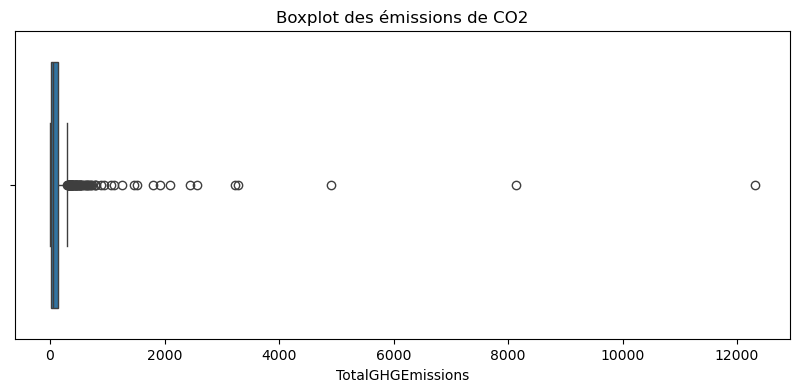

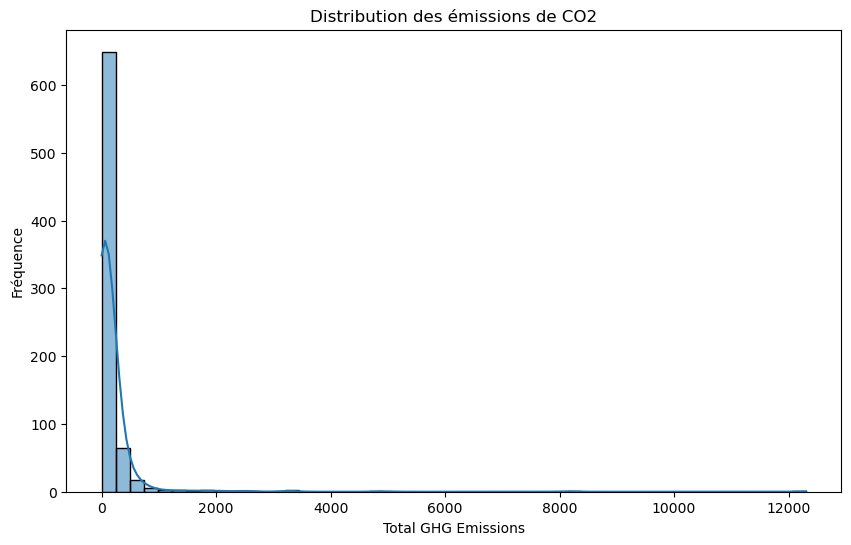

In [1047]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train)
plt.title('Boxplot des émissions de CO2')
plt.show()

# Histogramme 
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=50, kde=True)
plt.title('Distribution des émissions de CO2')
plt.xlabel('Total GHG Emissions')
plt.ylabel('Fréquence')
plt.show()

#### Distribution de y_test

In [1048]:
y_test.describe()

count      188.000000
mean       211.302234
std        920.467848
min          0.870000
25%         19.417500
50%         47.920000
75%        133.932500
max      10734.570000
Name: TotalGHGEmissions, dtype: float64

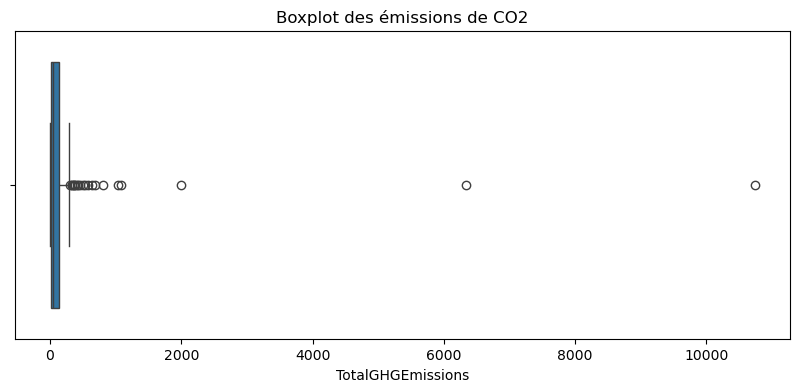

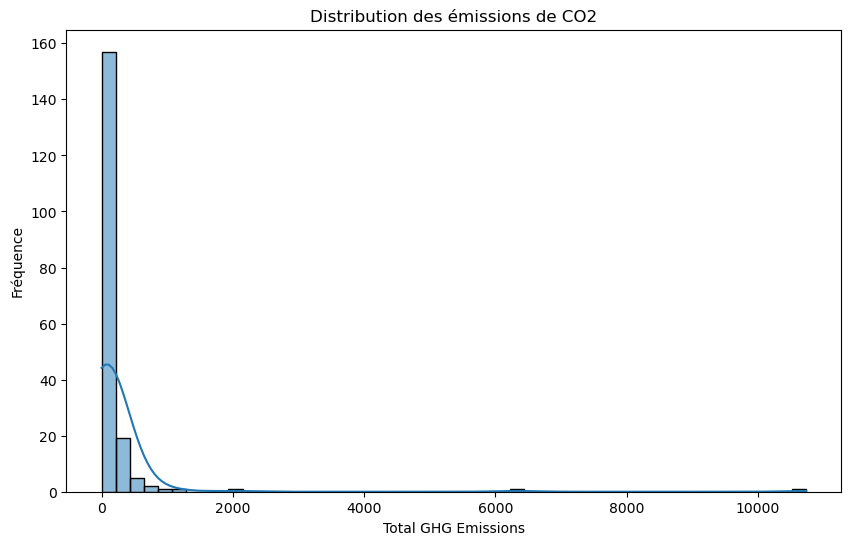

In [1049]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=y_test)
plt.title('Boxplot des émissions de CO2')
plt.show()

# Histogramme 
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=50, kde=True)
plt.title('Distribution des émissions de CO2')
plt.xlabel('Total GHG Emissions')
plt.ylabel('Fréquence')
plt.show()

#### Distribution des variables de X_train

In [1050]:
X_train.describe()

age_propriete  Proportion_Electricité  Proportion_Gaz  \
count     751.000000              751.000000      751.000000   
mean       62.375499                0.720453        0.256405   
std        31.798409                0.266133        0.265387   
min        10.000000                0.000000        0.000000   
25%        37.500000                0.510000        0.000000   
50%        58.000000                0.750000        0.180000   
75%        87.000000                1.000000        0.470000   
max       125.000000                1.000000        1.000000   

       NumberofBuildings  NumberofFloors  PropertyGFABuilding(s)  \
count         751.000000      751.000000            7.510000e+02   
mean            1.046605        4.912117            1.106953e+05   
std             0.469566        7.665698            1.822574e+05   
min             1.000000        1.000000            1.630000e+04   
25%             1.000000        1.000000            3.020600e+04   
50%             1.000000        3.000000            5.066000e+04   
75%             1.000000        5.000000            1.046430e+05   
max             8.000000       76.000000            1.765970e+06   

       LargestPropertyUseTypeGFA  
count               7.510000e+02  
mean                1.031937e+05  
std                 1.686838e+05  
min                 8.061000e+03  
25%                 2.823100e+04  
50%                 4.800600e+04  
75%                 1.031810e+05  
max                 1.680937e+06

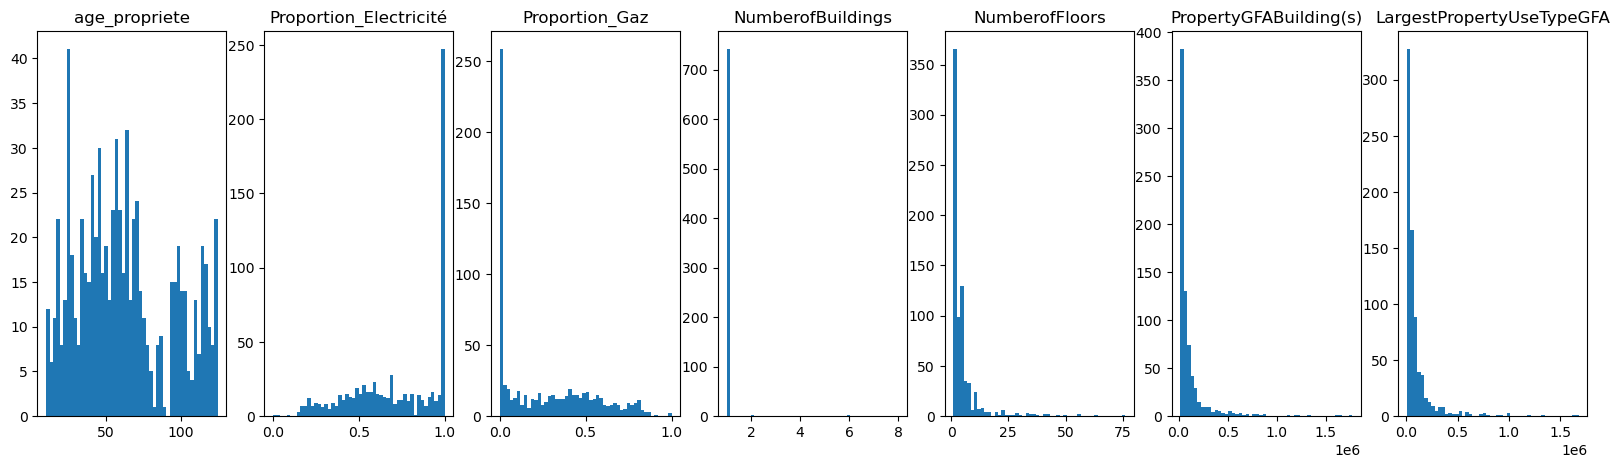

In [1051]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(1, 7, figsize=(20, 5))  # fig et axs doivent être définis avant

variables = ['age_propriete','Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA']

for i, column in enumerate(variables):
    axs[i].hist(X_train[column], bins=50)
    axs[i].set_title(column)

plt.show()

#### Distribution des variables de X_test

In [1052]:
X_test.describe()

age_propriete  Proportion_Electricité  Proportion_Gaz  \
count     188.000000              188.000000      188.000000   
mean       61.702128                0.762447        0.214043   
std        31.368205                0.252412        0.250876   
min        10.000000                0.120000        0.000000   
25%        37.000000                0.577500        0.000000   
50%        57.000000                0.850000        0.110000   
75%        94.250000                1.000000        0.390000   
max       125.000000                1.000000        0.880000   

       NumberofBuildings  NumberofFloors  PropertyGFABuilding(s)  \
count         188.000000      188.000000            1.880000e+02   
mean            1.058511        5.462766            1.153820e+05   
std             0.622039        7.034955            1.879466e+05   
min             1.000000        1.000000            1.620000e+04   
25%             1.000000        2.000000            2.865100e+04   
50%             1.000000        3.000000            4.792750e+04   
75%             1.000000        5.250000            1.147470e+05   
max             9.000000       46.000000            1.380959e+06   

       LargestPropertyUseTypeGFA  
count               1.880000e+02  
mean                1.164452e+05  
std                 1.918862e+05  
min                 1.264400e+04  
25%                 2.612350e+04  
50%                 4.799750e+04  
75%                 1.061430e+05  
max                 1.350182e+06

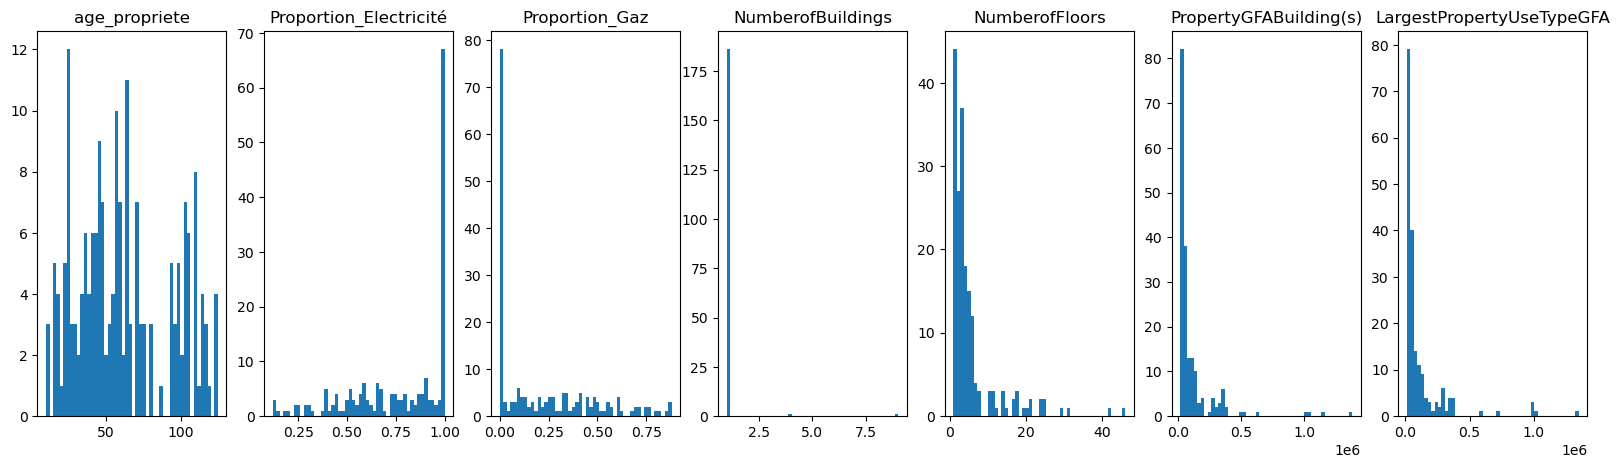

In [1053]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(1, 7, figsize=(20, 5))  # fig et axs doivent être définis avant

for i, column in enumerate(variables):
    axs[i].hist(X_test[column], bins=50)
    axs[i].set_title(column)

plt.show()

### Étape 2 : Créer et entraîner un modèle linéaire simple
Une fois les données séparées, nous passons à la création du modèle. Pour ce premier modèle, nous choisissons une régression linéaire, qui est un modèle simple et efficace pour établir une ligne de base. L'objectif ici est d’entraîner le modèle sur l'ensemble d'entraînement en ajustant les coefficients des variables indépendantes pour minimiser l'erreur entre les prédictions et les valeurs réelles. Ce modèle sera ensuite évalué sur l'ensemble de test.

In [1332]:
# Colonnes numériques : Sélectionner toutes les colonnes de type numérique dans X_train
var_numeriques = X_train.select_dtypes(include=['number']).columns.tolist()

# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

# Prétraitement des données explicatives (X)
preprocessing_v1 = ColumnTransformer(
    transformers=[
        # 'drop='first'' permet d'éviter la multicolinéarité en supprimant la première catégorie de chaque variable
        # 'handle_unknown='ignore'' permet de gérer les catégories inconnues pendant la transformation
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle)
    ],
    # L'argument 'remainder' définit ce qui est fait avec les colonnes non spécifiées
    # Ici, 'passthrough' signifie que les colonnes non transformées (les variables numériques) sont laissées telles quelles
    remainder='passthrough',
    # 'force_int_remainder_cols=False' supprime le warning lié au format des colonnes traitées dans la version future de sklearn
    force_int_remainder_cols=False
)

# Création du pipeline avec le modèle
# Le pipeline applique d'abord le prétraitement, puis entraîne un modèle de régression linéaire
pipeline_lr_v1 = Pipeline([
    ('preprocessing', preprocessing_v1),  # Appliquer le prétraitement aux données
    ('model', LinearRegression())  # Appliquer le modèle de régression linéaire
])

# Entraîner le modèle : ajuster le pipeline aux données d'entraînement X_train et y_train
pipeline_lr_v1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode'])])),
                ('model', LinearRegression())])

### Étape 3 : Évaluer le modèle / validation croisée

Lors de l'évaluation de notre modèle de régression linéaire, il est important de sélectionner une métrique qui correspond le mieux à notre problème de prédiction, en fonction de ce que nous cherchons à optimiser. Pour ce projet, où l'objectif est de prédire des valeurs continues comme les émissions de CO2 ou la consommation d'énergie, plusieurs métriques peuvent être utilisées. Voici une explication de trois métriques couramment employées dans ce type de problème :

**R² (R-squared)** :<br>
Le coefficient de détermination (R²) mesure la proportion de la variance dans la variable dépendante qui est prédictible à partir de la ou des variables indépendantes. Sa formule est : **R² = 1 - (Somme des carrés des résidus / Somme totale des carrés)**
Caractéristiques importantes :<br>
R² peut prendre des valeurs entre -∞ et 1.<br>
R² = 1 indique un ajustement parfait du modèle aux données.<br>
R² = 0 signifie que le modèle ne fait pas mieux que la prédiction par la moyenne.<br>
R² < 0 indique que le modèle performe moins bien que la simple prédiction par la moyenne.<br>

**MAE (Mean Absolute Error)** :<br>
Le MAE mesure l'erreur absolue moyenne entre les prédictions et les valeurs réelles. Cette métrique donne une idée claire de l'erreur moyenne que le modèle commet, sans être influencée par les erreurs extrêmes.
Quand l'utiliser : Le MAE est une bonne métrique lorsque l'on veut une évaluation simple et robuste des erreurs, sans donner un poids trop important aux erreurs exceptionnelles. Il est plus facile à interpréter que d'autres métriques.

**RMSE (Root Mean Squared Error)** :<br>
Le RMSE est similaire au MAE, mais il pénalise davantage les erreurs plus importantes, car les erreurs sont élevées au carré avant d'être moyennées. Cela signifie que le RMSE est plus sensible aux valeurs aberrantes (outliers).
Quand l'utiliser : Le RMSE est approprié lorsque l'on souhaite minimiser l'impact des erreurs importantes. Il peut être utile dans des situations où de grosses erreurs sont particulièrement problématiques, car cette métrique les met en évidence davantage que le MAE.

**MAPE (Mean Absolute Percentage Error)** :<br>
Le MAPE mesure l'erreur absolue en pourcentage entre les prédictions et les valeurs réelles. Il fournit une mesure facile à interpréter de la performance du modèle sous forme de pourcentage, ce qui peut être particulièrement utile lorsque l'on veut comprendre l'erreur par rapport à l'échelle des valeurs réelles.<br>
Caractéristiques importantes :<br>
Le MAPE est exprimé en pourcentage et permet de comparer facilement les performances entre différents modèles.
Une valeur faible du MAPE indique une meilleure précision du modèle.<br>
Le MAPE peut être influencé par les valeurs très faibles de la cible (par exemple, si une cible est proche de zéro, le MAPE peut devenir très élevé même si l'erreur absolue est faible).<br>

Sélection de la métrique pour ce projet : <br>
Dans ce projet de prédiction des émissions de CO2 et/ou de la consommation d'énergie, le choix entre MAE, RMSE, et MAPE dépend de l'importance que l'on accorde à la gestion des grandes erreurs et de la manière dont on souhaite interpréter ces erreurs. Si nous voulons éviter des prédictions très éloignées de la réalité et punir les grosses erreurs, nous privilégierons le RMSE, car il punit plus fortement les grandes erreurs. Si nous cherchons une évaluation plus simple des erreurs moyennes, nous opterons pour le MAE. Le MAPE peut également être très utile pour avoir une idée du pourcentage moyen d'erreur dans nos prédictions. Le R² peut aussi être utilisé pour mesurer la capacité générale du modèle à expliquer la variance, mais il ne fournit pas une vision complète des erreurs de prédiction.

En fonction de ces considérations, nous choisissons la métrique la plus appropriée pour évaluer la performance de notre modèle et déterminer son efficacité.

La validation croisée est une technique utilisée pour évaluer la robustesse du modèle. Elle consiste à diviser les données d’entraînement en plusieurs sous-ensembles appelés folds (généralement 5 ou 10). À chaque itération, le modèle est entraîné sur n-1 folds et testé sur le fold restant. Ce processus est répété pour chaque fold, et la performance du modèle est mesurée à chaque fois. L'avantage de la validation croisée est qu’elle permet de s’assurer que le modèle est stable et qu’il ne souffre pas de sur-apprentissage (overfitting) sur une partie spécifique des données. La moyenne des résultats obtenus sur les différents folds donne une évaluation plus précise de la capacité du modèle à généraliser.

In [1057]:
# Dictionnaire de scoring 
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2',
    'MAPE': make_scorer(mean_absolute_percentage_error)  # Utilisation directe de MAPE
}

# Validation croisée 
cv_results = cross_validate(pipeline_lr_v1, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 166.64195624344873
RMSE moyen sur la validation croisée: 408.6314601992291
R² moyen sur la validation croisée: -0.2773925560299923
MAPE moyen sur la validation croisée: 4.04452752326564


### Conclusion

## Vérification des hypothèses du modèle de régression

Après avoir ajusté notre modèle de régression linéaire, il est crucial de nous pencher sur les hypothèses qui le sous-tendent pour mieux comprendre ses performances et ses éventuelles faiblesses. Il est évident que les résultats préliminaires montrent un modèle peu performant, et il est donc impératif d'examiner en profondeur les hypothèses fondamentales de la régression linéaire.

Ces hypothèses incluent la relation linéaire entre les variables, l'indépendance des erreurs, l'homoscedasticité (constance de la variance des résidus), la normalité des résidus et l'absence de multicolinéarité.

L'objectif de cette section est de démontrer que, bien que notre modèle présente des résultats insatisfaisants pour le moment, une analyse minutieuse des hypothèses peut offrir des pistes d'amélioration. Ce processus nous permettra non seulement d'identifier des problèmes potentiels mais aussi de tester si des ajustements peuvent être réalisés pour améliorer la performance du modèle. Nous allons donc passer en revue chaque hypothèse et discuter de la manière dont ces vérifications pourraient expliquer la faiblesse actuelle du modèle et quelles actions pourraient être entreprises pour l'améliorer.

### Relation linéaire entre les variables explicatives et la cible
Une des hypothèses fondamentales de la régression linéaire est qu'il existe une relation linéaire entre les variables explicatives et la variable cible. Cependant, lors de notre analyse bivariée, il est apparu que cette hypothèse n'est pas satisfaite.

Variables quantitatives : Lors de l'étude des relations entre les variables quantitatives et la cible, nous avons observé qu'elles ne suivent pas une tendance linéaire évidente, ce qui pourrait expliquer la faible performance du modèle.<br>
Variables qualitatives : Pour les variables qualitatives (catégorielles), l'évaluation de la relation avec la cible à été effectuée avec le test de Kruskal-Wallis, selon les hypothèses sous-jacentes des données. <br>
Dans notre cas, les variables comme largestPropertyUseType et CouncilDistrictCode ont montré des différences significatives selon les catégories, ce qui indique que ces variables peuvent influencer la cible.

S’il n’y a pas de relation linéaire entre une ou plusieurs variables prédictives et la variable de réponse, nous avons alors plusieurs options :

- **Appliquez une transformation non linéaire à la variable prédictive**, par exemple en prenant le log ou la racine carrée. Cela peut souvent transformer la relation en une relation plus linéaire.
- Ajoutez une autre variable prédictive au modèle. Par exemple, si le tracé de x en fonction de y a une forme parabolique, il peut être judicieux d’ajouter X 2 comme variable prédictive supplémentaire dans le modèle.

### Absence de multicolinéarité – Résultats de l'analyse bivariée

Une forte corrélation linéaire a été observée entre PropertyGFABuilding(s) et LargestPropertyUseTypeGFA, ce qui pourrait introduire de la multicolinéarité dans le modèle.

**Corrélation brute vs Multicolinéarité** :
La corrélation brute entre deux variables, comme ici entre PropertyGFABuilding(s) et LargestPropertyUseTypeGFA, indique une relation linéaire simple entre elles. Cependant, ce n’est pas suffisant pour conclure qu'il y a de la multicolinéarité dans le modèle. La multicolinéarité fait référence à une situation où plusieurs variables prédictives sont fortement corrélées entre elles conditionnellement aux autres variables du modèle, ce qui peut rendre l'interprétation des coefficients de régression difficile ou instable.

En cas de multicolinéarité, même si deux variables sont fortement corrélées de manière brute, leur effet réel sur la variable cible peut être difficile à estimer correctement, car il y a une redondance dans l'information qu'elles apportent au modèle. Ce phénomène peut entraîner des erreurs standards élevées, des pentes partielles faibles, et des coefficients de régression instables, rendant les prédictions moins fiables.

Conséquences sur le modèle de régression :
Ces relations de corrélation et de dépendance entre variables qualitatives et quantitatives peuvent affecter la multicolinéarité dans le modèle, ce qui pourrait rendre les résultats moins fiables et rendre plus difficile l'estimation des effets des variables explicatives. La présence de multicolinéarité pourrait aussi rendre certaines variables explicatives moins significatives statistiquement, même si elles ont un effet réel sur la variable cible.

Afin d'évaluer la multicolinéarité dans notre modèle, nous allons calculer le Variance Inflation Factor (VIF) pour les variables explicatives. Un VIF élevé (supérieur à 10) indique une multicolinéarité significative, suggérant que certaines variables pourraient être redondantes et devraient peut-être être exclues ou combinées pour améliorer la stabilité du modèle.

In [1058]:
# On ne garde que les colonnes numériques pour le calcul du VIF
# Cela exclut les colonnes booléennes issues du One-Hot Encoding
# car le VIF n'est pas approprié pour les variables catégorielles encodées
X_train_numeric = X_train.select_dtypes(include=[np.number])

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Afficher les résultats
print(vif_data)

                    Variable        VIF
0              age_propriete   4.763215
1     Proportion_Electricité   6.107041
2             Proportion_Gaz   2.682262
3          NumberofBuildings   7.329829
4             NumberofFloors   4.778259
5     PropertyGFABuilding(s)  24.090474
6  LargestPropertyUseTypeGFA  28.155852


Le VIF mesure à quel point la variance d'une variable explicative est gonflée à cause de la colinéarité avec les autres variables du modèle. En d'autres termes, il indique combien plus de "variabilité" chaque variable a en raison de la corrélation avec les autres variables. Un VIF élevé (supérieur à 10, voire 5 dans certains cas) indique une forte colinéarité et suggère que la variable pourrait être redondante par rapport aux autres.

Les variables PropertyGFABuilding(s) et LargestPropertyUseTypeGFA présentent des VIF très élevés, indiquant une colinéarité importante avec d'autres variables. <br>
Étant donné que vous avez constaté que les variables PropertyGFABuilding(s) et LargestPropertyUseTypeGFA sont fortement corrélées lors de l'analyse bivariée, l'élevé VIF pour ces deux variables est tout à fait logique. Cela renforce l'idée qu'il y a une redondance d'information entre elles, ce qui peut nuire à la stabilité et à la fiabilité du modèle.<br>

Il serait prudent de considérer leur **élimination**, de les combiner, ou d'appliquer des techniques comme la **réduction de dimensionnalité**.<br>
Les autres variables ont des VIF raisonnables, ce qui suggère qu'elles n'introduisent pas une colinéarité excessive dans le modèle.

In [1059]:
# Suppression de la colonne
X_train_numeric = X_train_numeric.drop(columns=['LargestPropertyUseTypeGFA'])
print(X_train_numeric.columns)

Index(['age_propriete', 'Proportion_Electricité', 'Proportion_Gaz',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)'],
      dtype='object')


In [1060]:
# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Afficher les résultats
print(vif_data)

                 Variable       VIF
0           age_propriete  4.679711
1  Proportion_Electricité  6.004423
2          Proportion_Gaz  2.679292
3       NumberofBuildings  6.811471
4          NumberofFloors  4.187063
5  PropertyGFABuilding(s)  4.487679


In [1061]:
# Suppression de la colonne
X_train_numeric = X_train_numeric.drop(columns=['Proportion_Electricité'])
print(X_train_numeric.columns)

Index(['age_propriete', 'Proportion_Gaz', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFABuilding(s)'],
      dtype='object')


In [1062]:
# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Afficher les résultats
print(vif_data)

                 Variable       VIF
0           age_propriete  3.506664
1          Proportion_Gaz  2.011904
2       NumberofBuildings  4.085577
3          NumberofFloors  3.945357
4  PropertyGFABuilding(s)  4.406125


En supprimant la variable LargestPropertyUseTypeGFA on constate une amélioration des VIF.

### Indépendance des erreurs et homoscedasticité (Graphique des résidus)

L’hypothèse d’indépendance stipule que les résidus (les erreurs entre les valeurs observées et prédites) doivent être indépendants les uns des autres. Cela signifie que la valeur d’un résidu ne doit pas dépendre de celle des autres.<br>
Si les résidus ne sont pas indépendants (par exemple, s’ils sont corrélés), cela peut indiquer un problème comme une dépendance dans les données (par exemple, une série chronologique où les observations sont liées dans le temps). Cela peut biaiser les coefficients et rendre les tests statistiques invalides.

L'homoscédasticité est une condition importante pour la régression linéaire. Elle signifie que les résidus du modèle doivent avoir une variance constante quelle que soit la valeur des prédictions.
Les erreurs doivent être "également dispersées" autour de la ligne de régression pour toutes les valeurs prédites.
L'homoscédasticité garantit que le modèle attribue un poids égal à toutes les observations.
Si elle est violée, le modèle pourrait sous-estimer ou surestimer la fiabilité de certains coefficients, rendant les prédictions moins fiables.

#### Test de Durbin-Watson

La statistique Durbin-Watson mesure l'autocorrélation des résidus d'un modèle de régression linéaire. Elle évalue si les erreurs sont indépendantes les unes des autres. Ce test détecte l’autocorrélation dans les résidus.<br>
Les résultats du test varient entre 0 et 4 :<br>
Proche de 2 : Pas d’autocorrélation.<br>
Proche de 0 : Autocorrélation positive.<br>
Proche de 4 : Autocorrélation négative.<br>

In [1208]:
# Calcul des prédictions sur le jeu d'entraînement
y_train_pred = pipeline_lr_v1.predict(X_train)

# Calcul des résidus pour le jeu d'entraînement
residuals = y_train - y_train_pred

# Calcul de la statistique Durbin-Watson
dw_stat = durbin_watson(residuals)

print(f"Statistique Durbin-Watson : {dw_stat:.2f}")

Statistique Durbin-Watson : 1.99


#### Graphique des résidus

Le graphique des résidus est un outil visuel utilisé pour évaluer la qualité d'un modèle de régression. Il représente :

- L'axe horizontal : Les valeurs prédites par le modèle.
- L'axe vertical : Les résidus, c'est-à-dire la différence entre les valeurs observées (réelles) et les valeurs prédites par le modèle.

Idéalement, les résidus devraient être répartis de manière aléatoire autour de la ligne horizontale à 0. Cela indiquerait que :

Le modèle n'a pas de biais systématique.
La variance des erreurs est constante (homoscédasticité).
Si une tendance ou un motif apparaît dans le graphique, cela peut indiquer des problèmes, comme une non-linéarité ou une non-homoscédasticité, et suggère que le modèle pourrait être amélioré.

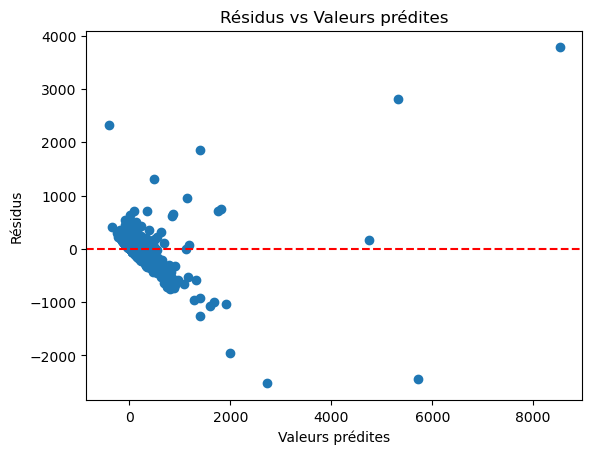

In [1209]:
# Tracer le graphique des résidus
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')  # Ligne horizontale à zéro pour référence
plt.title('Résidus vs Valeurs prédites')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()

Une tendance croissante des résidus apparait sur le graphique, avec des erreurs de plus en plus élevées à mesure que les valeurs prédites augmentent. Cela suggère un phénomène de **non-homoscédasticité**, où la variance des erreurs n'est pas constante et tend à augmenter pour les valeurs prédites élevées. En d'autres termes, le modèle ne parvient pas à expliquer efficacement les variations dans les grandes valeurs cibles, ce qui suggère que les hypothèses sous-jacentes de linéarité et d'homoscédasticité ne sont pas satisfaites.

Cette tendance est un indicateur que l'hypothèse de linéarité du modèle est probablement violée (comme noous l'avons indiqué plus haut). En effet, les modèles linéaires peuvent avoir des difficultés à capturer des relations plus complexes entre les variables, surtout lorsqu'il existe des valeurs extrêmes. De plus, la présence de valeurs résiduelles élevées pour les prédictions élevées pourrait indiquer que certains outliers influencent de manière disproportionnée le modèle. Cependant, lors de l'analyse exploratoire des données, ces outliers ont été jugés pertinents et justifiés, ce qui signifie qu'ils doivent être pris en compte plutôt que supprimés.

En ce qui concerne le test de Durbin-Watson, la statistique obtenue est de 2.31, ce qui suggère qu'il n'y a pas de corrélation significative entre les erreurs. Ce résultat peut sembler en contradiction avec l'observation visuelle des résidus. Le test de Durbin-Watson, bien qu'indiquant une certaine indépendance des erreurs, ne prend pas en compte la non-homoscédasticité ou les outliers présents dans le modèle, d'où la différence entre les résultats des deux analyses.


La non-homoscédasticité observée dans les résidus et les signes de non-linéarité dans le modèle appellent à des ajustements. Une manière courante de traiter ce problème consiste à appliquer des **transformations sur la variable cible**. Par exemple, une transformation logarithmique peut aider à stabiliser la variance des erreurs et à rendre les résidus plus homogènes. Il pourrait également être utile d'appliquer des **transformations sur certaines variables explicatives**, telles que la racine carrée, afin de mieux satisfaire aux hypothèses du modèle.

En résumé, bien que la statistique de Durbin-Watson suggère une certaine indépendance des erreurs, l'observation des résidus indique que des ajustements, notamment des transformations des données, sont nécessaires pour réduire l'impact de la non-homoscédasticité et des outliers, et ainsi améliorer la performance du modèle.

### Normalité des résidus (Histogramme et Q-Q plot)

La normalité des résidus signifie que les erreurs (différences entre les valeurs observées et prédites) dans un modèle de régression suivent une distribution normale ou gaussienne. En d'autres termes, ces erreurs devraient être réparties de manière symétrique autour de zéro, formant une "courbe en cloche".

Pourquoi est-ce important ?
- Fiabilité des tests statistiques : La normalité des résidus permet d'utiliser des tests statistiques courants pour évaluer la significativité du modèle.
- Précision des estimations : Elle assure que les estimations des paramètres du modèle sont les plus précises possibles.
- Validité des intervalles de confiance : Les intervalles de confiance et les prédictions sont plus fiables lorsque cette hypothèse est respectée.

Comment vérifier la normalité des résidus ?
Plusieurs méthodes sont couramment utilisées :
- Histogramme des résidus : Permet une visualisation de la distribution des erreurs
- Test de Shapiro-Wilk : Un test statistique qui évalue formellement la normalité (adapté ici, car notre échantillon de 1165 observations (80% de 1457) se situe dans la plage optimale pour ce test, qui est généralement recommandé pour des échantillons de moins de 2000 observations).
- Graphique Q-Q plot : Compare les quantiles des résidus aux quantiles théoriques d'une distribution normale.

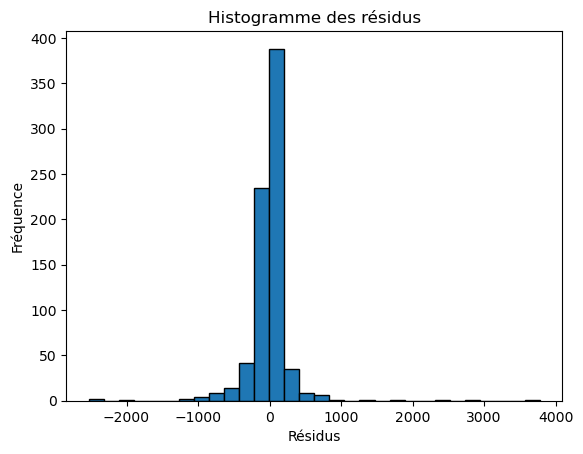

Statistique de Shapiro-Wilk : 0.6037
p-valeur : 0.0000
Les résidus ne suivent pas une distribution normale (on rejette H0).


In [1210]:
# Tracer un histogramme des résidus
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogramme des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Test de Shapiro-Wilk
stat, p_value = shapiro(residuals)

# Affichage des résultats
print(f"Statistique de Shapiro-Wilk : {stat:.4f}")
print(f"p-valeur : {p_value:.4f}")

# Interprétation
alpha = 0.05
if p_value > alpha:
    print("Les résidus suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les résidus ne suivent pas une distribution normale (on rejette H0).")

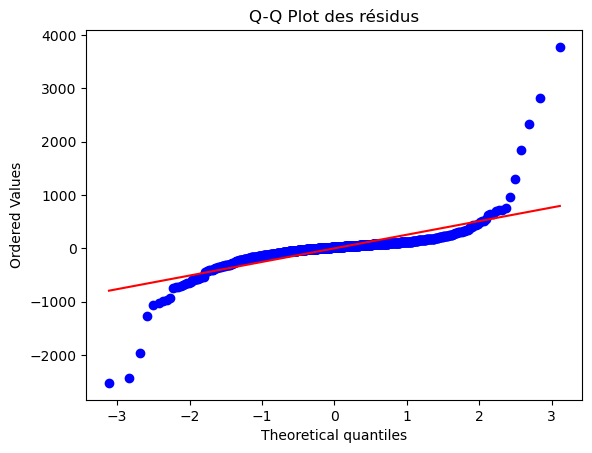

In [1211]:
# Tracer un Q-Q plot pour les résidus
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des résidus')
plt.show()

Un Q-Q plot est un outil graphique qui permet de comparer la distribution de vos données avec une distribution théorique, généralement une distribution normale.

Axes :<br>
L'axe horizontal représente les quantiles théoriques (attendus si les données suivent une distribution normale).<br>
L'axe vertical représente les quantiles observés dans nos données.<br>

Ce qu’on attend :
Si nos données suivent une distribution normale, les points devraient s’aligner étroitement le long de la ligne diagonale (droite d’identité).

Déviations caractéristiques :
Si les points s’écartent significativement de la ligne diagonale, cela indique que les données ne suivent pas une distribution normale.
Éloignement aux extrémités (queues lourdes ou légères) : Les points qui s’éloignent de la ligne diagonale aux extrémités montrent que les queues de la distribution diffèrent de celles d’une normale. Cela peut indiquer une asymétrie, des valeurs extrêmes (outliers), ou des queues plus épaisses ou plus fines que celles d’une normale.

Dans notre graphique, les points suivent globalement la ligne diagonale au centre, ce qui montre que la distribution des résidus est assez proche de la normale dans la partie centrale. Cependant, aux extrémités (queues de la distribution), les points s'éloignent nettement de la ligne diagonale. Cela indique que les queues de notre distribution diffèrent de celles d’une distribution normale.

Signification :
Ces déviations aux extrémités suggèrent la présence de queues épaisses (grandes valeurs absolues des résidus) ou de valeurs extrêmes qui ne s’ajustent pas bien à une distribution normale. Cela pourrait indiquer des outliers ou des phénomènes non capturés par le modèle.

Conclusion
L'analyse du Q-Q plot montre que bien que les résidus soient approximativement normaux au centre de la distribution, les écarts significatifs aux extrémités révèlent une non-normalité dans les queues. Ces observations pourraient justifier des ajustements, comme l’application de transformations sur les variables ou l’examen plus approfondi des outliers pour améliorer l’ajustement du modèle.

Si les résidus montrent une non-normalité, cela peut indiquer que la relation entre la variable cible et les prédicteurs n'est pas linéaire ou que la variance des erreurs n'est pas constante. Voici des transformations possibles :

- Transformation logarithmique : Utiliser log(y) quand la variable cible contient des valeurs positives seulement.
- Racine carrée : Convient pour des données positives avec une distribution asymétrique.
- Box-Cox transformation : Recommandée quand les données sont positives, elle cherche automatiquement la meilleure transformation.
- Yeo-Johnson transformation : Fonctionne même si les données contiennent des valeurs négatives ou nulles.

In [1212]:
# Afficher les 10 plus grandes valeurs des résidus triées par ordre décroissant (valeurs absolues)
print("\nLes 10 plus grandes valeurs des résidus triées par ordre décroissant (valeur absolue) :")
print(residuals.abs().sort_values(ascending=False).head(10))


Les 10 plus grandes valeurs des résidus triées par ordre décroissant (valeur absolue) :
618     3779.240534
124     2819.821020
954     2525.522895
1672    2441.281610
558     2328.232620
2359    1958.026283
1690    1847.946374
3187    1306.750446
1613    1263.450555
292     1063.644452
Name: TotalGHGEmissions, dtype: float64


## Conclusion du premier modèle

Le modèle de régression linéaire initial présente des performances médiocres, avec un R² moyen sur la validation croisée	0.16, indiquant que le modèle n'explique que 1.6% de la variance des données. <br>
Les principaux problèmes identifiés sont :<br>
- Non-linéarité des relations entre variables prédictives et cible
- Forte multicolinéarité entre certaines variables (PropertyGFABuilding(s) et LargestPropertyUseTypeGFA et proportion_elec et proprotion_gaz)
- Non-homoscédasticité des résidus
- Non-normalité des résidus, surtout dans les queues de distribution

Pour améliorer ce modèle, nous devrions :
- Appliquer des transformations non linéaires aux variables prédictives et à la cible (ex: logarithmique, racine carrée)
- Réduire la multicolinéarité en combinant ou supprimant des variables fortement corrélées
- Explorer des interactions entre variables, notamment pour les variables catégorielles significatives

# 2ème régression linéaire

## Etude des transformations sur la cible

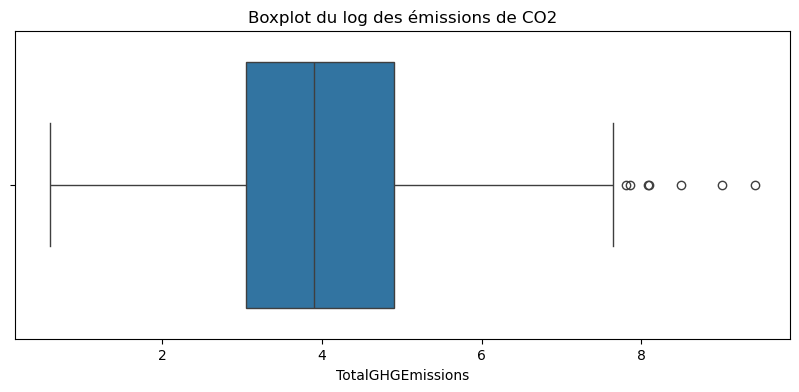

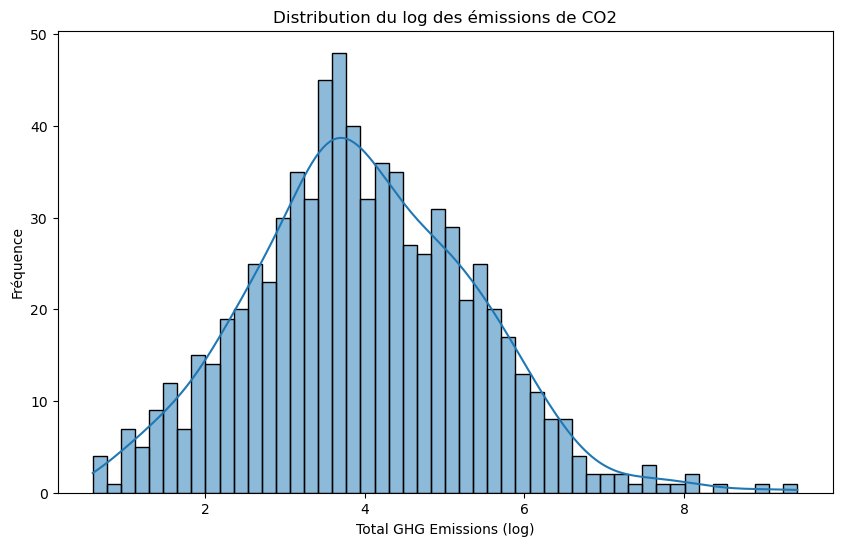

In [1068]:
# Transformation logarithmique sur les Series Pandas
y_train_log = np.log1p(y_train)  # Transformation directe sur la Series

plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train_log)
plt.title('Boxplot du log des émissions de CO2')
plt.show()

# Histogramme 
plt.figure(figsize=(10, 6))
sns.histplot(y_train_log, bins=50, kde=True)
plt.title('Distribution du log des émissions de CO2')
plt.xlabel('Total GHG Emissions (log)')
plt.ylabel('Fréquence')
plt.show()

In [1226]:
y_train_log. describe()

count    751.000000
mean       3.970589
std        1.395614
min        0.593327
25%        3.049747
50%        3.894470
75%        4.899733
max        9.418018
Name: TotalGHGEmissions, dtype: float64

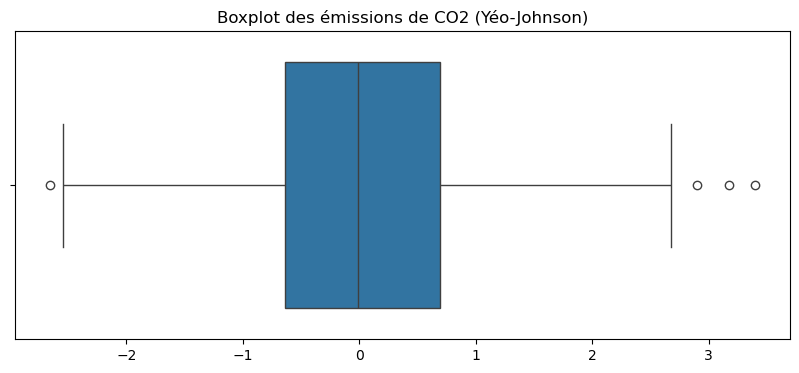

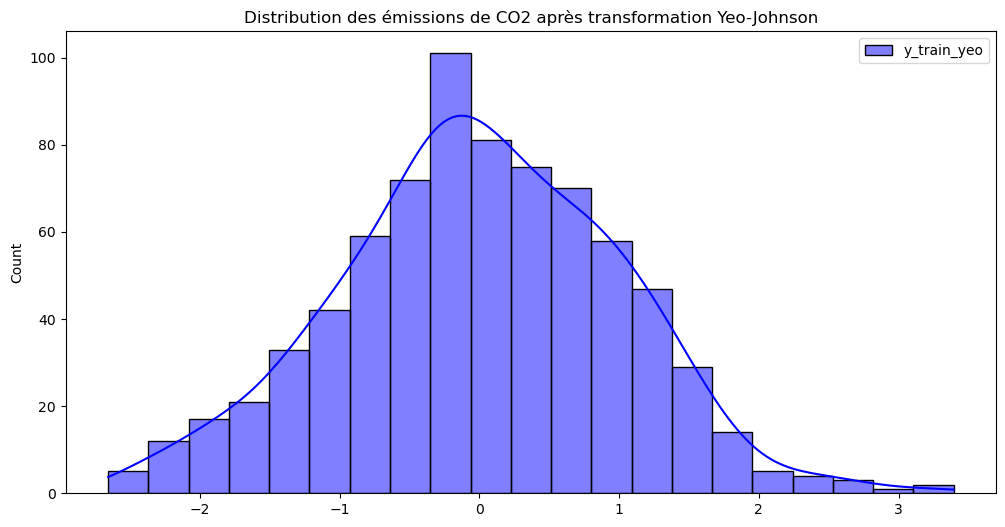

In [1219]:
# Transformation Yeo-Johnson avec standardisation
transformer = PowerTransformer(method='yeo-johnson')
y_train_yeo = transformer.fit_transform(y_train.values.reshape(-1, 1))

# Boxplot des données transformées
plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train_yeo.flatten())  # Utilisez .flatten() pour convertir en 1D
plt.title('Boxplot des émissions de CO2 (Yéo-Johnson)')
plt.show()

# Distribution des données transformées
plt.figure(figsize=(12, 6))
sns.histplot(y_train_yeo.flatten(), kde=True, color='blue', label='y_train_yeo')  # Appliquer .flatten() ici aussi
plt.legend()
plt.title('Distribution des émissions de CO2 après transformation Yeo-Johnson')
plt.show()

In [1228]:
y_train_yeo_series = pd.Series(y_train_yeo.flatten())  # Convertir en Series
print(y_train_yeo_series.describe())

count    7.510000e+02
mean    -1.419193e-16
std      1.000666e+00
min     -2.655448e+00
25%     -6.407593e-01
50%     -1.339870e-02
75%      6.931440e-01
max      3.394205e+00
dtype: float64


Le choix de la transformation logarithmique des émissions de CO2 des bâtiments est préféré pour plusieurs raisons :

- Réduction de l'asymétrie :
Les données brutes des émissions de CO2 des bâtiments sont souvent très asymétriques, avec une majorité de bâtiments ayant de faibles émissions, tandis que quelques-uns en ont des valeurs très élevées. La transformation logarithmique permet de réduire cette asymétrie, ce qui est crucial pour les modèles de régression qui supposent généralement une distribution normale des résidus.

- Interprétabilité et lien avec la réalité :
Bien que les émissions de CO2 soient mesurées en termes absolus (tonnes de CO2), l'échelle des valeurs peut varier énormément entre les bâtiments (par exemple, un petit immeuble de bureaux comparé à un grand complexe commercial ou industriel). Appliquer un logarithme permet de mieux gérer cette grande variance tout en maintenant une structure interprétable et en lien avec la réalité économique, c'est-à-dire, en préservant les relations proportionnelles entre les émissions des bâtiments, ce qui peut être important pour les politiques de réduction des émissions.

- Stabilité et compression des grandes valeurs :
La transformation logarithmique est particulièrement utile dans ce cas car elle "compresse" les très grandes valeurs d'émissions tout en "étirant" les petites valeurs. Cela permet de mieux équilibrer l'impact des différents types de bâtiments et d'éviter qu'un petit nombre de grands émetteurs de CO2 ne dominent l'analyse. Cette approche rend le modèle plus stable et aide à capter des nuances dans les bâtiments ayant de faibles émissions.

En conclusion, le logarithme est plus approprié pour rendre les données plus normales, tout en conservant leur interprétabilité et en traitant de manière efficace les écarts importants entre les émissions des différents bâtiments. C'est pourquoi cette transformation a été retenue pour les étapes suivantes du modèle.

## Etude des transformation sur les variables explicatives

In [1070]:
X_train_copie = X_train.copy()

In [1071]:
X_test_copie = X_test.copy()

In [1072]:
X_train_copie.shape

(751, 9)

In [1073]:
X_train.shape

(751, 9)

In [1074]:
# Supprimer les colonnes 'LargestPropertyUseTypeGFA' et 'Proportion_Electricité' de X_train et X_test
colonnes_a_supprimer = ['LargestPropertyUseTypeGFA', 'Proportion_Electricité']

X_train = X_train.drop(columns=colonnes_a_supprimer)
X_test = X_test.drop(columns=colonnes_a_supprimer)

In [1075]:
# Sélectionner les variables numériques
var_numeriques = X_train.select_dtypes(include=['number']).columns.tolist()
X_train_numeriques = X_train[var_numeriques]

# Appliquer les transformations Log+1 et Racine carrée
X_train_log = np.log1p(X_train_numeriques)
X_train_sqrt = np.sqrt(X_train_numeriques)

# Afficher les statistiques descriptives (describe) avant et après les transformations
print("Statistiques descriptives avant transformation:")
print(X_train_numeriques.describe())

print("\nStatistiques descriptives après transformation Log+1:")
print(X_train_log.describe())

print("\nStatistiques descriptives après transformation Racine carrée:")
print(X_train_sqrt.describe())

Statistiques descriptives avant transformation:
       age_propriete  Proportion_Gaz  NumberofBuildings  NumberofFloors  \
count     751.000000      751.000000         751.000000      751.000000   
mean       62.375499        0.256405           1.046605        4.912117   
std        31.798409        0.265387           0.469566        7.665698   
min        10.000000        0.000000           1.000000        1.000000   
25%        37.500000        0.000000           1.000000        1.000000   
50%        58.000000        0.180000           1.000000        3.000000   
75%        87.000000        0.470000           1.000000        5.000000   
max       125.000000        1.000000           8.000000       76.000000   

       PropertyGFABuilding(s)  
count            7.510000e+02  
mean             1.106953e+05  
std              1.822574e+05  
min              1.630000e+04  
25%              3.020600e+04  
50%              5.066000e+04  
75%              1.046430e+05  
max              1.7

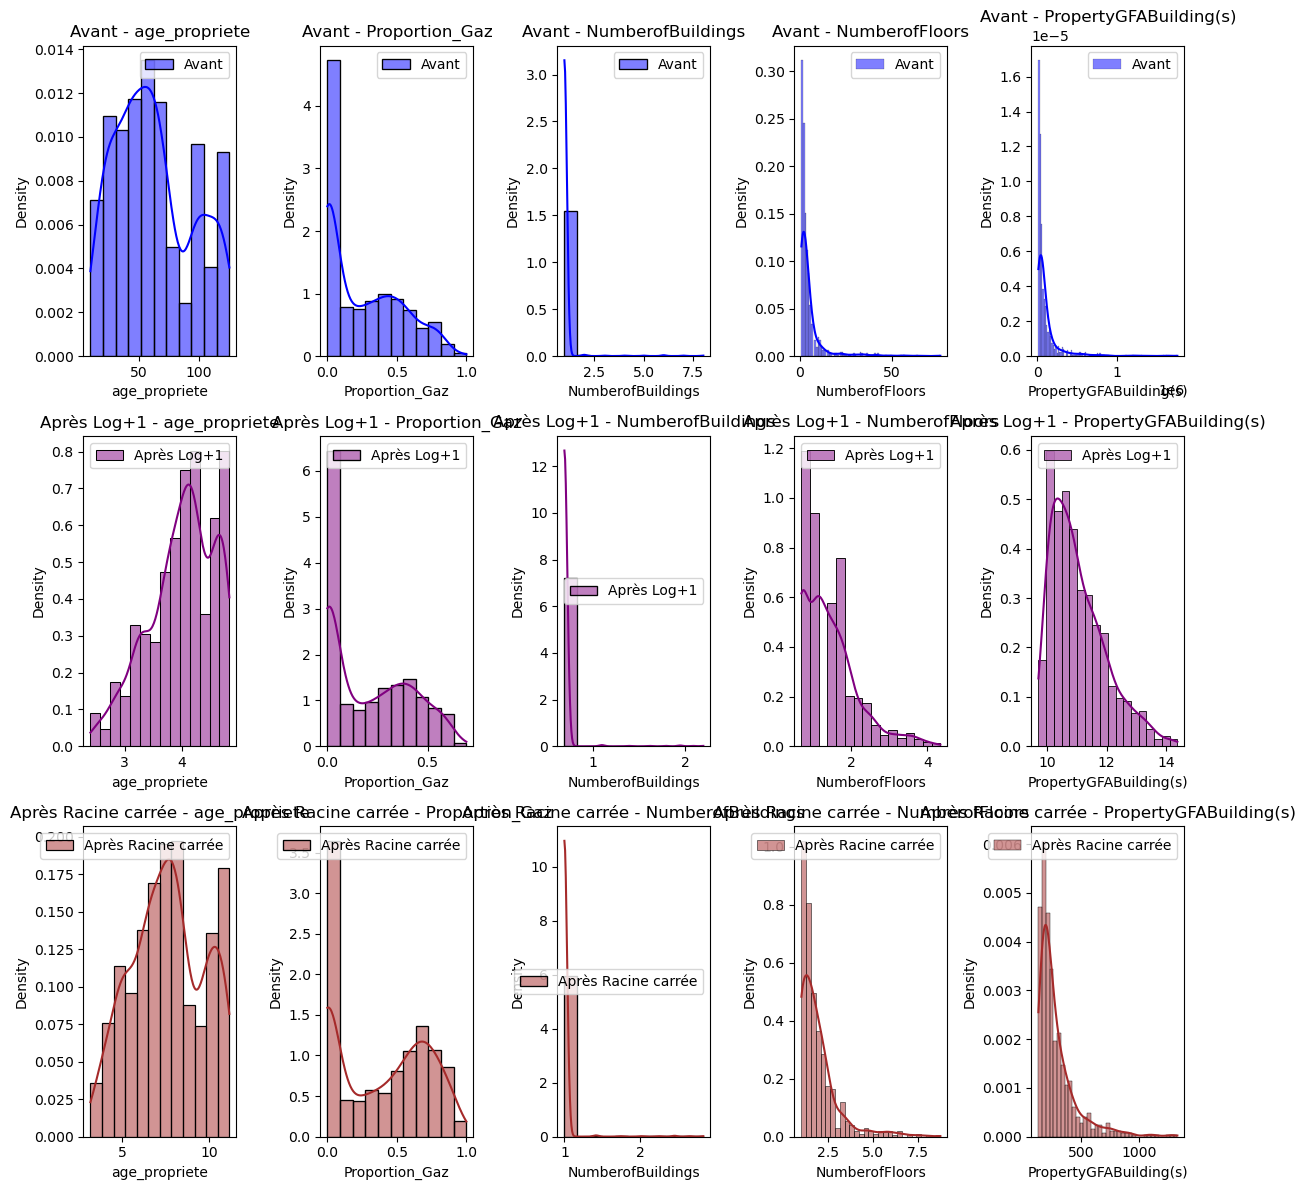

In [1076]:
# Créer les subplots pour chaque ligne (une ligne pour chaque transformation)
plt.figure(figsize=(12, 12))

# Ligne 1: Variables originales
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), i + 1)
    sns.histplot(X_train_numeriques[col], kde=True, color='blue', label='Avant', stat="density")
    plt.legend()
    plt.title(f'Avant - {col}')

# Ligne 2: Log+1 Transformation
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), len(X_train_numeriques.columns) + i + 1)
    sns.histplot(X_train_log[col], kde=True, color='purple', label='Après Log+1', stat="density")
    plt.legend()
    plt.title(f'Après Log+1 - {col}')

# Ligne 3: Racine carrée Transformation
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), 2 * len(X_train_numeriques.columns) + i + 1)
    sns.histplot(X_train_sqrt[col], kde=True, color='brown', label='Après Racine carrée', stat="density")
    plt.legend()
    plt.title(f'Après Racine carrée - {col}')

plt.tight_layout()
plt.show()

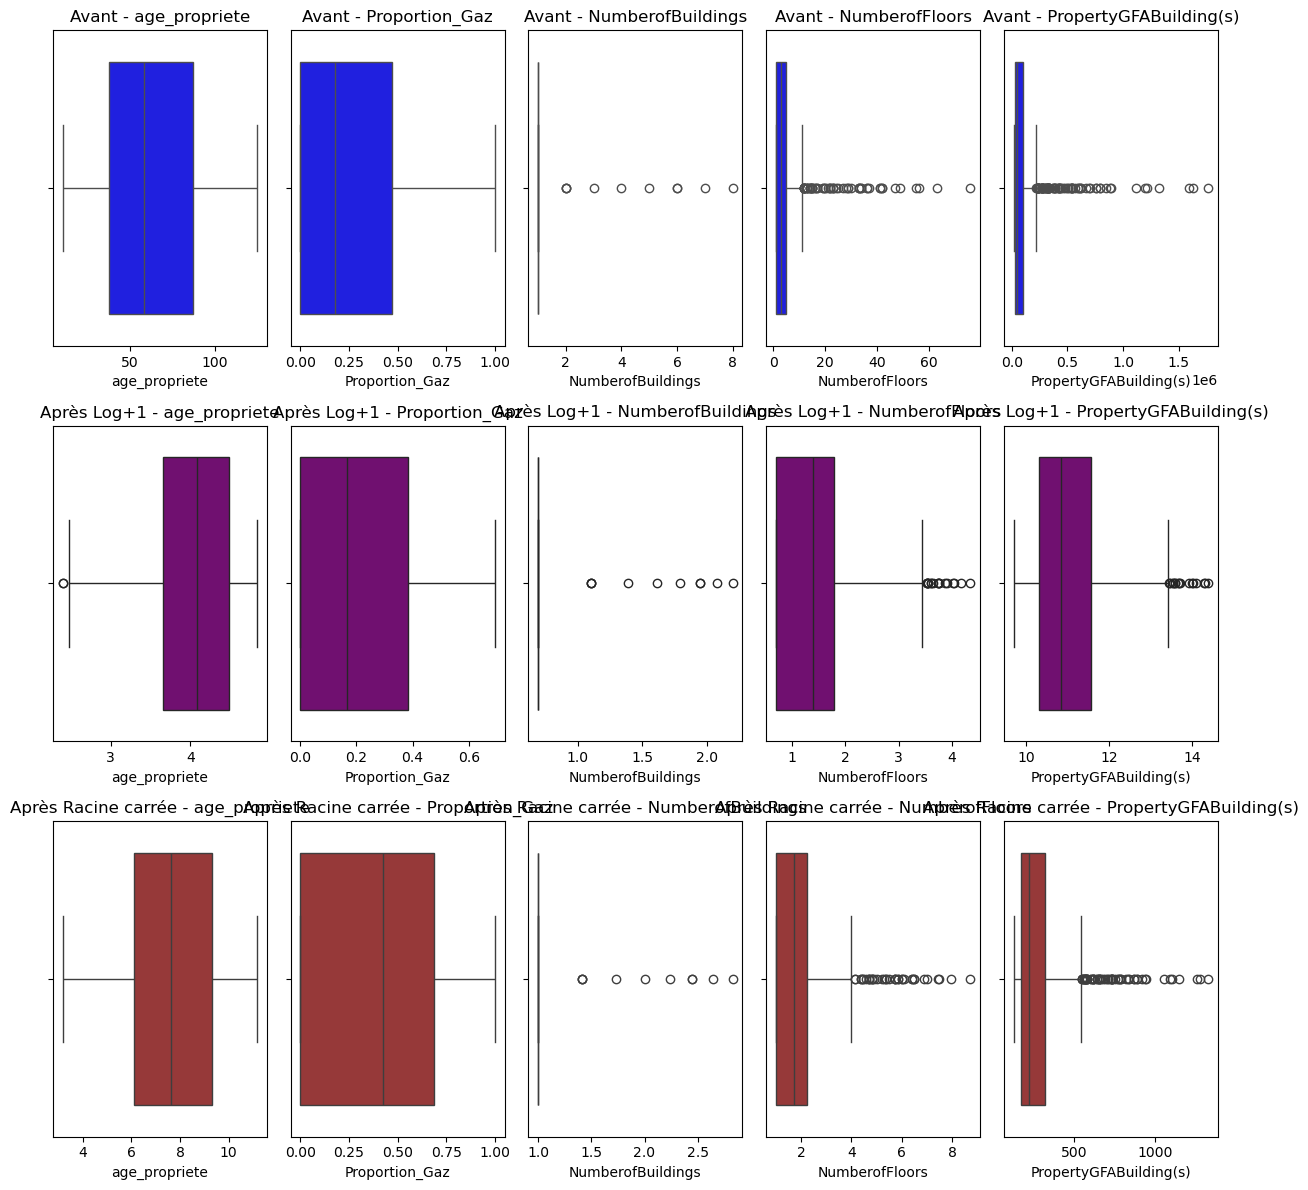

In [1077]:
# Créer les subplots pour chaque ligne (une ligne pour chaque transformation)
plt.figure(figsize=(12, 12))

# Ligne 1: Variables originales (boxplot)
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), i + 1)
    sns.boxplot(x=X_train_numeriques[col], color='blue')
    plt.title(f'Avant - {col}')

# Ligne 2: Log+1 Transformation (boxplot)
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), len(X_train_numeriques.columns) + i + 1)
    sns.boxplot(x=X_train_log[col], color='purple')
    plt.title(f'Après Log+1 - {col}')

# Ligne 3: Racine carrée Transformation (boxplot)
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), 2 * len(X_train_numeriques.columns) + i + 1)
    sns.boxplot(x=X_train_sqrt[col], color='brown')
    plt.title(f'Après Racine carrée - {col}')

plt.tight_layout()
plt.show()

**age_propriete : Racine carrée**<br>
La transformation Racine carrée semble mieux atténuer l'impact des grandes valeurs tout en préservant la structure générale de la distribution. Elle aide à réduire l'écart entre les petites et grandes valeurs, sans les compresser de manière trop marquée, comme le ferait Log+1. Cela permet de rendre la distribution plus équilibrée sans la rendre excessivement asymétrique.

**Proportion_Gaz : Pas de transformation pour l'instant**<br>
Après examen des statistiques descriptives, ni la transformation Log+1 ni la transformation racine carrée (sqrt) n'apportent d'amélioration significative à la distribution de Proportion_Gaz. La variable reste concentrée autour de zéro, et sa médiane ainsi que son écart-type ne changent pas de manière substantielle. Étant donné qu'il s'agit déjà d'une proportion (allant de 0 à 1), il est préférable de conserver cette variable dans son état original pour préserver son interprétabilité. Nous évaluerons son impact sur le modèle avant de considérer d'éventuelles transformations.

**NumberofBuildings : Log**<br>
Log+1 est parfaitement adapté ici pour réduire la variance et traiter des variables où certaines valeurs pourraient être fortement biaisées par les petits nombres. Cela rend la distribution plus proche de la normale et facilite l'interprétation de la variable.

**NumberofFloors : Log**<br>
La transformation Log+1 a réussi à atténuer les outliers, rendant la distribution plus stable et plus représentative. Cela est particulièrement utile pour les données avec des valeurs extrêmes comme celles-ci (par exemple, 76 étages), qui peuvent fausser les analyses.

**PropertyGFABuilding(s) : Log**<br>
La transformation Log+1 fonctionne bien pour cette variable, car elle aide à réduire l'impact des valeurs extrêmes (par exemple, des propriétés de plusieurs centaines de milliers de mètres carrés) et à rendre la distribution plus homogène, comme tu l'as remarqué avec les outliers sur le box plot.

In [1078]:
# Appliquer les transformations
scaler_standard = StandardScaler()
X_train_log_standard = scaler_standard.fit_transform(X_train_log)

scaler_minmax = MinMaxScaler()
X_train_log_minmax = scaler_minmax.fit_transform(X_train_log)

scaler_robust = RobustScaler()
X_train_log_robust = scaler_robust.fit_transform(X_train_log)

# Convertir les résultats des transformations en DataFrame
X_train_log_standard_df = pd.DataFrame(X_train_log_standard, columns=X_train_log.columns)
X_train_log_minmax_df = pd.DataFrame(X_train_log_minmax, columns=X_train_log.columns)
X_train_log_robust_df = pd.DataFrame(X_train_log_robust, columns=X_train_log.columns)

# Calculer les statistiques descriptives pour chaque transformation
describes_before = X_train_log.describe()
describes_standard = X_train_log_standard_df.describe()
describes_minmax = X_train_log_minmax_df.describe()
describes_robust = X_train_log_robust_df.describe()

# Afficher les résultats
print("Statistiques descriptives - Avant transformation:")
print(describes_before)
print("\nStatistiques descriptives - Après StandardScaler:")
print(describes_standard)
print("\nStatistiques descriptives - Après MinMaxScaler:")
print(describes_minmax)
print("\nStatistiques descriptives - Après RobustScaler:")
print(describes_robust)


Statistiques descriptives - Avant transformation:
       age_propriete  Proportion_Gaz  NumberofBuildings  NumberofFloors  \
count     751.000000      751.000000         751.000000      751.000000   
mean        4.002444        0.207096           0.705558        1.428487   
std         0.574124        0.203280           0.116776        0.716960   
min         2.397895        0.000000           0.693147        0.693147   
25%         3.650574        0.000000           0.693147        0.693147   
50%         4.077537        0.165514           0.693147        1.386294   
75%         4.477337        0.385262           0.693147        1.791759   
max         4.836282        0.693147           2.197225        4.343805   

       PropertyGFABuilding(s)  
count              751.000000  
mean                11.050307  
std                  0.926802  
min                  9.698982  
25%                 10.315828  
50%                 10.832912  
75%                 11.558318  
max               

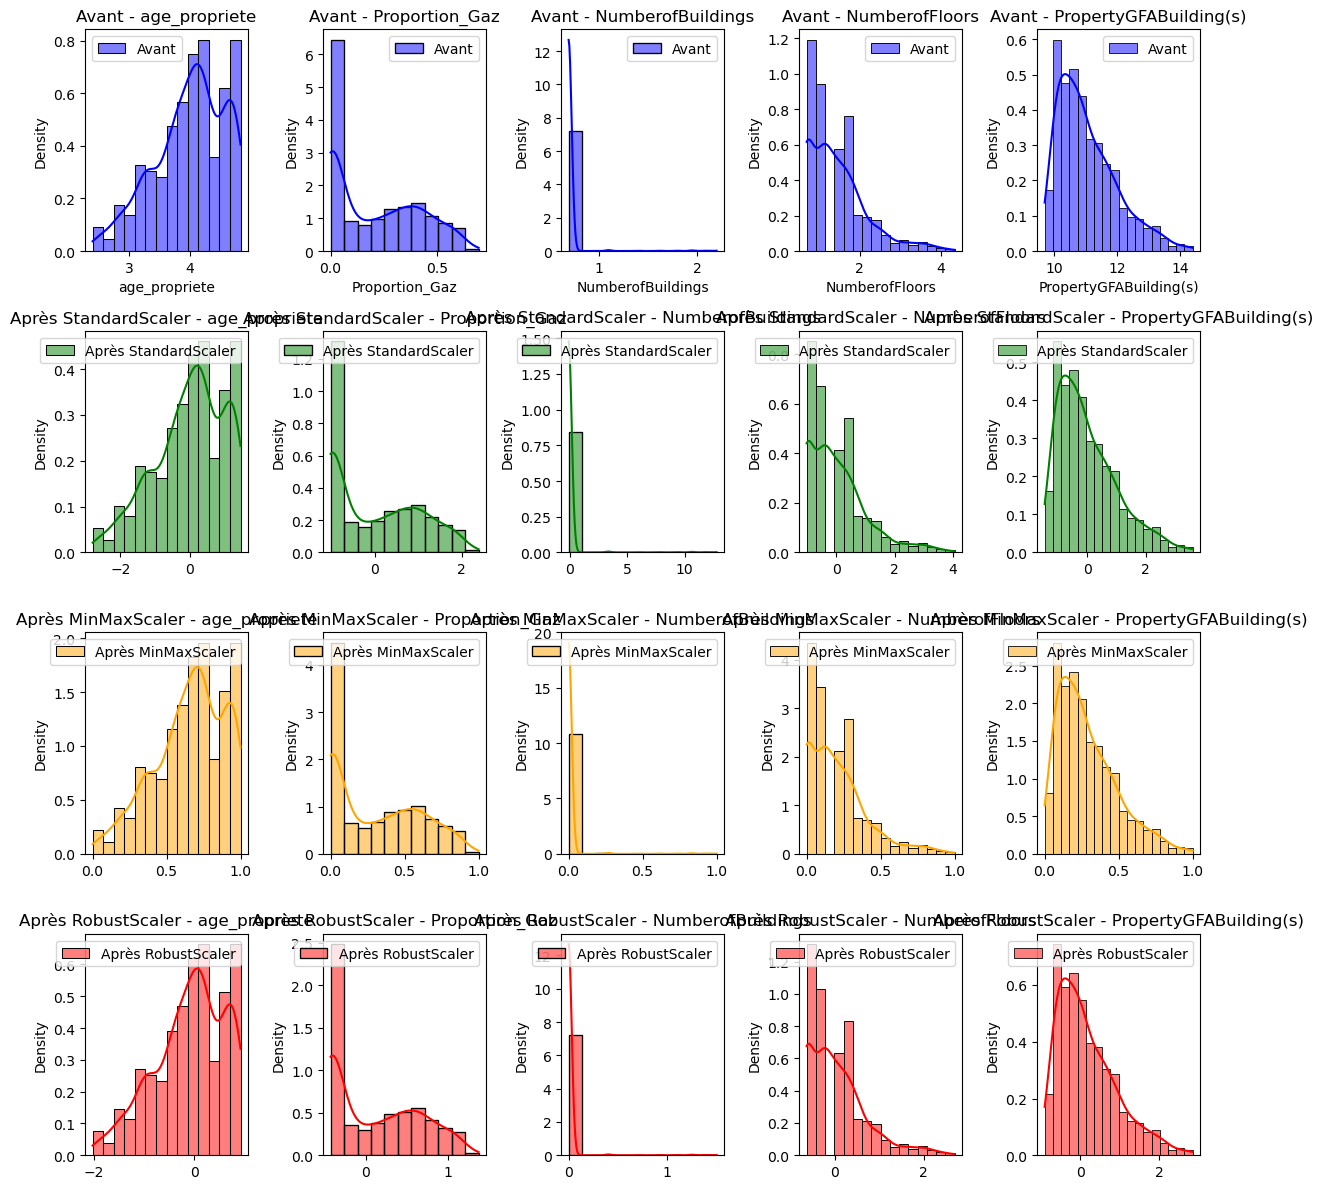

In [1079]:
# Créer les subplots pour chaque ligne (une ligne pour chaque transformation)
plt.figure(figsize=(12, 12))

# Ligne 1: Variables normales
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), i + 1)
    sns.histplot(X_train_log[col], kde=True, color='blue', label='Avant', stat="density")
    plt.legend()
    plt.title(f'Avant - {col}')

# Ligne 2: StandardScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), len(X_train_log.columns) + i + 1)
    sns.histplot(X_train_log_standard[:, i], kde=True, color='green', label='Après StandardScaler', stat="density")
    plt.legend()
    plt.title(f'Après StandardScaler - {col}')

# Ligne 3: MinMaxScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), 2 * len(X_train_log.columns) + i + 1)
    sns.histplot(X_train_log_minmax[:, i], kde=True, color='orange', label='Après MinMaxScaler', stat="density")
    plt.legend()
    plt.title(f'Après MinMaxScaler - {col}')

# Ligne 4: RobustScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), 3 * len(X_train_log.columns) + i + 1)
    sns.histplot(X_train_log_robust[:, i], kde=True, color='red', label='Après RobustScaler', stat="density")
    plt.legend()
    plt.title(f'Après RobustScaler - {col}')

plt.tight_layout()
plt.show()

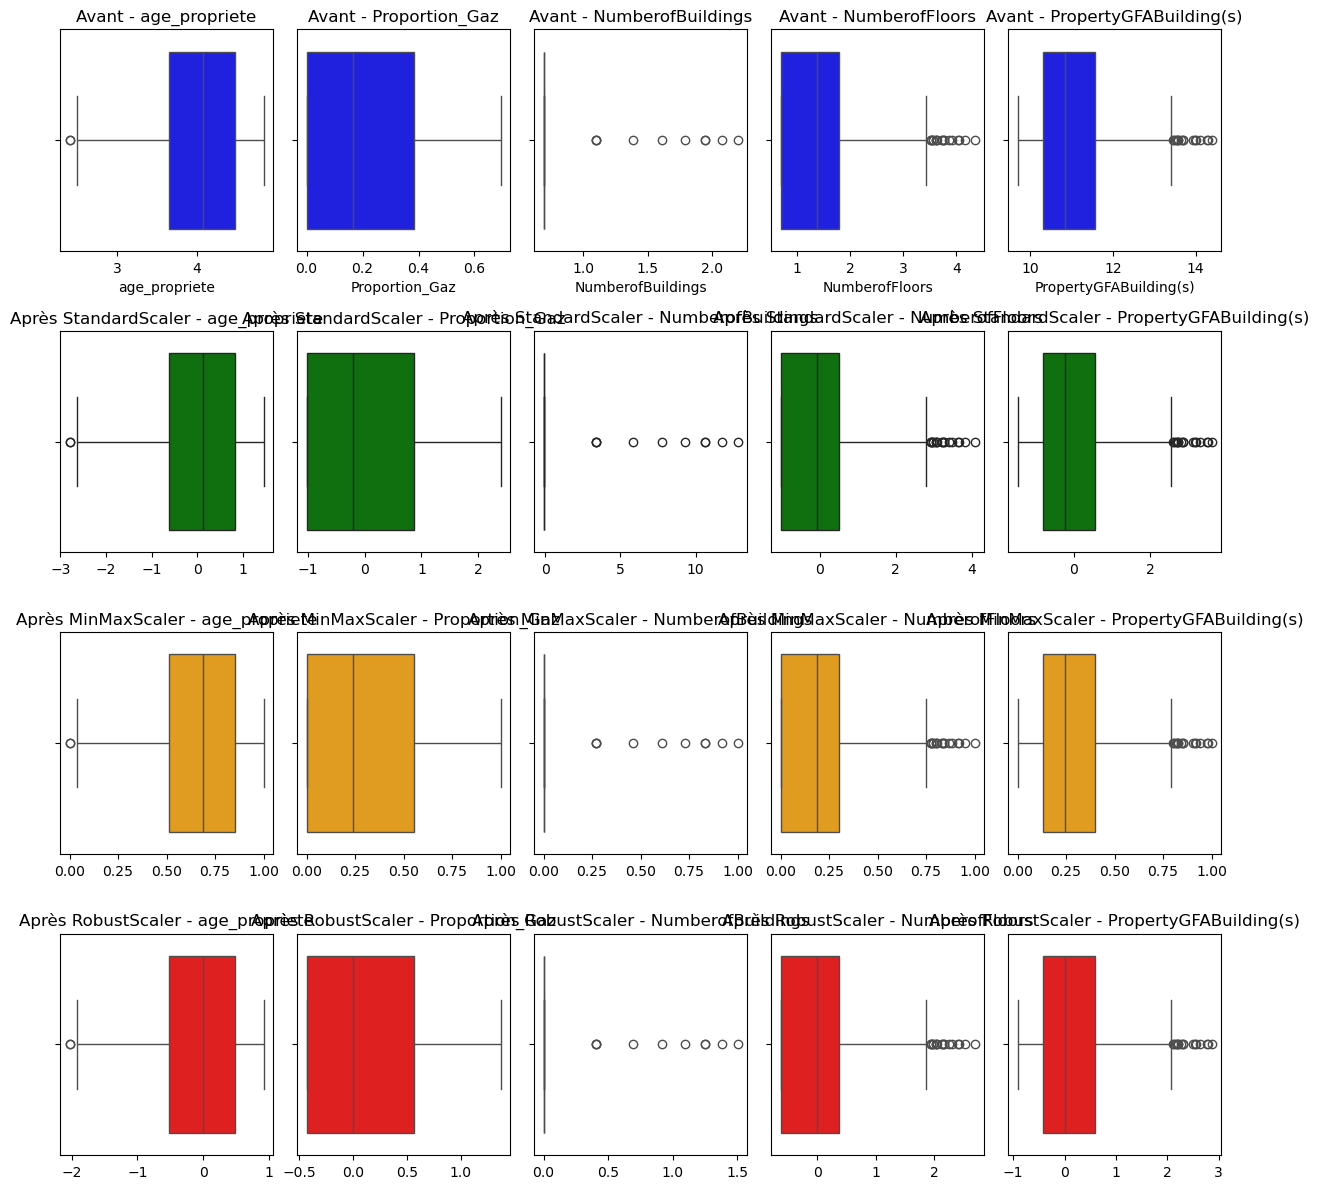

In [1080]:
# Créer les subplots pour chaque ligne (une ligne pour chaque transformation)
plt.figure(figsize=(12, 12))

# Ligne 1: Variables normales
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), i + 1)
    sns.boxplot(x=X_train_log[col], color='blue')
    plt.title(f'Avant - {col}')

# Ligne 2: StandardScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), len(X_train_log.columns) + i + 1)
    sns.boxplot(x=X_train_log_standard[:, i], color='green')
    plt.title(f'Après StandardScaler - {col}')

# Ligne 3: MinMaxScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), 2 * len(X_train_log.columns) + i + 1)
    sns.boxplot(x=X_train_log_minmax[:, i], color='orange')
    plt.title(f'Après MinMaxScaler - {col}')

# Ligne 4: RobustScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), 3 * len(X_train_log.columns) + i + 1)
    sns.boxplot(x=X_train_log_robust[:, i], color='red')
    plt.title(f'Après RobustScaler - {col}')

plt.tight_layout()
plt.show()

Dans le cadre de notre modèle de régression linéaire, nous allons appliquer différentes transformations aux variables pour optimiser leur utilisation et améliorer la performance du modèle.

**age_propriete : MinMaxScaler**<br>
Nous avons choisi d'appliquer le MinMaxScaler à la variable age_propriete, car celle-ci ne présente pas d'outliers significatifs. Cette transformation normalise les valeurs entre 0 et 1, facilitant ainsi l'interprétation des coefficients du modèle. En mettant cette variable sur une échelle uniforme, nous assurons une meilleure convergence du modèle et une interprétation plus intuitive des effets de l'âge sur la variable cible.

**Proportion_Gaz : Pas de transformation**<br>
La variable Proportion_Gaz est déjà exprimée sous forme de proportion, se situant entre 0 et 1. Par conséquent, il n'est pas nécessaire d'appliquer une transformation. En conservant cette variable dans son état original, nous préservons son interprétabilité en tant que proportion, ce qui est essentiel pour l'analyse.

**NumberofBuildings, NumberofFloors et PropertyGFABuilding(s) : RobustScaler**<br>
Pour les variables NumberofBuildings, NumberofFloors et PropertyGFABuilding(s), nous avons opté pour le RobustScaler en raison de la présence de valeurs extrêmes (outliers). Cette méthode permet de centrer les données autour de la médiane tout en réduisant l'impact des outliers grâce à l'utilisation de l'écart interquartile (IQR). En appliquant cette transformation, nous stabilisons les distributions de ces variables, ce qui contribue à améliorer la robustesse et la précision du modèle.

Conclusion<br>
Ces choix de transformation visent à optimiser les variables pour notre modèle de régression linéaire tout en garantissant leur interprétabilité. En adaptant les transformations aux caractéristiques spécifiques de chaque variable, nous cherchons à améliorer les performances du modèle et à faciliter l'analyse des résultats

## Préparation et entrainement du 2ème modèle

Le premier modèle a montré des résultats relativement faibles en termes de performance, avec un R² de 0,32, ce qui suggère une capacité limitée à expliquer la variance des émissions de CO2 (cible). De plus, l'analyse des résidus a révélé de grosses erreurs, avec des valeurs résiduelles élevées pour certaines observations, indiquant des cas où le modèle ne parvient pas à prédire de manière fiable.<br>

Pour ce second modèle, plusieurs étapes de prétraitement seront mises en place dans le but d'améliorer la performance et de réduire les erreurs résiduelles :<br>

**Gestion de la Multicolinéarité** :<br>
Une analyse de la multicolinéarité a révélé des variables fortement corrélées, notamment LargestPropertyUseTypeGFA et Proportion_Electricité, qui ont un VIF (Variance Inflation Factor) supérieur à 5. Ces variables seront retirées du modèle afin de réduire l'impact de la multicolinéarité et d'améliorer la stabilité des coefficients du modèle.

**Transformation de la Cible avec Yeo-Johnson** :<br>
Des valeurs extrêmes ont été observées dans la variable cible TotalGHGEmissions, ce qui peut influencer négativement les résultats. Afin de traiter ces valeurs extrêmes, une transformation Yeo-Johnson sera appliquée sur la cible. Cette méthode est préférée à la transformation logarithmique car elle gère mieux la distribution asymétrique. De plus, elle peut s'adapter aux valeurs positives, nulles ou proches de zéro, ce qui en fait une meilleure option que la transformation Box-Cox, qui nécessite des valeurs strictement positives.

**Transformation des Variables Numériques** :
- age_propriete: racine carrée + MinMaxScaler
- Proportion_Gaz : Pas de transformation pour l'instant
- NumberofBuildings : Log + RobustScaler
- NumberofFloors : Log + RobustScaler
- PropertyGFABuilding(s) : Log + RobustScaler

L'objectif est de créer un modèle plus robuste et précis en traitant les problèmes identifiés dans la première analyse, notamment la multicolinéarité et les valeurs extrêmes. Cette approche devrait permettre d'améliorer la performance du modèle.

In [1081]:
X_test.shape

(188, 7)

In [1082]:
X_train.shape

(751, 7)

In [1229]:
# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofFloors', 'NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', sqrt_transformer),
            ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz
    ]
)

# Transformation log sur la cible
log_transformer_y = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v2 = Pipeline([
    ('preprocessing', preprocessing_v2),  
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1257]:
pipeline_lr_v2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'NumberofBuild...
                                                  Pipeline(steps=[('sqrt',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                                       validate=True)),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['age_propriete']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1231]:
# Validation croisée
cv_results = cross_validate(pipeline_lr_v2, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 96.5427857942419
RMSE moyen sur la validation croisée: 326.8121891805537
R² moyen sur la validation croisée: 0.4729125010444939
MAPE moyen sur la validation croisée: 0.817849860295366


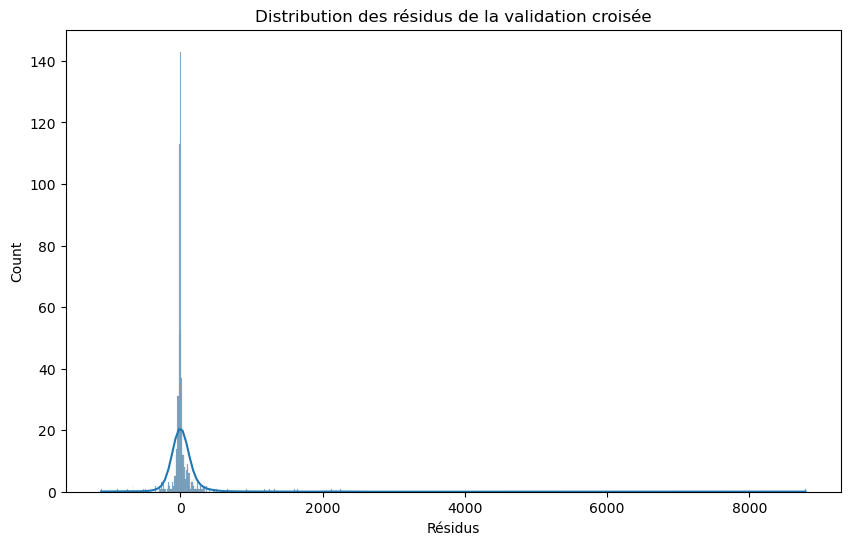

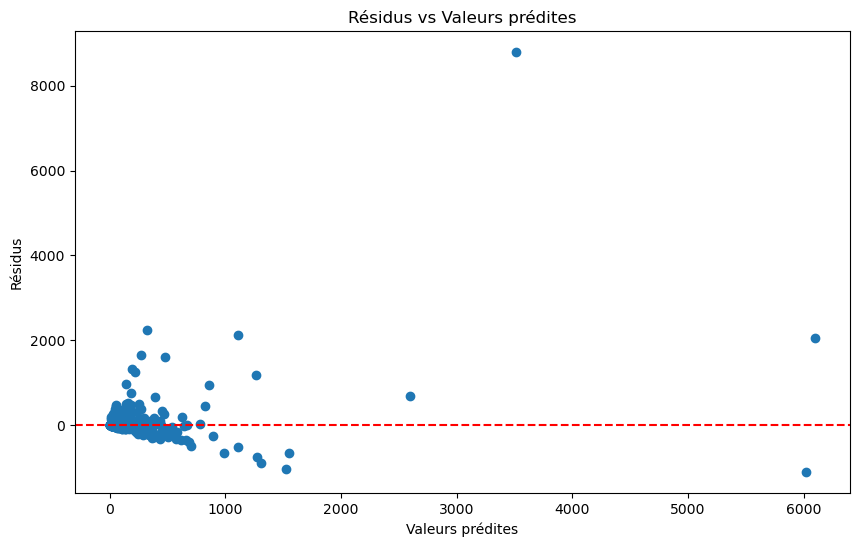

Statistiques des résidus :
Moyenne : 40.15302978817208
Écart-type : 393.400503896138
Médiane : -1.375100623301066
Les 10 plus grands résidus (en valeur absolue) :
618     8792.208729
262     2249.763930
1690    2132.577052
124     2051.195759
558     1651.599789
2       1609.405853
272     1320.423904
280     1253.244648
49      1186.040738
167     1112.668384
Name: TotalGHGEmissions, dtype: float64


In [1232]:
y_pred_cv = cross_val_predict(pipeline_lr_v2, X_train, y_train, cv=5)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus en valeur absolue
top_10_residus = residus_cv.abs().sort_values(ascending=False).head(10)

# Afficher les indices et les résidus correspondants
print("Les 10 plus grands résidus (en valeur absolue) :")
print(top_10_residus)

In [1233]:
# Indices des plus grands résidus dans le DataFrame original X
indices_residus = [618, 162, 1690, 124, 558, 2, 272, 280, 49, 167]

# Extraire les indices de X_test (qui sont dans X d'origine)
indices_X_temp = X_temp.index

# Trouver les indices dans X_test en comparant avec les indices de X
indices_residus_dans_X_temp = [idx for idx in indices_residus if idx in indices_X_temp]

# Extraire les lignes de X_test correspondant à ces indices
X_grands_residus = X_temp.loc[indices_residus_dans_X_temp]

# Afficher les lignes de X_test
(X_grands_residus).head(10)

LargestPropertyUseType CouncilDistrictCode  \
618   Installations spécialisées et services publics                   3   
1690                  Bureaux et services financiers                   3   
124   Installations spécialisées et services publics                   4   
558   Installations spécialisées et services publics                   7   
2                       Hôtellerie et lieux de culte                   7   
272                     Hôtellerie et lieux de culte                   7   
280                     Hôtellerie et lieux de culte                   7   
49                      Hôtellerie et lieux de culte                   7   
167   Installations spécialisées et services publics                   3   

      age_propriete  Proportion_Electricité  Proportion_Gaz  \
618              31                    0.48            0.06   
1690             61                    0.47            0.53   
124              72                    0.46            0.54   
558              44                    1.00            0.00   
2                56                    0.68            0.02   
272              95                    0.43            0.08   
280              52                    0.52            0.06   
49               43                    0.57            0.29   
167              35                    0.41            0.59   

      NumberofBuildings  NumberofFloors  PropertyGFABuilding(s)  \
618                   7              14                 1765970   
1690                  1               3                  591981   
124                   6              10                  879000   
558                   1              33                  429405   
2                     1              41                  759392   
272                   1              21                  305548   
280                   1              19                  272787   
49                    1              34                  847518   
167                   6               5                  597519   

      LargestPropertyUseTypeGFA  ENERGYSTARScore  TotalGHGEmissions  \
618                   1639334.0             54.0           12307.16   
1690                   520187.0             60.0            3238.24   
124                    879000.0             10.0            8145.52   
558                    218997.0             98.0            1921.82   
2                      756493.0             43.0            2089.28   
272                    310000.0             58.0            1510.85   
280                    332067.0              6.0            1468.50   
49                     994212.0             63.0            2451.58   
167                    601615.0             34.0            4906.33   

             Size_Category                               Usage_Taille_Combiné  \
618   Très grand + Immense  Installations spécialisées et services publics...   
1690  Très grand + Immense  Bureaux et services financiers Très grand + Im...   
124   Très grand + Immense  Installations spécialisées et services publics...   
558   Très grand + Immense  Installations spécialisées et services publics...   
2     Très grand + Immense  Hôtellerie et lieux de culte Très grand + Immense   
272   Très grand + Immense  Hôtellerie et lieux de culte Très grand + Immense   
280   Très grand + Immense  Hôtellerie et lieux de culte Très grand + Immense   
49    Très grand + Immense  Hôtellerie et lieux de culte Très grand + Immense   
167   Très grand + Immense  Installations spécialisées et services publics...   

                      Usage_Regroupé      Taille_Regroupée  \
618   Installations/Services publics  Très grand + Immense   
1690                Bureaux/Services  Très grand + Immense   
124   Installations/Services publics  Très grand + Immense   
558   Installations/Services publics  Très grand + Immense   
2          Hôtellerie/Lieux de culte  Très grand + Immense   
272        Hôtellerie/Lieux de culte  Très grand + Immense   
280        

# 3ème régression linéaire

In [1092]:
# Copier la colonne NumberofBuildings
X_Building = X_train[['NumberofBuildings']].copy()

# Initialiser le Binarizer avec un seuil de 1
binarizer_transformer = Binarizer(threshold=1)

# Appliquer la binarisation
X_Building['NumberofBuildings_binarized'] = binarizer_transformer.fit_transform(X_Building[['NumberofBuildings']])

# Vérifier la répartition des classes après binarisation
print(X_Building['NumberofBuildings_binarized'].value_counts().sort_index())

NumberofBuildings_binarized
0.0    741
1.0     10
Name: count, dtype: int64


In [1317]:
# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofFloors']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler
col_bin = ['NumberofBuildings']  

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
binarizer_transformer = Binarizer(threshold=1)  # Binarisation
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v3 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('bin', binarizer_transformer, col_bin),  # Binarisation sur 'NumberofBuildings'
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', sqrt_transformer),
            ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz
    ]
)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v3 = Pipeline([
    ('preprocessing', preprocessing_v3),  
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1318]:
pipeline_lr_v3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['CouncilDistrictCode']),
                                                 ('bin', Binarizer(threshold=1),
                                                  ['NumberofBuildings']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'Nu...
                                                  Pipeline(steps=[('sqrt',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                                       validate=True)),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['age_propriete']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1319]:
# Validation croisée
cv_results = cross_validate(pipeline_lr_v3, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 101.4547698930089
RMSE moyen sur la validation croisée: 358.4836862338097
R² moyen sur la validation croisée: 0.4303155186041094
MAPE moyen sur la validation croisée: 0.8280267734871977


La version transformée (Log + RobustScaler) de NumberofBuildings est globalement plus performante :

Meilleur RMSE → Moins sensible aux grandes erreurs.<br>
Meilleur R² → Plus de variance expliquée.<br>
MAPE légèrement amélioré.<br>

La binarisation simplifie trop la variable, ce qui limite l'information transmise au modèle. De plus les classes sont trop déséquilibrées.<br>

Je vais conserver la version continue avec Log + RobustScaler, cette approche permet de mieux capturer les variations et d’améliorer les performances globales du modèle.

# 4ème régression linéaire

In [1097]:
# Exemple avec ta colonne NumberofFloors
X_Floor = X_train[['NumberofFloors']].copy()

# Initialiser le discretizer avec 3 bins et la stratégie 'quantile'
kbins_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Ajuster (fit) et transformer les données
X_Floor['NumberofFloors_binned'] = kbins_discretizer.fit_transform(X_Floor[['NumberofFloors']])

# Vérifier la répartition des classes
print(X_Floor['NumberofFloors_binned'].value_counts().sort_index())

NumberofFloors_binned
0.0    204
1.0    260
2.0    287
Name: count, dtype: int64


In [1098]:
# Afficher les bornes des intervalles créés par le discretizer
print(kbins_discretizer.bin_edges_)

[array([ 1.,  2.,  4., 76.])]


In [1333]:
# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v4 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', sqrt_transformer),
            ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
        ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz
    ]
)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v4 = Pipeline([
    ('preprocessing', preprocessing_v4), 
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  
    ))
])

In [1334]:
pipeline_lr_v4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofBuildings']),
                                                 ('sqrt_mi...
                                                                   MinMaxScaler())]),
                                                  ['age_propriete']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1335]:
# Validation croisée
cv_results = cross_validate(pipeline_lr_v4, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 95.4953717255001
RMSE moyen sur la validation croisée: 322.89922928278713
R² moyen sur la validation croisée: 0.5202963706277484
MAPE moyen sur la validation croisée: 0.8261240153601065


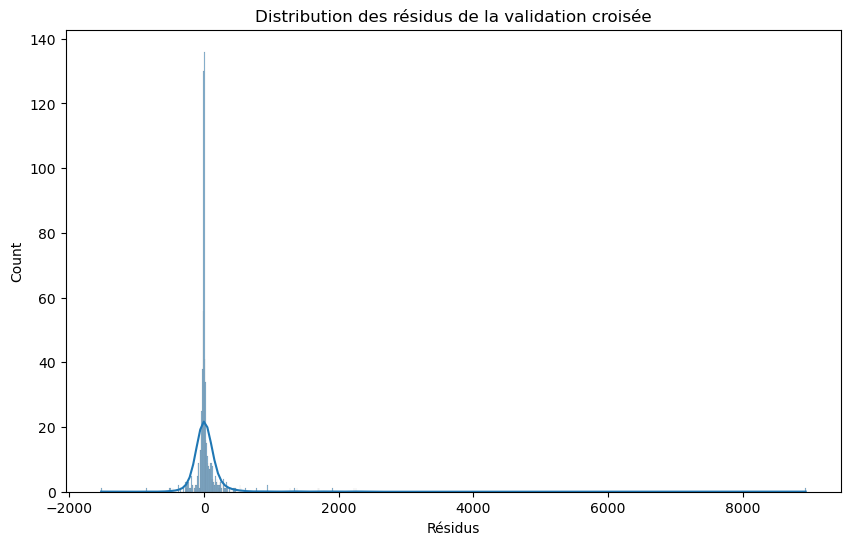

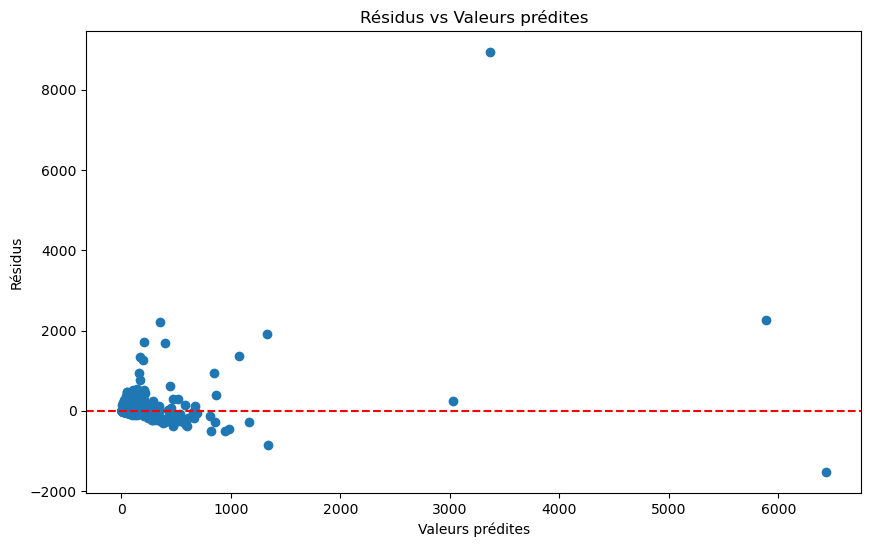

Statistiques des résidus :
Moyenne : 41.77540000766255
Écart-type : 396.77567756369154
Médiane : -1.5705679124062968
Les 10 plus grands résidus (en valeur absolue) :
618     8936.628725
124     2256.626574
262     2223.013347
1690    1910.689073
558     1713.556798
2       1689.511169
167     1530.007542
49      1377.929348
272     1339.912298
280     1272.891110
Name: TotalGHGEmissions, dtype: float64


In [1247]:
y_pred_cv = cross_val_predict(pipeline_lr_v4, X_train, y_train, cv=5)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus en valeur absolue
top_10_residus = residus_cv.abs().sort_values(ascending=False).head(10)

# Afficher les indices et les résidus correspondants
print("Les 10 plus grands résidus (en valeur absolue) :")
print(top_10_residus)

| Modèle  | R²   | MAE    | RMSE   | MAPE  |
|:--------|------|--------|--------|-------|
| lr_v2   | 0,47 | 96,54  | 326,81 | 0,82  |
| lr_v4   | 0,52 | 95,5  | 322,9  | 0,83  |

Le modèle lr_v4, avec l'ajout de la discrétisation de NumberofFloors, présente une légère amélioration des performances par rapport au modèle lr_v2 :<br>
- R² passe de 0,47 à 0,52.
- MAE et RMSE montrent une petite réduction.
- MAPE reste presque identique (0,82 pour lr_v2 contre 0,83 pour lr_v4), ce qui indique que la précision absolue est légèrement affectée par cette transformation.

Cela suggère que la discrétisation de NumberofFloors aide à améliorer certaines mesures d'erreur, mais n'a pas d'impact significatif sur le pourcentage d'erreur (MAPE).

# 5ème régression linéaire 

In [1273]:
# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_district_combined(X):
    X = X.copy()
    X['Usage_district_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['CouncilDistrictCode'].astype(str)
    return X

# Transformations personnalisées
usage_district_transformer = FunctionTransformer(create_usage_district_combined, validate=False)

# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v5 = Pipeline(steps=[
    ('combine_usage_district', usage_district_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_district_Combiné']),
            ('log_robust', Pipeline(steps=[
                ('log', log_transformer),
                ('robust', robust_transformer)
            ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
            ('sqrt_minmax', Pipeline(steps=[
                ('sqrt', sqrt_transformer),
                ('minmax', minmax_transformer)
            ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
            ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
            ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz
        ]
    ))
])

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v5 = Pipeline([
    ('preprocessing', preprocessing_v5), 
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1276]:
pipeline_lr_v5

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('combine_usage_district',
                                  FunctionTransformer(func=<function create_usage_district_combined at 0x000001BF79C23E20>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_district_Combiné']),
                                                                  ('log_robust',
                                                                   Pipeline(steps=[('l...
                                                                                    FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                                                        validate=True)),
                                                                                   ('minmax',
                                                                                    MinMaxScaler())]),
                                                                   ['age_propriete']),
                                                                  ('discretize',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3),
                                                                   ['NumberofFloors']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Gaz'])]))])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                                            validate=True)))])

In [1277]:
# Validation croisée
cv_results = cross_validate(pipeline_lr_v5, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 163.1141560261248
RMSE moyen sur la validation croisée: 530.6213935540069
R² moyen sur la validation croisée: -0.1716984420523981
MAPE moyen sur la validation croisée: 0.8710383617109061


| Modèle  | R²    | MAE     | RMSE    | MAPE   |
|:--------|-------|---------|---------|--------|
| lr_v4   | 0,52  | 95,49   | 322,9   | 0,83   |
| lr_v5   | -0,17 | 163,11  | 530,62  | 0,87   |

Le modèle lr_v5 montre une dégradation significative par rapport à lr_v4 avec un R² négatif (-0,17), un MAE (163,11) et un RMSE (530,62) beaucoup plus élevés. Cela suggère que les transformations ou regroupements appliqués dans lr_v5 n'ont pas été bénéfiques. Par conséquent, le meilleur modèle reste lr_v4, qui présente de meilleures performances globales avec un R² de 0,52, un MAE de 95,49 et un RMSE de 322,9.

# 6ème régression linéaire

In [1281]:
# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler
col_log = ['Proportion_Gaz'] # log seul

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
log1_transformer = FunctionTransformer(np.log1p, validate=True)# transformation log+1 pour proportion_gaz
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v6 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', sqrt_transformer),
            ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
        ('log1', log1_transformer, col_log)  
    ]
)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v6 = Pipeline([
    ('preprocessing', preprocessing_v6),  
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1282]:
pipeline_lr_v6

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofBuildings']),
                                                 ('sqrt_mi...
                                                                   MinMaxScaler())]),
                                                  ['age_propriete']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors']),
                                                 ('log1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                                            validate=True)))])

In [1283]:
# Validation croisée
cv_results = cross_validate(pipeline_lr_v6, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 163.11362003837112
RMSE moyen sur la validation croisée: 530.639520210567
R² moyen sur la validation croisée: -0.17179128245809702
MAPE moyen sur la validation croisée: 0.8698135950412696


| Modèle  | R²   | MAE    | RMSE   | MAPE  |
|:--------|------|--------|--------|-------|
| lr_v4   | 0,52 | 95,49  | 322,9  | 0,83  |
| lr_v6   | -0,17| 163,11 | 530,64 | 0,87  |

- R² : lr_v4 présente un R² de 0,52, ce qui indique une meilleure capacité à expliquer la variance des données, tandis que lr_v6 a un R² négatif.
- MAE et RMSE : lr_v4 a des erreurs absolues et quadratiques plus faibles, avec un MAE de 95,49 et un RMSE de 322,9, comparé à des erreurs plus élevées dans lr_v6 (MAE = 163,11, RMSE = 530,64).
- MAPE : lr_v4 affiche un MAPE plus faible (0,83), ce qui signifie qu'il est plus précis dans ses prédictions comparé à lr_v6 (MAPE = 0,87).

En conclusion, lr_v4 est clairement le modèle le plus performant par rapport à lr_v6. 

# 7ème régression linéaire

In [1344]:
# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
var_cat = ['CouncilDistrictCode']

# Prétraitement des données explicatives (X)
preprocessing_v7 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', sqrt_transformer),
            ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
        ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz
    ]
)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v7 = Pipeline([
    ('preprocessing', preprocessing_v7), 
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  
    ))
])

In [1552]:
pipeline_lr_v7

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['CouncilDistrictCode']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofBuildings']),
                                                 ('sqrt_minmax',
                                                  Pipeline(steps=[('s...
                                                                   MinMaxScaler())]),
                                                  ['age_propriete']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1551]:
# Temps d'entraînement
start_train = time.time()
pipeline_lr_v7.fit(X_train,y_train)
train_time = time.time() - start_train
print(f"Temps d'entraînement : {train_time:.2f} secondes")

Temps d'entraînement : 0.03 secondes


In [1535]:
# Validation croisée
cv_results = cross_validate(pipeline_lr_v7, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 94.6944286135446
RMSE moyen sur la validation croisée: 321.3114475724141
R² moyen sur la validation croisée: 0.5261361473003363
MAPE moyen sur la validation croisée: 0.837448184585447


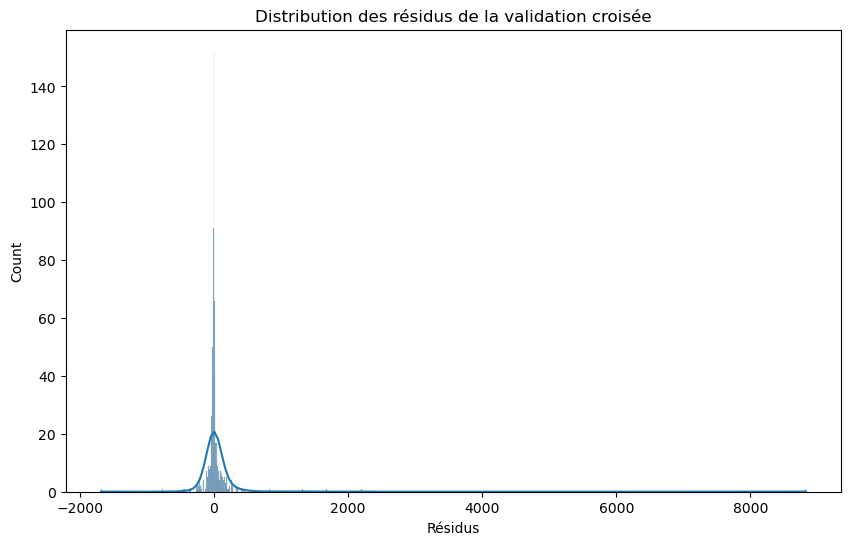

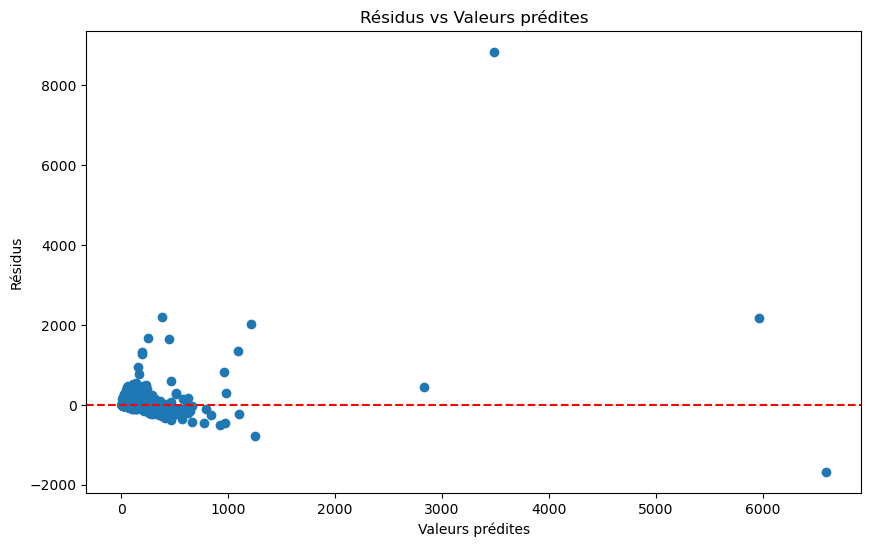

Statistiques des résidus :
Moyenne : 41.74763218306363
Écart-type : 392.6424253363529
Médiane : -1.43639366086704
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite       Résidu
618        12307.16     3481.356201  8825.803799
262         2573.75      381.042155  2192.707845
124         8145.52     5965.253849  2180.266151
1690        3238.24     1215.743936  2022.496064
558         1921.82      245.646939  1676.173061
2           2089.28      449.098269  1640.181731
49          2451.58     1094.950456  1356.629544
272         1510.85      191.723527  1319.126473
280         1468.50      198.250090  1270.249910
1754        1110.07      154.028836   956.041164


In [1531]:
y_pred_cv = cross_val_predict(pipeline_lr_v7, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

| Modèle  | R²   | MAE    | RMSE   | MAPE  |
|:--------|------|--------|--------|-------|
| v4      | 0.52 | 95.50  | 322.90 | 0.83  |
| v7      | 0.53 | 94.69  | 321.31 | 0.84  |

Pour le modèle 7, j'ai enlevé la variable 'LargestPropertyUseType'.
Le modèle v7 offre de meilleures performances que le modèle v4 avec un R² plus élevé (0.53 contre 0.52), indiquant qu'il explique mieux la variance des données. Bien que le MAPE soit légèrement plus élevé pour v7 (0.84 contre 0.83), le MAE (94.7 contre 95.5) et le RMSE (321.3 contre 322.9) sont tous deux inférieurs, ce qui signifie qu'il génère des prédictions plus précises en termes absolus.

En conclusion, v7 est préféré car il offre une meilleure capacité d'explication des données tout en restant plus précis en termes d'erreur absolue, ce qui le rend plus robuste pour les prédictions.

# 8ème régression linéaire

In [1347]:
# Exemple avec ta colonne NumberofFloors
X_taille = X_train[['PropertyGFABuilding(s)']].copy()

# Initialiser le discretizer avec 3 bins et la stratégie 'quantile'
kbins_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Ajuster (fit) et transformer les données
X_taille['PropertyGFABuilding(s)_binned'] = kbins_discretizer.fit_transform(X_taille[['PropertyGFABuilding(s)']])

# Vérifier la répartition des classes
print(X_taille['PropertyGFABuilding(s)_binned'].value_counts().sort_index())

PropertyGFABuilding(s)_binned
0.0    150
1.0    150
2.0    150
3.0    150
4.0    151
Name: count, dtype: int64


In [1348]:
# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
taille_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Colonnes à transformer
col_log_robust = ['NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Pipeline de prétraitement
preprocessing_v8 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
        ('log_robust', Pipeline(steps=[
            ('log', FunctionTransformer(np.log, validate=True)),
            ('robust', RobustScaler())
        ]), col_log_robust),  # Log + RobustScaler
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', FunctionTransformer(np.sqrt, validate=True)),
            ('minmax', MinMaxScaler())
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler
        ('passthrough', 'passthrough', ['Proportion_Gaz']),  # Pas de transformation pour Proportion_Gaz
        ('discretize_taille', taille_discretizer, ['PropertyGFABuilding(s)']), 
        ('discretize_floor', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
    ]
)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v8 = Pipeline([
    ('preprocessing', preprocessing_v8),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1349]:
pipeline_lr_v8

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['CouncilDistrictCode']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['NumberofBuildings']),
                                                 ('sqrt_minmax',
                                                  Pipeline(steps=[('sqrt',
                                                                   FunctionTransformer(...
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Gaz']),
                                                 ('discretize_taille',
                                                  KBinsDiscretizer(encode='ordinal'),
                                                  ['PropertyGFABuilding(s)']),
                                                 ('discretize_floor',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                                            validate=True)))])

In [1350]:
# Validation croisée
cv_results = cross_validate(pipeline_lr_v8, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 163.11991265538958
RMSE moyen sur la validation croisée: 530.7625738564893
R² moyen sur la validation croisée: -0.17258642058051427
MAPE moyen sur la validation croisée: 0.8699378024062729


# 9ème regression linéaire

In [1351]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X

# Transformations personnalisées
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)

# Colonnes à transformer
col_log_robust = ['NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['CouncilDistrictCode']

# Pipeline de prétraitement
preprocessing_v9 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
            ('log_robust', Pipeline(steps=[
                ('log', FunctionTransformer(np.log, validate=True)),
                ('robust', RobustScaler())
            ]), col_log_robust),  # Log + RobustScaler
            ('sqrt_minmax', Pipeline(steps=[
                ('sqrt', FunctionTransformer(np.sqrt, validate=True)),
                ('minmax', MinMaxScaler())
            ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler
            ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
            ('passthrough', 'passthrough', ['Proportion_Gaz']),  # Pas de transformation pour Proportion_Gaz
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné'])  # OneHot sur 'Usage_Taille_Combiné'
        ]
    ))
])

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v9 = Pipeline([
    ('preprocessing', preprocessing_v9),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1352]:
pipeline_lr_v9

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x000001BF79C6F100>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x000001BF79C6F2E0>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('cat',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'...
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3),
                                                                   ['NumberofFloors']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Gaz']),
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné'])]))])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                                            validate=True)))])

In [1353]:
# Validation croisée
cv_results = cross_validate(pipeline_lr_v9, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 163.1261662334736
RMSE moyen sur la validation croisée: 530.6570537742658
R² moyen sur la validation croisée: -0.17177938588605243
MAPE moyen sur la validation croisée: 0.8704363245424084


# Conclusion des modèles de régression linéaire

| Modèle  | R²   | MAE    | RMSE   | MAPE  |
|:--------|------|--------|--------|-------|
| lr_v7   | 0,52 | 94.7 | 321.31  | 0,84  |

Description des transformations du Modèle 7

- **Colonnes transformées par Logarithme + RobustScaler**<br>
PropertyGFABuilding(s) et NumberofBuildings<br>
Transformation : Application du logarithme pour atténuer l’impact des valeurs extrêmes, suivi du RobustScaler qui limite l'influence des outliers en utilisant la médiane et l'écart interquartile.<br>

- **Colonnes transformées par Racine carrée + MinMaxScaler**<br>
age_propriete<br>
Transformation : Racine carrée pour lisser les écarts + MinMaxScaler pour normaliser entre 0 et 1.<br>

- **Discrétisation**<br>
NumberofFloors<br>
Transformation : Découpage en 3 classes d'effectifs égaux avec KBinsDiscretizer (quantile).<br>

- **Encodage des variables catégorielles**<br>
District<br>
Transformation : OneHotEncoder avec suppression de la première catégorie (drop='first') pour éviter la colinéarité.<br>

- **Transformation de la cible (y)**<br>
Utilisée pour atténuer l’impact des valeurs extrêmes.

En conclusion, bien que le modèle de régression linéaire ait bénéficié de transformations adaptées, ses limites structurelles réduisent sa capacité à généraliser efficacement. Une approche plus flexible et robuste pourrait permettre d’obtenir de meilleures performances.

# Random Forest regressor : test 1 

Le Random Forest Regressor est un modèle d'apprentissage supervisé basé sur les arbres de décision. Il appartient à la famille des méthodes d'ensemble, qui combinent plusieurs modèles pour améliorer les performances prédictives.

**Principe de Fonctionnement**<br>
Construction de plusieurs arbres de décision :<br>
Le modèle génère un grand nombre d'arbres de décision (d'où le terme forêt).<br>
Chaque arbre est entraîné sur un échantillon aléatoire des données (tirage avec remplacement, appelé bootstrap).<br>

Décisions individuelles et agrégation :<br>
Pour la régression, chaque arbre prédit une valeur, et la prédiction finale est la moyenne des prédictions de tous les arbres.

Sélection aléatoire des variables :<br>
Lors de la construction de chaque arbre, un sous-ensemble aléatoire des variables explicatives est utilisé pour diviser les nœuds, ce qui limite la corrélation entre les arbres et réduit le risque de surapprentissage.

Avantages<br>
Robuste contre l'overfitting : Le fait de combiner plusieurs arbres réduit le risque de surapprentissage, contrairement à un seul arbre de décision.<br>

Gestion des données complexes : Efficace pour modéliser des relations non linéaires et des interactions entre variables.
Flexible : Gère aussi bien les variables numériques que catégorielles.<br>
Résistant aux valeurs manquantes et aux outliers.<br>

Inconvénients<br>
Moins interprétable qu'un arbre de décision simple, car il est basé sur des centaines d'arbres.<br>
Temps de calcul plus élevé, surtout quand le nombre d'arbres ou de variables est important.<br>
Besoin d'ajustement d'hyperparamètres pour équilibrer biais et variance.<br>

Principaux Hyperparamètres à Régler<br>
n_estimators : Nombre d'arbres dans la forêt. Plus il est élevé, plus le modèle est robuste (mais plus lent).<br>
max_depth : Profondeur maximale des arbres. Contrôle la complexité du modèle.<br>
min_samples_split : Nombre minimal d'échantillons pour diviser un nœud.<br>
min_samples_leaf : Nombre minimal d'échantillons dans une feuille.<br>
max_features : Nombre de variables considérées à chaque division (sqrt ou log2 par défaut).<br>

Le Random Forest Regressor est particulièrement adapté lorsque :<br>
- Les données présentent des relations non linéaires complexes.<br>
- On cherche un modèle robuste avec peu de réglages nécessaires.<br>
- On veut éviter le surapprentissage tout en gardant de bonnes performances.<br>

En résumé, le Random Forest Regressor est un modèle puissant et flexible qui excelle dans la prédiction sur des jeux de données complexes, tout en limitant le surapprentissage.

In [1130]:
X_train = X_train_copie.copy() # Pour rajouter les colonnes supprimées pour le modèle de régression

In [1131]:
X_test = X_test_copie.copy()

In [1132]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 389 to 116
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     751 non-null    category
 1   CouncilDistrictCode        751 non-null    category
 2   age_propriete              751 non-null    float64 
 3   Proportion_Electricité     751 non-null    float64 
 4   Proportion_Gaz             751 non-null    float64 
 5   NumberofBuildings          751 non-null    float64 
 6   NumberofFloors             751 non-null    int64   
 7   PropertyGFABuilding(s)     751 non-null    int64   
 8   LargestPropertyUseTypeGFA  751 non-null    float64 
dtypes: category(2), float64(5), int64(2)
memory usage: 48.7 KB


In [1133]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 2278 to 3338
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     188 non-null    category
 1   CouncilDistrictCode        188 non-null    category
 2   age_propriete              188 non-null    float64 
 3   Proportion_Electricité     188 non-null    float64 
 4   Proportion_Gaz             188 non-null    float64 
 5   NumberofBuildings          188 non-null    float64 
 6   NumberofFloors             188 non-null    int64   
 7   PropertyGFABuilding(s)     188 non-null    int64   
 8   LargestPropertyUseTypeGFA  188 non-null    float64 
dtypes: category(2), float64(5), int64(2)
memory usage: 12.4 KB


In [1358]:
# Colonnes numériques : Sélectionner toutes les colonnes de type numérique dans X_train
var_numeriques = X_train.select_dtypes(include=['number']).columns.tolist()

# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

# Prétraitement des données explicatives (X)
preprocessing_v1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('passthrough', 'passthrough', var_numeriques)
    ],
    #remainder='passthrough',
    #force_int_remainder_cols=False
)

# Création du pipeline avec le modèle
# Le pipeline applique d'abord le prétraitement, puis entraîne un modèle de régression linéaire
pipeline_rf_v1 = Pipeline([
    ('preprocessing', preprocessing_v1),  # Appliquer le prétraitement aux données
    ('model', RandomForestRegressor(random_state=42)) 
])

In [1359]:
pipeline_rf_v1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('passthrough', 'passthrough',
                                                  ['age_propriete',
                                                   'Proportion_Electricité',
                                                   'Proportion_Gaz',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [1360]:
# Validation croisée 
cv_results = cross_validate(pipeline_rf_v1, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 91.54345559293598
RMSE moyen sur la validation croisée: 342.8223771594386
R² moyen sur la validation croisée: 0.41169409297703263
MAPE moyen sur la validation croisée: 0.9740765128403226


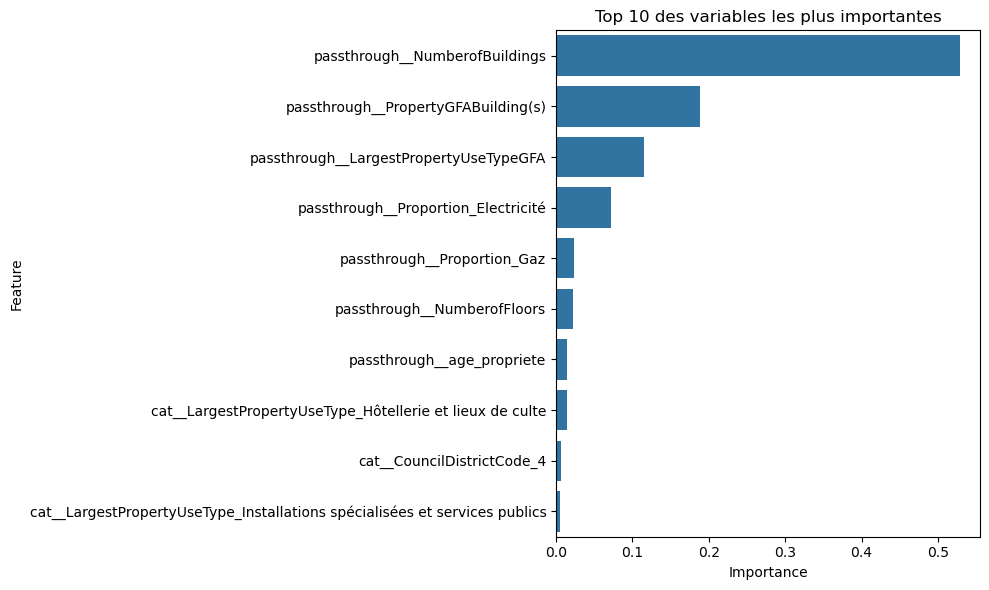

In [1361]:
# Adapter le pipeline aux données d'entraînement
pipeline_rf_v1.fit(X_train, y_train)

# Extraire le modèle Random Forest du pipeline
rf_model = pipeline_rf_v1.named_steps['model']

# Récupérer les noms des colonnes après encodage
# Cette méthode retourne toutes les colonnes après le prétraitement
feature_names = pipeline_rf_v1.named_steps['preprocessing'].get_feature_names_out()

# Récupérer les importances des variables depuis le modèle RandomForest
feature_importances = rf_model.feature_importances_

# Créer un DataFrame pour associer noms des variables et importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualisation des importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 des variables les plus importantes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Random Forest regressor : test 2

In [1414]:
col_minmax = ['age_propriete', 'PropertyGFABuilding(s)', 'NumberofBuildings', 'LargestPropertyUseTypeGFA', 'NumberofFloors']  

# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

var_sans_transfo = ['Proportion_Electricité', 'Proportion_Gaz']

minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v13 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('minmax', minmax_transformer, col_minmax),
        ('passthrough', 'passthrough', var_sans_transfo)
    ],
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_rf_v2 = Pipeline([
    ('preprocessing', preprocessing_v13),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1415]:
pipeline_rf_v2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofBuildings',
                                                   'LargestPropertyUseTypeGFA',
                                                   'NumberofFloors']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité',
                                                   'Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=RandomForestRegressor(random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1416]:
# Validation croisée 
cv_results = cross_validate(pipeline_rf_v2, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 82.85681283355389
RMSE moyen sur la validation croisée: 325.26794698095404
R² moyen sur la validation croisée: 0.6480205497150584
MAPE moyen sur la validation croisée: 0.6534356489509598


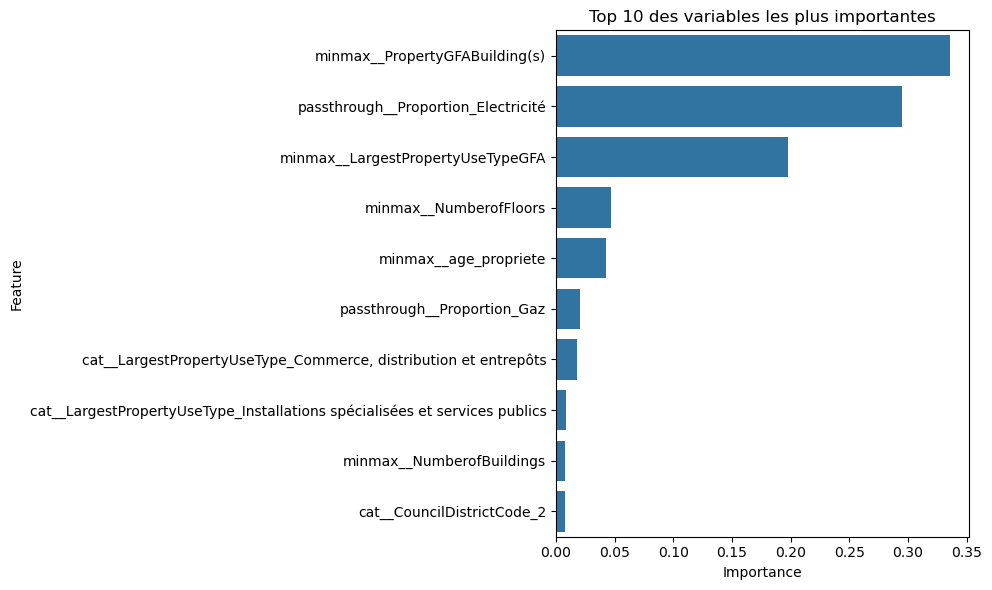

In [1417]:
# Ajuster le pipeline sur les données d'entraînement
pipeline_rf_v2.fit(X_train, y_train)

# Extraire le modèle RandomForest du pipeline
rf_model = pipeline_rf_v2.named_steps['model'].regressor_

# Récupérer les importances des variables depuis le modèle RandomForest
feature_importances = rf_model.feature_importances_

# Récupérer les noms des colonnes après encodage
feature_names = pipeline_rf_v2.named_steps['preprocessing'].get_feature_names_out()

# Créer un DataFrame pour associer noms des variables et importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualisation des importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 des variables les plus importantes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

| Modèle         | MAE    | RMSE   | R²    | MAPE   |
|----------------|--------|--------|-------|--------|
| pipeline_rf_v1 | 91.54  | 342.82 | 0.41  | 0.97   |
| pipeline_rf_v2 | 82.86  | 325.27 | 0.65  | 0.65   |

L'application de la transformation MinMax sur les variables numériques dans pipeline_rf_v2 semble avoir eu un impact positif sur les résultats du modèle, surtout en termes de réduction des erreurs (MAE et RMSE) et d'amélioration du R².

Cela montre que l'utilisation de la normalisation peut être bénéfique lorsque les variables ont des échelles différentes, ce qui permet à l'algorithme (comme Random Forest) de mieux capter les relations sous-jacentes dans les données.


Proportion_Gaz :
Son importance relative est 0.020439, ce qui est faible par rapport aux autres variables clés comme PropertyGFABuilding(s) (0.335367) ou Proportion_Electricité (0.294651).
Étant donné qu’elle contribue très peu à la performance globale du modèle, son retrait pourrait simplifier le modèle sans perte significative d’information.

LargestPropertyUseTypeGFA :
Bien que son importance soit plus élevée (0.197700), elle reste inférieure à d’autres variables principales comme PropertyGFABuilding(s) et Proportion_Electricité.
L'inclusion de cette variable pourrait introduire un certain bruit, surtout si elle est corrélée avec d'autres variables explicatives. La décision de l'exclure permet de tester si un modèle simplifié peut offrir des performances similaires.

# Random Forest regressor : test 3

In [1422]:
col_minmax = ['age_propriete', 'PropertyGFABuilding(s)', 'NumberofFloors', 'NumberofBuildings']  
#, 'LargestPropertyUseTypeGFA'
# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

var_sans_transfo = ['Proportion_Electricité']#, 'Proportion_Gaz']

minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v10 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('minmax', minmax_transformer, col_minmax),
        ('passthrough', 'passthrough', var_sans_transfo)
    ],
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_rf_v3 = Pipeline([
    ('preprocessing', preprocessing_v10),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1423]:
pipeline_rf_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'NumberofBuildings']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=RandomForestRegressor(random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1424]:
# Validation croisée 
cv_results = cross_validate(pipeline_rf_v3, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 81.67025145636885
RMSE moyen sur la validation croisée: 310.2754750147372
R² moyen sur la validation croisée: 0.6756654188749598
MAPE moyen sur la validation croisée: 0.6672455285238061


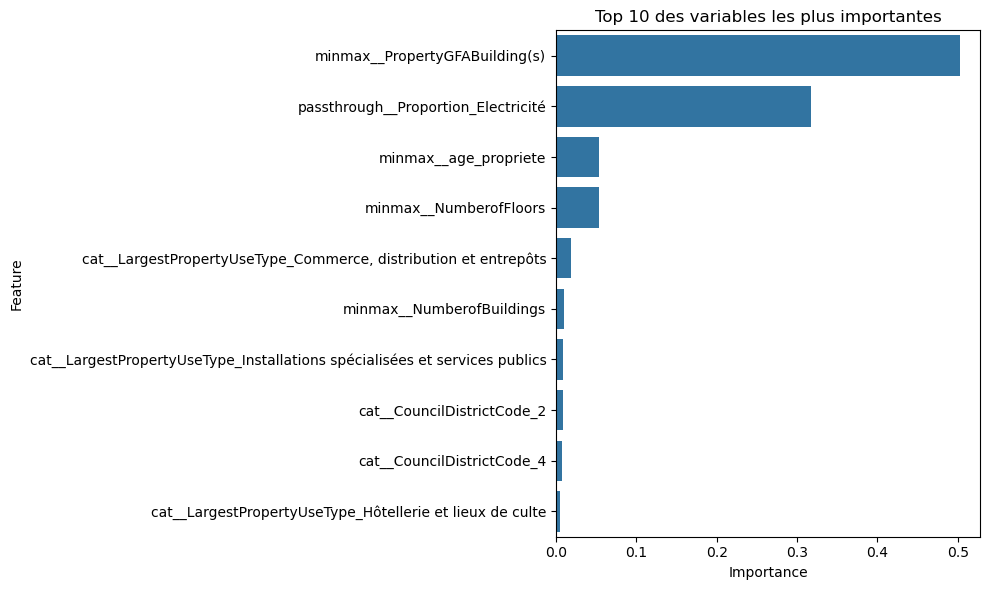

In [1412]:
# Ajuster le pipeline sur les données d'entraînement
pipeline_rf_v3.fit(X_train, y_train)

# Extraire le modèle RandomForest du pipeline
rf_model = pipeline_rf_v3.named_steps['model'].regressor_

# Récupérer les importances des variables depuis le modèle RandomForest
feature_importances = rf_model.feature_importances_

# Récupérer les noms des colonnes après encodage
feature_names = pipeline_rf_v3.named_steps['preprocessing'].get_feature_names_out()

# Créer un DataFrame pour associer noms des variables et importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualisation des importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 des variables les plus importantes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

| Métrique                  | Avant retrait (pipeline_rf_v2) | Après retrait (pipeline_rf_v3) | Évolution         |
|:--------------------------|--------------------------------|--------------------------------|-------------------|
| **MAE moyen**            | 82.8568                       | 81.6703                       | ↓ -1.43%         |
| **RMSE moyen**           | 325.2679                      | 310.2755                      | ↓ -4.61%         |
| **R² moyen**             | 0.6480                        | 0.6757                        | ↑ +4.29%         |
| **MAPE moyen**           | 0.6534                        | 0.6672                        | ↑ +2.11%         |


La baisse du MAE et du RMSE indique une réduction des erreurs, tandis que l'augmentation du R² montre que le modèle explique mieux la variance des données.
Bien que le MAPE ait légèrement augmenté, cette variation reste négligeable.

En retirant deux variables de moindre importance, le modèle devient plus simple, tout en améliorant ses performances. Cela suggère que ces variables introduisaient potentiellement du bruit ou de la redondance dans le modèle.
Validation de la décision :

Ces résultats confirment que le retrait de Proportion_Gaz et LargestPropertyUseTypeGFA était judicieux pour équilibrer complexité et performance.
Le modèle épuré (pipeline_rf_v3) est donc préférable pour une meilleure généralisation et des performances optimisées.

# Random Forest regressor : test 4

In [1645]:
col_minmax = ['age_propriete', 'PropertyGFABuilding(s)', 'NumberofBuildings']  
#, 'LargestPropertyUseTypeGFA' 'NumberofFloors',
# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

var_sans_transfo = ['Proportion_Electricité']#, 'Proportion_Gaz']

minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v18 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('minmax', minmax_transformer, col_minmax),
        ('discretize', floor_discretizer, ['NumberofFloors']),
        ('passthrough', 'passthrough', var_sans_transfo)
    ],
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_rf_v4 = Pipeline([
    ('preprocessing', preprocessing_v18),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1646]:
pipeline_rf_v4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofBuildings']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=RandomForestRegressor(random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1647]:
# Temps d'entraînement
start_train = time.time()
pipeline_rf_v4.fit(X_train,y_train)
train_time = time.time() - start_train
print(f"Temps d'entraînement : {train_time:.2f} secondes")

Temps d'entraînement : 0.75 secondes


In [1648]:
# Validation croisée 
cv_results = cross_validate(pipeline_rf_v4, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 80.8324475194639
RMSE moyen sur la validation croisée: 298.05856617523284
R² moyen sur la validation croisée: 0.7010586570706354
MAPE moyen sur la validation croisée: 0.6790844064511993


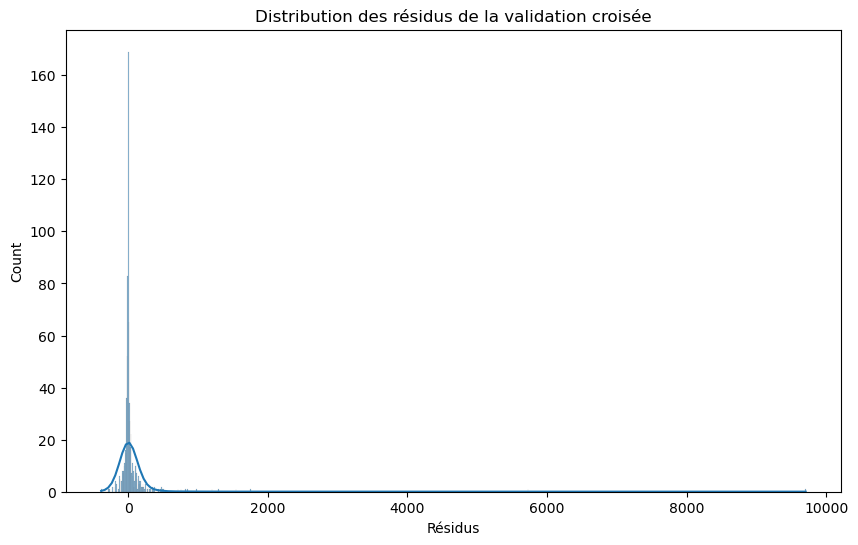

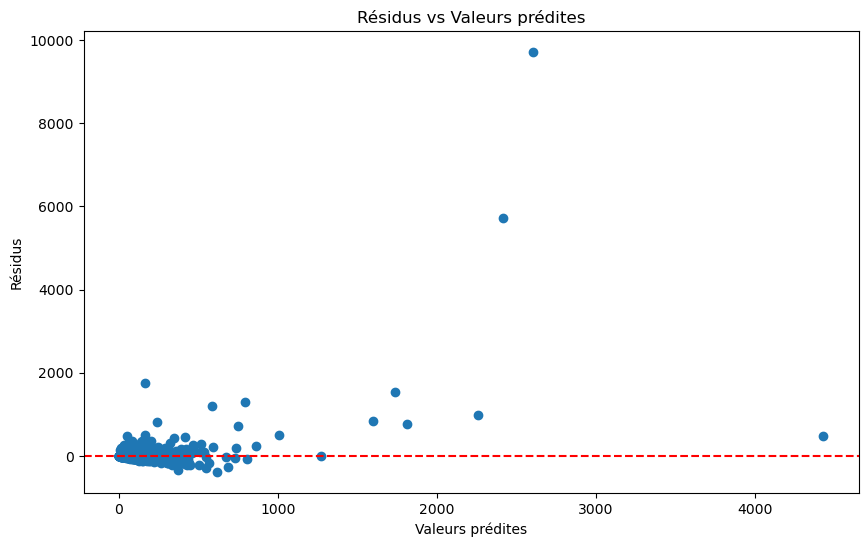

Statistiques des résidus :
Moyenne : 47.521939258808146
Écart-type : 437.0622619807934
Médiane : -0.05224474573822846
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite       Résidu
618        12307.16     2600.566846  9706.593154
124         8145.52     2417.622319  5727.897681
558         1921.82      166.735104  1755.084896
1672        3278.11     1738.190800  1539.919200
2           2089.28      795.158553  1294.121447
3187        1789.69      585.113539  1204.576461
1690        3238.24     2260.128279   978.111721
49          2451.58     1597.907813   853.672187
194         1060.13      240.055757   820.074243
262         2573.75     1811.705914   762.044086


In [1649]:
y_pred_cv = cross_val_predict(pipeline_rf_v4, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

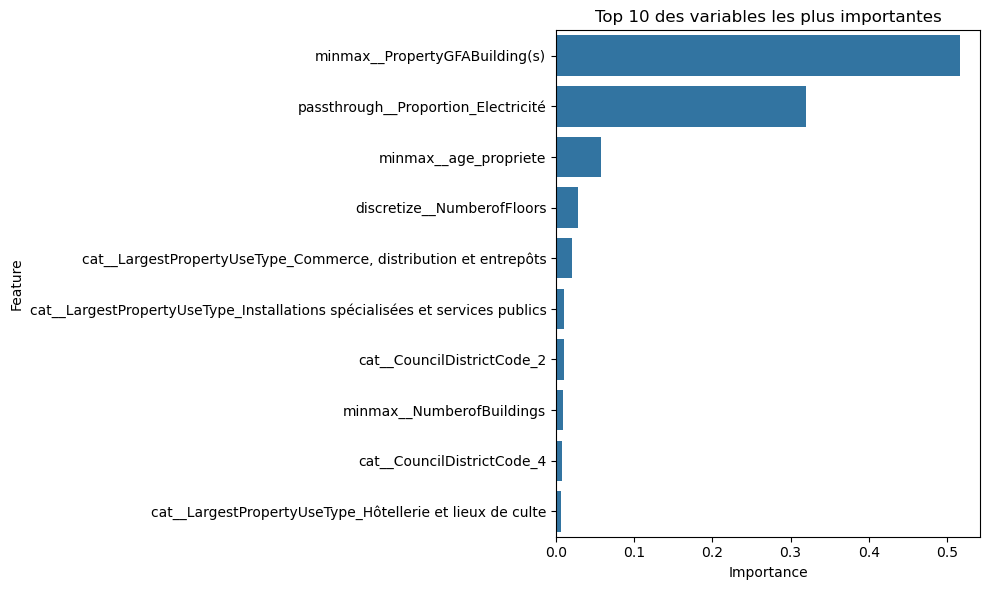

In [1650]:
# Ajuster le pipeline sur les données d'entraînement
pipeline_rf_v4.fit(X_train, y_train)

# Extraire le modèle RandomForest du pipeline
rf_model = pipeline_rf_v4.named_steps['model'].regressor_

# Récupérer les importances des variables depuis le modèle RandomForest
feature_importances = rf_model.feature_importances_

# Récupérer les noms des colonnes après encodage
feature_names = pipeline_rf_v4.named_steps['preprocessing'].get_feature_names_out()

# Créer un DataFrame pour associer noms des variables et importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualisation des importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 des variables les plus importantes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

| Métrique                  | Pipeline_rf_v2 (base) | Pipeline_rf_v3 (sans 2 variables) | Modèle 4 (discrétisation) | Évolution par rapport à v2 |
|---------------------------|-----------------------|-----------------------------------|---------------------------|----------------------------|
| **MAE moyen**            | 82.8568              | 81.6703                          | 80.8324                  | ↓ -2.44%                  |
| **RMSE moyen**           | 325.2679             | 310.2755                         | 298.0586                 | ↓ -8.36%                  |
| **R² moyen**             | 0.6480               | 0.6757                           | 0.7011                   | ↑ +8.19%                  |
| **MAPE moyen**           | 0.6534               | 0.6672                           | 0.6791                   | ↑ +3.93%                  |

Le modèle 4, intégrant la discrétisation du nombre d'étages, présente une amélioration notable sur les métriques MAE, RMSE et R2, bien qu'une légère augmentation du MAPE soit observée. Il semble être le meilleur modèle jusqu'à présent.

# Random Forest regressor : test 5

In [1446]:
# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_district_combined(X):
    X = X.copy()
    X['Usage_district_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['CouncilDistrictCode'].astype(str)
    return X

# Transformations personnalisées
usage_district_transformer = FunctionTransformer(create_usage_district_combined, validate=False)


col_minmax = ['age_propriete', 'PropertyGFABuilding(s)', 'NumberofBuildings']  


var_sans_transfo = ['Proportion_Electricité']

minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v19 = Pipeline(steps=[
    ('combine_usage_district', usage_district_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('minmax', minmax_transformer, col_minmax),
            ('discretize', floor_discretizer, ['NumberofFloors']),
            ('passthrough', 'passthrough', var_sans_transfo)
        ]
    ))  # Fin de ColumnTransformer
])  # Fin de Pipeline


# Pipeline avec Random Forest et transformation de la cible
pipeline_rf_v5 = Pipeline([
    ('preprocessing', preprocessing_v19),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1447]:
pipeline_rf_v5

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('combine_usage_district',
                                  FunctionTransformer(func=<function create_usage_district_combined at 0x000001BF6DF1D580>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('minmax',
                                                                   MinMaxScaler(),
                                                                   ['age_propriete',
                                                                    'PropertyGFABuilding(s)',
                                                                    'NumberofBuildings']),
                                                                  ('discretize',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3),
                                                                   ['NumberofFloors']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Electricité'])]))])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=RandomForestRegressor(random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1448]:
# Validation croisée 
cv_results = cross_validate(pipeline_rf_v5, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 84.956873215262
RMSE moyen sur la validation croisée: 314.18103602789745
R² moyen sur la validation croisée: 0.6628933872462885
MAPE moyen sur la validation croisée: 0.7433738588583086


| **Modèle**                           | **MAE moyen** | **RMSE moyen** | **R² moyen** | **MAPE moyen** |
|--------------------------------------|---------------|----------------|--------------|----------------|
| Modèle 4 (discrétisation des étages) | 80.83         | 298.06         | 0.7011       | 0.6791         |
| Modèle 5 (transformations complètes) | 84.96         | 314.18         | 0.6629       | 0.7434         |

MAE et RMSE : Les erreurs absolues et quadratiques moyennes sont légèrement supérieures par rapport au modèle précédent (modèle 4).
R² moyen : Une baisse dans la capacité explicative du modèle est observée (R² = 0.6629).<br>
MAPE : L'erreur moyenne absolue en pourcentage est plus élevée, ce qui indique que les transformations pourraient avoir impacté négativement certaines prédictions.<br>
Ces résultats montrent que la nouvelle transformation combinée n'a pas amélioré les performances globales par rapport aux itérations précédentes.


Après avoir exploré et optimisé nos modèles basés sur des Random Forests, notamment avec des transformations et des stratégies comme la discrétisation des variables, nous avons obtenu des performances intéressantes, particulièrement avec le modèle 4. Cependant, ces résultats montrent également des limites dans la capacité du modèle à capturer certains aspects complexes des données.

Pour aller plus loin, nous allons maintenant explorer l'utilisation de XGBoost, un algorithme de boosting particulièrement performant pour les problèmes de régression et de classification. XGBoost est réputé pour sa capacité à gérer des relations non linéaires, sa robustesse face au sur-apprentissage et son efficacité sur des jeux de données avec des variables hétérogènes.

L'objectif sera de comparer ses performances aux modèles Random Forests afin de déterminer si XGBoost peut offrir une amélioration significative

# XGBoost (Extreme Gradient Boosting) : test 1

XGBoost (Extreme Gradient Boosting) est une bibliothèque open-source de machine learning largement utilisée pour les tâches de régression et de classification. Elle fait partie des modèles de boosting, une technique d'ensemble learning qui combine plusieurs modèles de base, généralement des arbres de décision, pour améliorer les performances prédictives.

Boosting : Contrairement aux méthodes comme le bagging (par exemple, Random Forest), qui créent plusieurs modèles indépendants, le boosting construit des modèles de manière séquentielle. Chaque modèle est ajusté pour corriger les erreurs du précédent. XGBoost suit cette approche en utilisant des arbres de décision comme modèles de base, ce qui lui permet d'améliorer la précision globale de la prédiction.

Efficacité : XGBoost est conçu pour être rapide et efficace, en particulier lorsqu'il est utilisé avec de grands ensembles de données. Il optimise les calculs pour réduire le temps d'exécution tout en maximisant la précision des prédictions.

Contrôle de la complexité du modèle : XGBoost offre de nombreux hyperparamètres permettant de réguler la complexité du modèle, comme la profondeur maximale des arbres ou le taux d'apprentissage. Ces réglages permettent d'éviter le surapprentissage (overfitting) tout en augmentant la capacité du modèle à généraliser.

Gestion des données manquantes : XGBoost gère de manière efficace les données manquantes en imputant automatiquement des valeurs manquantes lors de l'entraînement, ce qui simplifie le pré-traitement des données.

Polyvalence : XGBoost peut traiter des données numériques et catégorielles, et il est compatible avec des données de grande dimension, ce qui le rend adaptable à diverses applications en machine learning.

En résumé, XGBoost est un modèle de boosting puissant, efficace et flexible, qui excelle dans les prédictions complexes tout en offrant un large éventail de réglages pour optimiser les performances.

In [1449]:
# Le pipeline avec XGBoost
pipeline_xgb_v1 = Pipeline([
    ('preprocessing', preprocessing_v1),  
    ('model', xgb.XGBRegressor(random_state=42))  # XGBoost pour régression
])

In [1450]:
pipeline_xgb_v1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('passthrough', 'passthrough',
                                                  ['age_propriete',
                                                   'Proportion_Electricité',
                                                   'Proportion_Gaz',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [1451]:
# Validation croisée 
cv_results = cross_validate(pipeline_xgb_v1, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 102.6511559648078
RMSE moyen sur la validation croisée: 413.49800955087176
R² moyen sur la validation croisée: -0.03667418144708878
MAPE moyen sur la validation croisée: 1.2875837469839022


# XGBoost (Extreme Gradient Boosting) : test 2

In [1459]:
# Pipeline avec Random Forest et transformation de la cible
pipeline_xgb_v2 = Pipeline([
    ('preprocessing', preprocessing_v1),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1460]:
pipeline_xgb_v2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('passthrough', 'passthrough',
                                                  ['age_propriete',
                                                   'Proportion_Electricité',
                                                   'Proportion_Gaz',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1461]:
# Validation croisée 
cv_results = cross_validate(pipeline_xgb_v2, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 87.822770547372
RMSE moyen sur la validation croisée: 328.3105440480387
R² moyen sur la validation croisée: 0.6530367013095482
MAPE moyen sur la validation croisée: 0.7573268908743096


| **Modèle**          | **MAE**  | **RMSE** | **R²**  | **MAPE** |
|----------------------|----------|----------|---------|----------|
| Modèle 1 (aucune transformation) | 102.65    | 413.5   | -0.04    | 1.29     |
| Modèle 2 (Log sur la cible)      | 87.82    | 328.31   | 0.65   | 0.76     | 


**Analyse des performances du modèle avec transformation logarithmique**<br>
Améliorations significatives :<br>
L'application de la transformation logarithmique sur la cible a conduit à une nette amélioration des performances du modèle :

Réduction des erreurs : Le RMSE a diminué de manière significative, et le R² a augmenté.<br>
Erreurs relatives maîtrisées : Le MAPE est presque divisé par deux, montrant une meilleure précision dans les prédictions relatives à la valeur réelle.<br>

# XGBoost (Extreme Gradient Boosting) : test 3

In [2025]:
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

var_sans_transfo = ['Proportion_Electricité', 'age_propriete', 'PropertyGFABuilding(s)', 'NumberofFloors', 'NumberofBuildings']#, 'Proportion_Gaz']

# Prétraitement des données explicatives (X)
preprocessing_v20 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('passthrough', 'passthrough', var_sans_transfo)
    ],
)
# Pipeline avec XGBoost et transformation logarithmique de la cible
pipeline_xgb_v3 = Pipeline([
    ('preprocessing', preprocessing_v20),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True  # Vérifie que l'inverse est cohérent
    ))
])

In [2026]:
pipeline_xgb_v3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité',
                                                   'age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'NumberofBuildings'])])),
                ('model',
                 TransformedTargetRegressor(re...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [2027]:
# Temps d'entraînement
start_train = time.time()
pipeline_xgb_v3.fit(X_train,y_train)
train_time = time.time() - start_train
print(f"Temps d'entraînement : {train_time:.2f} secondes")

Temps d'entraînement : 0.18 secondes


In [2028]:
# Validation croisée 
cv_results = cross_validate(pipeline_xgb_v3, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 81.32444952335752
RMSE moyen sur la validation croisée: 294.85978844945805
R² moyen sur la validation croisée: 0.7106618870000663
MAPE moyen sur la validation croisée: 0.7317969390209347


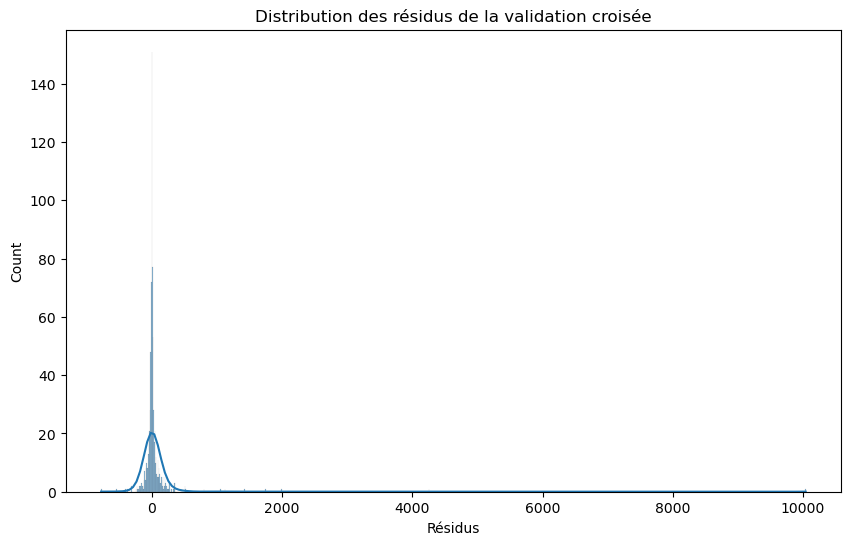

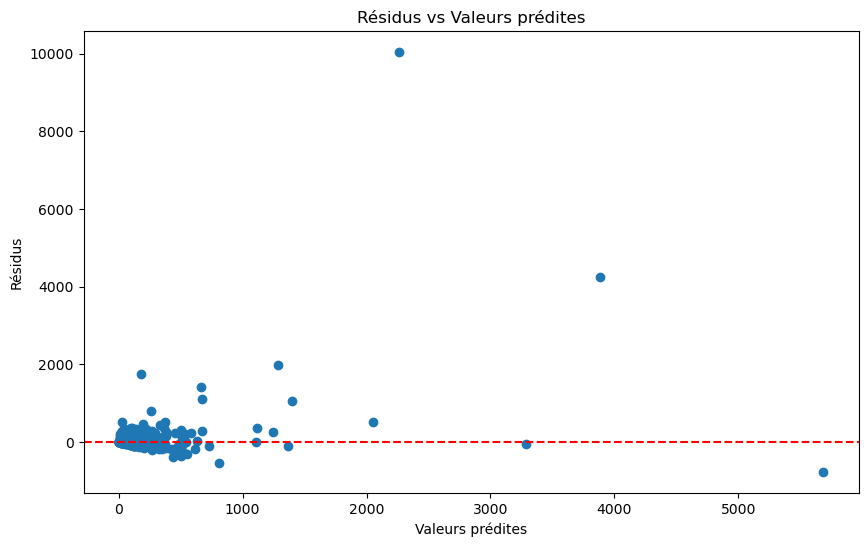

Statistiques des résidus :
Moyenne : 39.89771217045232
Écart-type : 427.3268395841739
Médiane : 0.28628761291503935
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
618        12307.16     2265.224609  10041.935391
124         8145.52     3885.941895   4259.578105
1672        3278.11     1287.376343   1990.733657
558         1921.82      183.320709   1738.499291
2           2089.28      665.991394   1423.288606
3187        1789.69      671.890991   1117.799009
49          2451.58     1398.150269   1053.429731
194         1060.13      258.519836    801.610164
262         2573.75     2053.047119    520.702881
559          882.56      375.280579    507.279421


In [1655]:
y_pred_cv = cross_val_predict(pipeline_xgb_v3, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

| **Modèle**                                | **MAE**    | **RMSE**   | **R²**    | **MAPE**   |
|:------------------------------------------|------------|------------|-----------|------------|
| Modèle 1 (aucune transformation)          | 102.65     | 413.50     | -0.04     | 1.29       |
| Modèle 2 (Log sur la cible)               | 87.82      | 328.31     | 0.65      | 0.76       |
| Modèle 3 (sans proportion gaz et GFA)     | 81.32      | 294.86     | 0.71      | 0.73       |

Ce nouveau Modèle 3, qui exclut les variables Proportion Gaz et LargestPropertyUseTypeGFA, améliore les performances en réduisant le MAE, RMSE, et en augmentant le R² par rapport au Modèle 2. Ces résultats confirment que l'élimination de certaines variables peut réduire la complexité sans compromettre la précision.

# XGBoost (Extreme Gradient Boosting) : test 4

In [1471]:
# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

var_sans_transfo = ['Proportion_Electricité', 'age_propriete', 'PropertyGFABuilding(s)', 'NumberofBuildings']

minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v11 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
        ('passthrough', 'passthrough', var_sans_transfo)
    ],
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_xgb_v4 = Pipeline([
    ('preprocessing', preprocessing_v11),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1472]:
pipeline_xgb_v4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité',
                                                   'age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'N...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1473]:
# Validation croisée 
cv_results = cross_validate(pipeline_xgb_v4, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 86.75597773150248
RMSE moyen sur la validation croisée: 315.80836800230173
R² moyen sur la validation croisée: 0.6713917496796906
MAPE moyen sur la validation croisée: 0.7841898508840794


| **Modèle**                                | **MAE**    | **RMSE**   | **R²**    | **MAPE**   |
|:------------------------------------------|------------|------------|-----------|------------|
| Modèle 1 (aucune transformation)          | 102.65     | 413.50     | -0.04     | 1.29       |
| Modèle 2 (Log sur la cible)               | 87.82      | 328.31     | 0.65      | 0.76       |
| Modèle 3 (sans proportion gaz et GFA)     | 81.32      | 294.86     | 0.71      | 0.73       |
| Modèle 4 (discrétisation de 'NumberofFloors') | 86.76    | 315.81     | 0.67      | 0.78       |

La discrétisation de la variable NumberofFloors dans le Modèle 4 n'a pas amélioré les performances du modèle. En effet, par rapport au Modèle 3 (qui ne comporte pas cette transformation), le modèle 4 présente des résultats légèrement moins bons.
La discrétisation a légèrement augmenté le MAE et le RMSE, tout en réduisant légèrement le R² et augmentant le MAPE. Cela suggère que la transformation n'a pas apporté de bénéfices notables et pourrait avoir ajouté de la complexité sans améliorer la précision du modèle.

# XGBoost (Extreme Gradient Boosting) : test 5

In [1474]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X

# Transformations personnalisées
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)

var_sans_transfo = ['Proportion_Electricité', 'age_propriete', 'PropertyGFABuilding(s)', 'NumberofBuildings', 'NumberofFloors']

# Colonnes catégorielles à encoder
var_cat = ['CouncilDistrictCode']

# Pipeline de prétraitement
# Pipeline de prétraitement
preprocessing_v12 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné']),
            ('passthrough', 'passthrough', var_sans_transfo)
        ],
    ))
])

# Pipeline avec Random Forest et transformation de la cible
pipeline_xgb_v5 = Pipeline([
    ('preprocessing', preprocessing_v12),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1475]:
pipeline_xgb_v5

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x000001BF029919E0>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x000001BF02993D80>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('cat',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1476]:
# Validation croisée 
cv_results = cross_validate(pipeline_xgb_v5, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 88.1347196843902
RMSE moyen sur la validation croisée: 336.7876378637178
R² moyen sur la validation croisée: 0.6184154072424455
MAPE moyen sur la validation croisée: 0.7208669878784422


Modèle 5 présente des résultats légèrement moins bons que Modèle 3, avec une légère augmentation du MAE et du RMSE, et une baisse du R².<br>
Cela suggère que la combinaison des informations de l'usage principal et du district n'a pas amélioré le modèle.

# XGBoost (Extreme Gradient Boosting) : test 6

In [2051]:
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

var_sans_transfo = ['Proportion_Electricité']
col_minmax=['PropertyGFABuilding(s)', 'NumberofBuildings', 'NumberofFloors', 'age_propriete']
minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v21 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('minmax', minmax_transformer, col_minmax),
        ('passthrough', 'passthrough', var_sans_transfo)
    ],
)
# Pipeline avec XGBoost et transformation logarithmique de la cible
pipeline_xgb_v6 = Pipeline([
    ('preprocessing', preprocessing_v21),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True  # Vérifie que l'inverse est cohérent
    ))
])

In [2052]:
pipeline_xgb_v6

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'age_propriete']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité'])])),
                ('model',
                 T...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [2053]:
# Temps d'entraînement
start_train = time.time()
pipeline_xgb_v6.fit(X_train,y_train)
train_time = time.time() - start_train
print(f"Temps d'entraînement : {train_time:.2f} secondes")

Temps d'entraînement : 0.08 secondes


In [2054]:
# Validation croisée 
cv_results = cross_validate(pipeline_xgb_v6, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 81.56727800846883
RMSE moyen sur la validation croisée: 295.93806721961965
R² moyen sur la validation croisée: 0.7079667389481201
MAPE moyen sur la validation croisée: 0.7174066898392693


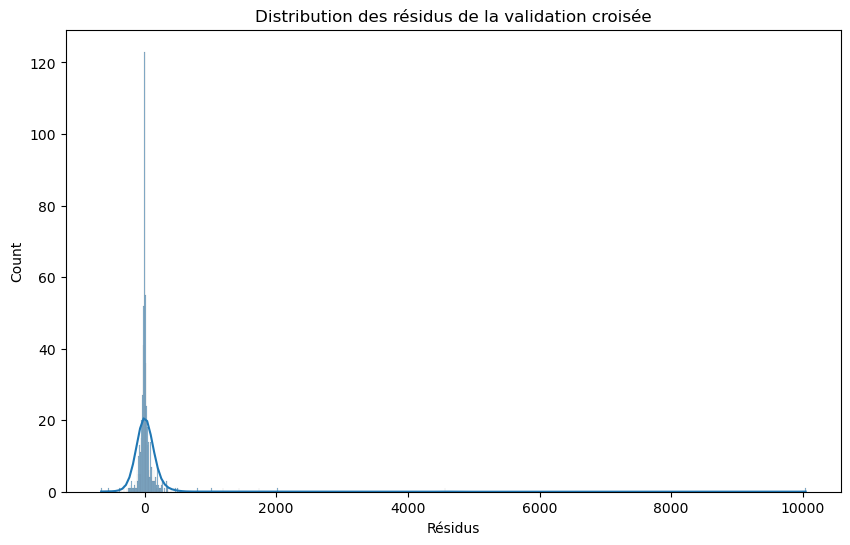

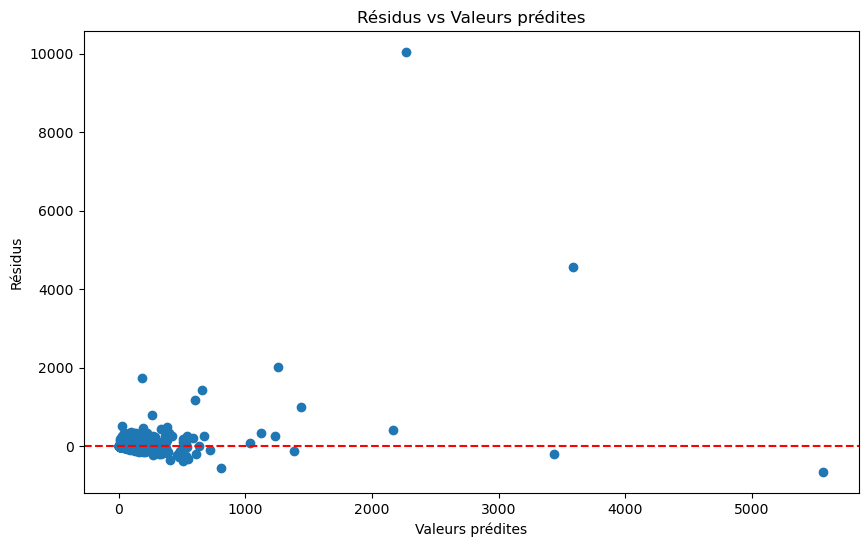

Statistiques des résidus :
Moyenne : 40.36590658912964
Écart-type : 431.24586078125253
Médiane : 0.2689828491210946
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
618        12307.16     2265.224609  10041.935391
124         8145.52     3587.804932   4557.715068
1672        3278.11     1257.600708   2020.509292
558         1921.82      183.320709   1738.499291
2           2089.28      659.023071   1430.256929
3187        1789.69      600.289185   1189.400815
49          2451.58     1439.486328   1012.093672
194         1060.13      259.145508    800.984492
309          530.59       23.726057    506.863943
559          882.56      383.140289    499.419711


In [2055]:
y_pred_cv = cross_val_predict(pipeline_xgb_v6, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

| Modèle | MAE  | RMSE  | R²    | MAPE  |
|:-------|------|-------|-------|-------|
| Modèle 1 (aucune transformation) | 102.65 | 413.5  | -0.04 | 1.29  |
| Modèle 2 (Log sur la cible)      | 87.82  | 328.31 | 0.65  | 0.76  |
| Modèle 3 (Suppression de Proportion_Gaz et LargestPropertyUseTypeGFA) | 81.32  | 294.86 | 0.71  | 0.73  |
| Modèle 4 (Discrétisation de NumberofFloors) | 86.76  | 315.81 | 0.67  | 0.78  |
| Modèle 5 (Combiné Usage principal + District) | 88.13  | 336.79 | 0.62  | 0.72  |
| Modèle 6 (Suppression de Proportion_Gaz et LargestPropertyUseTypeGFA) + MinMax | 81.56  | 295.94 | 0.71  | 0.72  |


Après avoir évalué plusieurs modèles de régression avec Random Forest, il est intéressant de tester un modèle SVR (Support Vector Regression). Ce modèle est particulièrement efficace pour des problèmes non linéaires et peut offrir de bonnes performances lorsque les relations entre les variables sont complexes et difficiles à capturer par des modèles comme Random Forest.

Nous allons maintenant explorer l'application du SVR en utilisant différentes techniques de transformation des données pour maximiser la performance du modèle. Cette approche nous permettra d'obtenir un nouveau point de comparaison dans notre quête d'un modèle performant.

# SVR (Support Vector Regression): test 1

Dans cette section, nous allons explorer l'utilisation de Support Vector Regression (SVR) pour modéliser les relations complexes et non linéaires entre les variables de notre jeu de données. SVR, une extension de l'algorithme SVM (Support Vector Machine), est particulièrement adapté lorsqu'il existe des modèles non linéaires sous-jacents dans les données, tout en étant capable de gérer des erreurs et des variations au sein des données d'entrée.

L'un des avantages clés de SVR est sa capacité à trouver un compromis entre la précision du modèle et la tolérance aux erreurs, en contrôlant la largeur de la marge d'erreur autorisée via des hyperparamètres comme C et epsilon. Cela permet à SVR d'obtenir des prédictions robustes même en présence de données bruitées ou de relations complexes, tout en maintenant un bon pouvoir de généralisation.

Dans le cadre de notre analyse, l'application de SVR sera particulièrement utile. Nous allons appliquer cette méthode à notre modèle afin d'évaluer son efficacité par rapport à d'autres techniques de régression.

In [1477]:
# Le pipeline avec XGBoost
pipeline_svr_v1 = Pipeline([
    ('preprocessing', preprocessing_v1),  
    ('model', SVR())  
])

In [1478]:
pipeline_svr_v1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('passthrough', 'passthrough',
                                                  ['age_propriete',
                                                   'Proportion_Electricité',
                                                   'Proportion_Gaz',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA'])])),
                ('model', SVR())])

In [1479]:
# Validation croisée 
cv_results = cross_validate(pipeline_svr_v1, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 135.50889166987207
RMSE moyen sur la validation croisée: 504.87544858627314
R² moyen sur la validation croisée: 0.0091019517235307
MAPE moyen sur la validation croisée: 1.9359023933263906


# SVR (Support Vector Regression): test 2

In [1480]:
# Créer le transformateur Log pour la cible
log_transformer_y = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v2 = Pipeline([
    ('preprocessing', preprocessing_v1),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1481]:
pipeline_svr_v2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('passthrough', 'passthrough',
                                                  ['age_propriete',
                                                   'Proportion_Electricité',
                                                   'Proportion_Gaz',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1482]:
# Validation croisée 
cv_results = cross_validate(pipeline_svr_v2, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 125.69331399524917
RMSE moyen sur la validation croisée: 467.0391109600766
R² moyen sur la validation croisée: 0.18538658554703671
MAPE moyen sur la validation croisée: 1.5911537687851216


| Modèle                    | MAE   | RMSE   | R²    | MAPE   |
|:--------------------------|-------|--------|-------|--------|
| SVR (sans transformation) | 135.51| 504.88 | 0.009 | 1.94   |
| SVR (log sur la cible)    | 125.69| 467.04 | 0.185 | 1.59   |


En comparant les modèles SVR, nous constatons que l'application de la transformation logarithmique sur la cible améliore les performances par rapport au modèle sans transformation. Bien que le modèle SVR avec transformation (svr_2) réduise le MAE, le RMSE, et le MAPE par rapport au modèle sans transformation (svr_1), son R² reste relativement faible. Cela suggère que, bien que la transformation améliore la précision des prédictions, les modèles SVR, même avec transformation, ne parviennent pas à capturer pleinement la variabilité des données.

# SVR (Support Vector Regression): test 3

In [1498]:
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

var_sans_transfo = ['LargestPropertyUseTypeGFA', 'Proportion_Gaz', 'Proportion_Electricité', 'age_propriete', 'PropertyGFABuilding(s)', 'NumberofFloors', 'NumberofBuildings']#, 'Proportion_Gaz']
var_cat=['LargestPropertyUseType']

minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v21 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
        ('passthrough', 'passthrough', var_sans_transfo)
    ],
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v3 = Pipeline([
    ('preprocessing', preprocessing_v13),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1499]:
pipeline_svr_v3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofBuildings',
                                                   'LargestPropertyUseTypeGFA',
                                                   'NumberofFloors']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité',
                                                   'Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1500]:
# Validation croisée 
cv_results = cross_validate(pipeline_svr_v3, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 110.06681102371643
RMSE moyen sur la validation croisée: 449.16591886589475
R² moyen sur la validation croisée: 0.32440936652428126
MAPE moyen sur la validation croisée: 1.0191037927861522


| Modèle                                      | MAE       | RMSE      | R²       | MAPE     |
|:--------------------------------------------|-----------|-----------|----------|----------|
| SVR (sans transformation)                  | 135.51    | 504.88    | 0.009    | 1.94     |
| SVR (log sur la cible)                     | 125.69    | 467.04    | 0.185    | 1.59     |
| SVR (minmax des variables)                 | 110.07    | 449.17    | 0.32   | 1.02     |



Modèle 3 semble être une nette amélioration par rapport aux deux premiers modèles :<br>
MAE et RMSE sont les plus faibles, ce qui indique des erreurs moindres.<br>
R² montre une amélioration notable à 0.32, ce qui reflète une meilleure capacité explicative.<br>
MAPE est aussi réduit à 1.02, montrant une plus grande précision.<br>

Conclusion :<br>
Le Modèle 3, avec la normalisation des variables explicatives via MinMaxScaler et la transformation logarithmique de la cible, semble être le modèle le plus performant parmi les trois.

# SVR (Support Vector Regression): test 4

In [1501]:
col_minmax = ['age_propriete', 'PropertyGFABuilding(s)', 'NumberofBuildings', 'LargestPropertyUseTypeGFA']  

# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

Var_sans_transfo = ['Proportion_Electricité', 'Proportion_Gaz']

minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v14 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('minmax', minmax_transformer, col_minmax),
        ('discretize', floor_discretizer, ['NumberofFloors']),
        ('passthrough', 'passthrough', Var_sans_transfo)
    ],
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v4 = Pipeline([
    ('preprocessing', preprocessing_v14),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1502]:
pipeline_svr_v4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofBuildings',
                                                   'LargestPropertyUseTypeGFA']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité',
                                                   'Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1503]:
# Validation croisée 
cv_results = cross_validate(pipeline_svr_v4, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 112.70762771028312
RMSE moyen sur la validation croisée: 456.51134050160965
R² moyen sur la validation croisée: 0.26658316756097794
MAPE moyen sur la validation croisée: 0.9628569258515369


| Modèle                                      | MAE       | RMSE      | R²       | MAPE     |
|:--------------------------------------------|-----------|-----------|----------|----------|
| SVR (sans transformation)                  | 135.51    | 504.88    | 0.009    | 1.94     |
| SVR (log sur la cible)                     | 125.69    | 467.04    | 0.185    | 1.59     |
| SVR (minmax des variables)                 | 110.07    | 449.17    | 0.32   | 1.02     |
| SVR (discretisation du nombre d'étages)                 | 112.71    | 456.51    | 0.27   | 0.96     |


Le Modèle 4, qui inclut la discrétisation de NumberofFloors, améliore légèrement le MAPE par rapport au Modèle 3 (0.96 contre 1.02).<br>
En revanche, les autres métriques, notamment R² (0.27) et RMSE (456.51), sont moins performantes que celles du Modèle 3.

Conclusion :<br>
Le Modèle 3 reste globalement le plus performant pour les métriques principales (MAE, R², RMSE).

# SVR (Support Vector Regression): test 5

In [1504]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X


col_minmax = ['age_propriete', 'NumberofBuildings', 'LargestPropertyUseTypeGFA', 'NumberofFloors']  

# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_cat = ['CouncilDistrictCode']

Var_sans_transfo = ['Proportion_Electricité', 'Proportion_Gaz']

minmax_transformer = MinMaxScaler()
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)

# Prétraitement des données explicatives (X)
preprocessing_v15 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
            ('minmax', minmax_transformer, col_minmax),
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné']),
            ('passthrough', 'passthrough', Var_sans_transfo)
        ]
    ))
])

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v5 = Pipeline([
    ('preprocessing', preprocessing_v15),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1505]:
pipeline_svr_v5

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x000001BF70ED3740>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x000001BF02993A60>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('cat',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'...
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Electricité',
                                                                    'Proportion_Gaz'])]))])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1506]:
# Validation croisée 
cv_results = cross_validate(pipeline_svr_v5, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 98.96085772691062
RMSE moyen sur la validation croisée: 417.7015793772683
R² moyen sur la validation croisée: 0.4479263577614626
MAPE moyen sur la validation croisée: 0.7880916586891779


| Modèle                                      | MAE       | RMSE      | R²       | MAPE     |
|:--------------------------------------------|-----------|-----------|----------|----------|
| Modèle 3 SVR (minmax des variables)         | 110.07    | 449.17    | 0.32     | 1.02     |
| Modèle 5                                    | 98.96     | 417.70    | 0.45     | 0.79     |


Le modèle 5, qui combine le binning de PropertyGFABuilding(s) et la création d'une nouvelle variable combinée Usage_Taille_Combiné, semble avoir de meilleures performances.<br>

Il semble que la combinaison des transformations et du binning avec Usage_Taille_Combiné a permis d'améliorer considérablement la performance du modèle.<br>

# SVR (Support Vector Regression): test 6

In [1522]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X


col_minmax = ['age_propriete', 'LargestPropertyUseTypeGFA', 'NumberofFloors']  # , 'NumberofFloors'
var_cat = ['CouncilDistrictCode']
#col_bin = ['NumberofBuildings']  
Var_sans_transfo = ['Proportion_Electricité', 'Proportion_Gaz']

minmax_transformer = MinMaxScaler()
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)
binarizer_transformer = Binarizer(threshold=1)  # Binarisation


# Prétraitement des données explicatives (X)
preprocessing_v16 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
           # ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
            ('bin', binarizer_transformer, col_bin),  # Binarisation sur 'NumberofBuildings'
            ('minmax', minmax_transformer, col_minmax),
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné']),
            ('passthrough', 'passthrough', Var_sans_transfo)
        ]
    ))
])

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v6 = Pipeline([
    ('preprocessing', preprocessing_v16),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1547]:
pipeline_svr_v6

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x000001BF02991120>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x000001BF02992E80>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('bin',
                                                                   Binarizer(threshold=1),
                                                                   ['NumberofBuildings']),
                                                                  ('mi...
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Electricité',
                                                                    'Proportion_Gaz'])]))])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1548]:
# Temps d'entraînement
start_train = time.time()
pipeline_svr_v6.fit(X_train,y_train)
train_time = time.time() - start_train
print(f"Temps d'entraînement : {train_time:.2f} secondes")

Temps d'entraînement : 0.08 secondes


In [1524]:
# Validation croisée 
cv_results = cross_validate(pipeline_svr_v6, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 93.00499398927138
RMSE moyen sur la validation croisée: 383.89136265312453
R² moyen sur la validation croisée: 0.5527380174441907
MAPE moyen sur la validation croisée: 0.7418188608126195


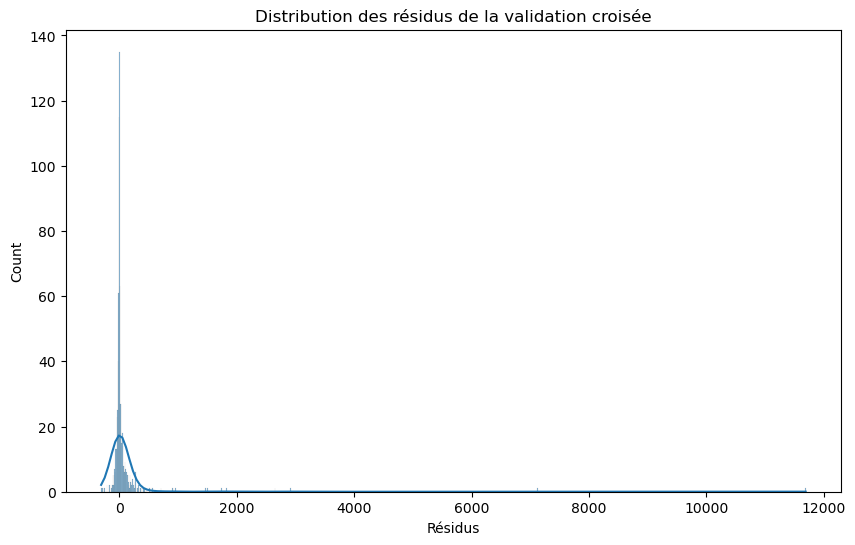

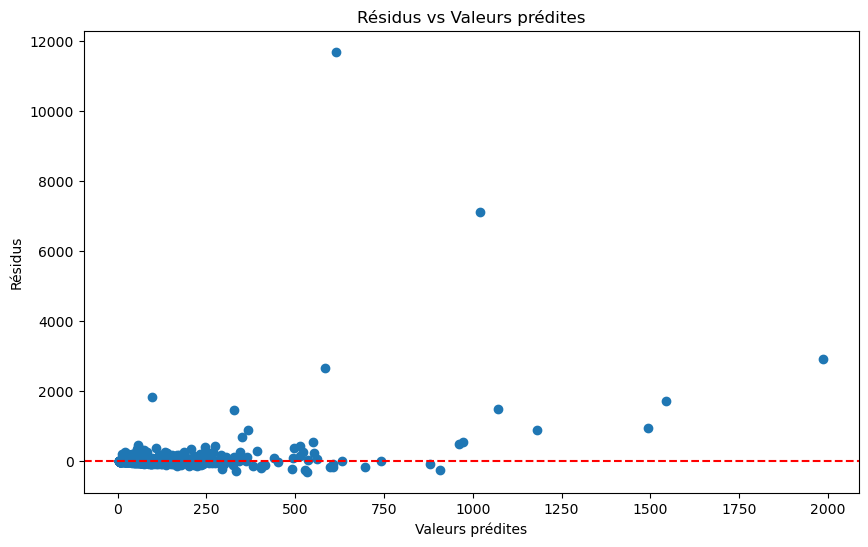

Statistiques des résidus :
Moyenne : 63.03385867569665
Écart-type : 541.461766091776
Médiane : -0.5078204208650732
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
618        12307.16      613.854494  11693.305506
124         8145.52     1021.472943   7124.047057
167         4906.33     1987.477434   2918.852566
1690        3238.24      583.405043   2654.834957
558         1921.82       97.106437   1824.713563
1672        3278.11     1545.583687   1732.526313
262         2573.75     1070.066030   1503.683970
3187        1789.69      326.982455   1462.707545
49          2451.58     1493.930315    957.649685
2           2089.28     1180.683124    908.596876


In [1530]:
y_pred_cv = cross_val_predict(pipeline_svr_v6, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

| Modèle                                      | MAE       | RMSE      | R²       | MAPE     |
|:--------------------------------------------|-----------|-----------|----------|----------|
| Modèle 5                                    | 98.96     | 417.70    | 0.45     | 0.79     |
| Modèle 6                                    | 93        | 383.89    | 0.55     | 0.74     |


L'ajout de la binarisation de NumberofBuildings et l'élimination de CouncilDistrictCode ont permis de réduire l'erreur absolue moyenne (MAE), la racine carrée de l'erreur quadratique moyenne (RMSE) et d'augmenter la performance en termes de R².<br>


En résumé, le modèle 6 offre une amélioration en termes de précision par rapport aux versions précédentes.<br>

# SVR (Support Vector Regression): test 7

In [1525]:
# Fonction personnalisée pour le binning
def bin_property_use(X):
    bins = [0, 50000, 100000, 200000, X['LargestPropertyUseTypeGFA'].max()]
    labels = [0, 1, 2, 3]
    return pd.cut(X['LargestPropertyUseTypeGFA'], bins=bins, labels=labels).to_frame()

# Transformation personnalisée encapsulée
bin_transformer_use = FunctionTransformer(bin_property_use, validate=False)

# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X

col_minmax = ['age_propriete', 'NumberofFloors']#, 'LargestPropertyUseTypeGFA']  # 
col_bin = ['NumberofBuildings']  
Var_sans_transfo = ['Proportion_Electricité', 'Proportion_Gaz']
col_binned = ['LargestPropertyUseTypeGFA']

minmax_transformer = MinMaxScaler()
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)
binarizer_transformer = Binarizer(threshold=1)  # Binarisation

# Prétraitement des données explicatives (X)
preprocessing_v17 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('binning', bin_transformer_use, col_binned),  # Création de la colonne binned,
            ('bin', binarizer_transformer, col_bin),  # Binarisation sur 'NumberofBuildings'
            ('minmax', minmax_transformer, col_minmax),
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné']),
            ('passthrough', 'passthrough', Var_sans_transfo)
        ]
    ))
])

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v7 = Pipeline([
    ('preprocessing', preprocessing_v17),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [1526]:
pipeline_svr_v7

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x000001BF029918A0>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x000001BF02991440>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('binning',
                                                                   FunctionTransformer(func=<function bin_property...
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Electricité',
                                                                    'Proportion_Gaz'])]))])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1527]:
# Validation croisée 
cv_results = cross_validate(pipeline_svr_v7, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 96.12455750397434
RMSE moyen sur la validation croisée: 395.56225793117653
R² moyen sur la validation croisée: 0.5029523782130121
MAPE moyen sur la validation croisée: 0.7546580982156617


| Modèle                                      | MAE       | RMSE      | R²       | MAPE     |
|:--------------------------------------------|-----------|-----------|----------|----------|
| Modèle 6                                    | 93        | 383.89    | 0.55     | 0.74     |
| Modèle 7                                    | 96.12     | 395.56    | 0.50     | 0.75     |

Le modèle 6 se distingue comme le meilleur en termes de performances globales (MAE, RMSE, R² et MAPE). Cela en fait un choix plus robuste et fiable pour les prédictions.

# Conclusion des différents modèles

| Modèle                          | R²     | MAE    | RMSE   | MAPE  | Moyenne des résidus | Écart-type des résidus | Médiane des résidus | Temps d'entrainement |
|:--------------------------------|--------|--------|--------|-------|----------------------|------------------------|---------------------|----------------| 
| **Régression Linéaire (lr_v7)** | 0.53   | 94.70  | 321.31 | 0.84  | 41.75               | 392.64                | -1.44              | 0.03 secondes |
| **Random Forest (Modèle 4)**   | 0.70   | 80.83  | 298.06 | 0.68  | 47.52               | 437.06                | -0.05              | 0.75 secondes |
| **XGBoost (Modèle 3)**          | 0.71   | 81.32  | 294.86 | 0.73  | 39.90               | 427.33                | 0.29               | 0.18 secondes |
| **SVR (Modèle 6)**              | 0.55   | 93.00  | 383.89 | 0.74  | 63.03               | 541.46                | -0.51              | 0.08 secondes |

Après avoir analysé les performances de différents modèles, nous avons identifié Random Forest (Modèle 4) et XGBoost (Modèle 3) comme les deux candidats les plus prometteurs pour notre problème. Ces modèles se distinguent par leurs performances supérieures en termes de R², MAE, et RMSE.<br>
Pour affiner notre choix entre ces deux modèles, nous allons procéder à une validation croisée stratifiée. Cette approche est particulièrement pertinente pour notre cas pour les raisons suivantes :<br>
- Gestion des valeurs extrêmes : Notre dataset contient quelques valeurs extrêmes importantes. La stratification nous permettra de nous assurer que ces valeurs sont bien représentées dans chaque fold de la validation croisée, donnant ainsi une évaluation plus robuste de la performance des modèles sur ces cas critiques.
- Distribution non uniforme de la variable cible : La stratification aidera à maintenir une distribution similaire de la variable cible dans tous les folds, ce qui est crucial pour une évaluation équitable des modèles.
- Stabilité de l'évaluation : En utilisant une validation croisée stratifiée, nous obtiendrons une estimation plus stable et fiable des performances de chaque modèle, réduisant ainsi le risque de surinterprétation de résultats potentiellement biaisés.
- Comparaison équitable : Cette méthode nous permettra de comparer Random Forest et XGBoost sur un pied d'égalité, en s'assurant que chaque modèle est évalué sur des distributions similaires de données à travers les folds.
- Potentiel d'amélioration : Cette approche pourrait révéler des différences subtiles entre les deux modèles, notamment dans leur capacité à gérer les valeurs extrêmes ou rares, ce qui n'était peut-être pas évident avec la validation croisée standard.<br>

En appliquant cette méthode, nous visons à obtenir une évaluation plus nuancée et robuste de ces deux modèles performants. Le choix final sera basé sur les résultats de cette validation croisée stratifiée, en prenant en compte non seulement les métriques globales (R², MAE, RMSE, MAPE), mais aussi la stabilité des performances à travers les folds et la capacité à bien prédire sur l'ensemble de la distribution de notre variable cible, y compris les valeurs extrêmes.
Cette approche nous permettra de sélectionner le modèle le plus adapté à notre problème spécifique, en tenant compte de toutes les particularités de notre jeu de données.

In [1644]:
for q in [150, 125, 100]:
    y_bins = pd.qcut(y_train, q=q, labels=False, duplicates='drop')
    print(f"\nNombre de bins : {q}")
    print(y_bins.value_counts().sort_values())  # Vérifie le plus petit bin


Nombre de bins : 150
TotalGHGEmissions
11     3
61     4
121    4
139    4
78     5
      ..
0      6
60     6
122    6
140    6
10     7
Name: count, Length: 150, dtype: int64

Nombre de bins : 125
TotalGHGEmissions
112    6
106    6
41     6
9      6
99     6
      ..
110    6
118    6
8      6
121    6
0      7
Name: count, Length: 125, dtype: int64

Nombre de bins : 100
TotalGHGEmissions
72    7
46    7
96    7
76    7
62    7
     ..
1     8
58    8
53    8
5     8
33    8
Name: count, Length: 100, dtype: int64


Dans le cadre de notre analyse de la distribution des émissions de gaz à effet de serre (TotalGHGEmissions), nous avons évalué trois stratégies de stratification : 150, 125 et 100 bins.<br>
Justification du choix de 125 bins
- Distribution optimale des observations<br>
Chaque bin contient en moyenne 6 observations, offrant une représentation stable et équilibrée.
Contrairement aux 150 bins (avec des bins de 3-4 observations), cette approche garantit une meilleure représentativité statistique.<br>
- Gestion précise des valeurs extrêmes<br>
125 bins permettent d'isoler et de représenter efficacement les valeurs extrêmes.
Cette granularité capture la variabilité des données sans fragmenter excessivement l'échantillon.
- Compromis méthodologique<br>
Équilibre entre la finesse de 150 bins et la robustesse de 100 bins.<br>
- Assure une stratification qui reflète fidèlement la distribution complexe de TotalGHGEmissions.

Implications méthodologiques
- Validation croisée plus stable et représentative.
- Meilleure généralisation des modèles prédictifs.
- Réduction des biais potentiels liés à l'échantillonnage.

Conclusion<br>
Le choix de 125 bins représente une approche méthodologique rigoureuse pour notre analyse prédictive des émissions de gaz à effet de serre.

In [1656]:
# Créer les bins pour la stratification
y_train_bins = pd.qcut(y_train, q=125, labels=False)

# Créer l'objet StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [1657]:
# Validation croisée stratifiée
cv_results = cross_validate(
    pipeline_rf_v4, 
    X_train, 
    y_train, 
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification
    scoring=scoring, 
    return_train_score=False
)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 80.51884614611608
RMSE moyen sur la validation croisée: 329.2066905585667
R² moyen sur la validation croisée: 0.6473973158594772
MAPE moyen sur la validation croisée: 0.6803680947878703


In [2050]:
# Validation croisée stratifiée
cv_results = cross_validate(
    pipeline_xgb_v3, 
    X_train, 
    y_train, 
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification
    scoring=scoring, 
    return_train_score=False
)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 74.94645428090328
RMSE moyen sur la validation croisée: 283.0549562550708
R² moyen sur la validation croisée: 0.7749820150436344
MAPE moyen sur la validation croisée: 0.6618135504355368


**Random Forest**<br>
MAE : 80.52<br>
RMSE : 329.21<br>
R² : 0.6474<br>
MAPE : 0.6804<br>
**XGBoost**<br>
MAE : 75.65<br>
RMSE : 264.65<br>
R² : 0.7278<br>
MAPE : 0.7396<br>

Analyse comparative<br>
Précision globale : XGBoost surpasse Random Forest avec un R² de 0.7278 contre 0.6474, indiquant une meilleure capacité explicative du modèle.<br>
Erreur moyenne : XGBoost présente un MAE inférieur (75.65 vs 80.52), démontrant une meilleure précision générale des prédictions.<br>
Gestion des valeurs extrêmes : Le RMSE nettement inférieur de XGBoost (264.65 vs 329.21) suggère une meilleure performance sur les valeurs extrêmes.<br>
Erreur relative : Random Forest a un MAPE légèrement inférieur (0.6804 vs 0.7396), indiquant une meilleure performance relative sur certaines prédictions.<br>

Conclusion<br>
XGBoost se révèle être le modèle le plus performant pour notre problème de prédiction des émissions de gaz à effet de serre. Il offre une meilleure précision globale (R² plus élevé), une erreur moyenne plus faible (MAE inférieur), et une meilleure gestion des valeurs extrêmes (RMSE inférieur). Bien que Random Forest ait un léger avantage en termes de MAPE, les autres métriques penchent nettement en faveur de XGBoost.<br>
Le choix de XGBoost comme modèle final est donc justifié par sa performance supérieure sur la majorité des métriques évaluées, en particulier sa capacité à mieux expliquer la variance des données (R² plus élevé) et à gérer efficacement les valeurs extrêmes (RMSE significativement plus bas).

# Analyse des performances du modèle

In [1680]:
def evaluation_model(model, X_train, y_train, X_test, y_test):
    """
    Évalue les performances d'un modèle sur les ensembles d'entraînement et de test.
    
    Paramètres :
    - model : Modèle entraîné.
    - X_train : Données explicatives d'entraînement.
    - y_train : Cibles d'entraînement.
    - X_test : Données explicatives de test.
    - y_test : Cibles de test.
    
    Retourne :
    - Un dictionnaire contenant les métriques R², MAE, RMSE, MAPE pour l'entraînement et le test.
    - Les prédictions pour l'ensemble d'entraînement et de test.
    """
    # Faire des prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculer les métriques pour l'ensemble d'entraînement
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    
    # Calculer les métriques pour l'ensemble de test
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    # Résumé des résultats
    metrics = {
        'R² (train)': r2_train,
        'MAE (train)': mae_train,
        'RMSE (train)': rmse_train,
        'MAPE (train)': mape_train,
        'R² (test)': r2_test,
        'MAE (test)': mae_test,
        'RMSE (test)': rmse_test,
        'MAPE (test)': mape_test
    }
    
    # Affichage des métriques
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    
    return metrics, y_train_pred, y_test_pred

In [1681]:
metrics, y_train_pred, y_test_pred = evaluation_model(pipeline_xgb_v3, X_train, y_train, X_test, y_test)
print(metrics)

R² (train): 1.00
MAE (train): 3.95
RMSE (train): 11.92
MAPE (train): 0.04
R² (test): 0.57
MAE (test): 109.64
RMSE (test): 602.09
MAPE (test): 0.61
{'R² (train)': 0.9996407332928701, 'MAE (train)': 3.9455023986013855, 'RMSE (train)': 11.924045968935468, 'MAPE (train)': 0.03651863743143612, 'R² (test)': 0.5698535808904468, 'MAE (test)': 109.63525039627197, 'RMSE (test)': 602.0861785282463, 'MAPE (test)': 0.6095794101198487}


# XGBoost (Extreme Gradient Boosting): amélioration des paramètres

Principaux Hyperparamètres d'XGBoost<br>
**n_estimators** :<br>
Le nombre d'arbres dans le modèle. Plus ce nombre est élevé, plus le modèle sera complexe. Cependant, un trop grand nombre d'arbres peut entraîner un surapprentissage (overfitting). Une valeur trop faible peut sous-apprendre (underfitting).

**max_depth** :<br>
La profondeur maximale de chaque arbre de décision. Des arbres plus profonds permettent au modèle de capturer plus de relations complexes dans les données, mais cela augmente également le risque de surapprentissage. Généralement, des valeurs comprises entre 3 et 10 sont utilisées pour éviter un modèle trop complexe.<br>

**learning_rate (ou eta)** :<br>
Le taux d'apprentissage est un paramètre essentiel qui contrôle la contribution de chaque arbre à la prédiction finale. Un taux d'apprentissage plus bas rend le modèle plus robuste mais nécessite un plus grand nombre d'arbres (c'est-à-dire une valeur plus élevée de n_estimators). Un taux d'apprentissage trop élevé peut entraîner une mauvaise convergence ou un surapprentissage. Une valeur plus faible signifie que chaque nouvel arbre a moins d'influence, ce qui peut aider à éviter le surapprentissage.

**subsample** :<br>
Ce paramètre détermine la fraction des données d'entraînement utilisées pour entraîner chaque arbre. Des valeurs proches de 1 signifient que chaque arbre est construit en utilisant presque toutes les données, ce qui peut entraîner un surapprentissage si le modèle devient trop spécifique aux données d'entraînement. Des valeurs plus faibles, comme 0.8, peuvent aider à réduire le surapprentissage en introduisant un peu plus de variance.

**colsample_bytree** :<br>
La fraction des caractéristiques (features) à utiliser pour chaque arbre. Cela permet de réguler la diversité des arbres, en évitant qu'un arbre soit trop similaire aux autres. Des valeurs comme 0.8 ou 0.9 sont souvent efficaces pour éviter que le modèle ne devienne trop ajusté aux données spécifiques.

**gamma** :<br>
Ce paramètre contrôle la complexité du modèle en spécifiant une pénalité pour les splits (coupures) d'un arbre. Plus la valeur de gamma est élevée, moins l'arbre sera susceptible de se diviser. Cela peut aider à réduire le surapprentissage en contrôlant la profondeur des arbres.

**min_child_weight** :<br>
Le poids minimal d'un enfant. Ce paramètre détermine la quantité minimale de données requises pour effectuer un split (coupure) dans l'arbre. Des valeurs plus élevées peuvent empêcher le modèle de surapprendre sur des petites variations dans les données.

**scale_pos_weight** :<br>
Utilisé pour les classes déséquilibrées. Ce paramètre aide à compenser le déséquilibre en ajustant le poids des classes positives lors de l'entraînement, particulièrement utile pour les tâches de classification binaire.

**lambda (L2 regularization) et alpha (L1 regularization)** :<br>
Ce sont des termes de régularisation L2 (lambda) et L1 (alpha) qui aident à réduire le surapprentissage en ajoutant des pénalités à la complexité du modèle. La régularisation L2 pénalise les grands poids des arbres, tandis que L1 favorise les modèles plus simples avec des poids plus proches de zéro.

**objective** :<br>
Le type de fonction de perte utilisée pour entraîner le modèle. Pour la régression, cela peut être reg:squarederror (erreur quadratique), reg:logistic pour des régressions logistiques, ou d'autres variantes selon la tâche.

**booster** :<br>
Le type de booster à utiliser. Les options incluent gbtree (utilisation d'arbres de décision), gblinear (régression linéaire) et dart (Dropouts meet Multiple Additive Regression Trees, une variante plus robuste avec des régularisations).

## 1ère grille de paramètres

In [1659]:
param_grid_xgb = {
    'model__regressor__n_estimators': [100, 150, 200],  
    'model__regressor__max_depth': [3, 4, 5],  # Favorise des arbres moins profonds
    'model__regressor__learning_rate': [0.001, 0.01, 0.1, 0.3],  # Taux d'apprentissage
    'model__regressor__subsample': [0.7, 0.8, 0.9], 
    'model__regressor__colsample_bytree': [0.7, 0.8, 0.9],  
    'model__regressor__reg_alpha': [0.1, 0.5, 1.0],  # Régularisation L1
    'model__regressor__reg_lambda': [0.1, 0.5, 1.0],  # Régularisation L2
    'model__regressor__min_child_weight': [2, 3]  
}

In [1660]:
pipeline_xgb_v3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité',
                                                   'age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'NumberofBuildings'])])),
                ('model',
                 TransformedTargetRegressor(re...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1661]:
# Modifier GridSearchCV pour utiliser la validation croisée stratifiée
grid_search_xgb_v1 = GridSearchCV(
    pipeline_xgb_v3, 
    param_grid_xgb, 
    cv=stratified_cv.split(X_train, y_train_bins),  # Utiliser stratified_cv.split()
    scoring=scoring, 
    refit='RMSE', 
    return_train_score=True
)

In [1662]:
# Entraîner le modèle
grid_search_xgb_v1.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001BF5B7FB010>,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['LargestPropertyUseType',
                                                                          'CouncilDistrictCode']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['Proportion_Electricité',
                                                                          'age_propriete',
                                                                          'PropertyGFABuilding(s)',...
                         'model__regressor__n_estimators': [100, 150, 200],
                         'model__regressor__reg_alpha': [0.1, 0.5, 1.0],
                         'model__regressor__reg_lambda': [0.1, 0.5, 1.0],
                         'model__regressor__subsample': [0.7, 0.8, 0.9]},
             refit='RMSE', return_train_score=True,
             scoring={'MAE': 'neg_mean_absolute_error',
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': 'r2', 'RMSE': 'neg_root_mean_squared_error'})

In [1663]:
# Extraire les résultats
cv_results_xgb = grid_search_xgb_v1.cv_results_
best_index_xgb = grid_search_xgb_v1.best_index_

# Scores du meilleur modèle
best_mae_xgb = cv_results_xgb['mean_test_MAE'][best_index_xgb]
best_rmse_xgb = cv_results_xgb['mean_test_RMSE'][best_index_xgb]
best_r2_xgb = cv_results_xgb['mean_test_R2'][best_index_xgb]
best_mape_xgb = cv_results_xgb['mean_test_MAPE'][best_index_xgb]

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés XGBoost :", grid_search_xgb_v1.best_params_)

# Afficher les scores du meilleur modèle
print(f"MAE moyen du meilleur modèle XGBoost : {-best_mae_xgb}")
print(f"RMSE moyen du meilleur modèle XGBoost : {-best_rmse_xgb}")
print(f"R² moyen du meilleur modèle XGBoost : {best_r2_xgb}")
print(f"MAPE moyen du meilleur modèle XGBoost : {best_mape_xgb}")

Meilleurs hyperparamètres trouvés XGBoost : {'model__regressor__colsample_bytree': 0.8, 'model__regressor__learning_rate': 0.3, 'model__regressor__max_depth': 3, 'model__regressor__min_child_weight': 3, 'model__regressor__n_estimators': 100, 'model__regressor__reg_alpha': 0.5, 'model__regressor__reg_lambda': 0.1, 'model__regressor__subsample': 0.7}
MAE moyen du meilleur modèle XGBoost : 64.79260439316553
RMSE moyen du meilleur modèle XGBoost : 169.82957041268187
R² moyen du meilleur modèle XGBoost : 0.7969236366582594
MAPE moyen du meilleur modèle XGBoost : 0.7213745339231723


Ce modèle XGBoost présente une complexité modérée :
- max_depth: 3 : Relativement faible, ce qui limite la profondeur des arbres et, par conséquent, la complexité du modèle. Cela permet d'éviter le surapprentissage tout en capturant des interactions simples entre les variables.
- n_estimators: 100 : Un nombre modéré d'arbres, permettant un bon compromis entre performance et complexité. Cela évite les calculs excessivement longs tout en offrant une bonne capacité d'apprentissage.
- learning_rate: 0.3 : Un taux d'apprentissage relativement élevé, permettant au modèle d'apprendre rapidement. Cela peut augmenter le risque de surajustement, mais dans ce cas, il semble bien équilibré avec d'autres paramètres.
- min_child_weight: 3 : Valeur modérée, évitant la division des nœuds si cela ne représente pas suffisamment d'échantillons. Cela réduit la complexité des arbres et aide à prévenir le surajustement.
- reg_alpha: 0.5 et reg_lambda: 0.1 : Une régularisation L1 modérée (0.5) et une régularisation L2 faible (0.1), qui aident à éviter le surajustement tout en permettant une certaine flexibilité du modèle.
- subsample: 0.7 et colsample_bytree: 0.8 : Un sous-échantillonnage de 70% et un échantillonnage de colonnes de 80% introduisent une randomisation légère, ce qui aide à réduire le risque de surapprentissage en introduisant de la diversité dans les arbres.<br>
**Conclusion** :<br>
Ce modèle n'est pas excessivement complexe, mais offre une flexibilité suffisante pour capturer des relations non linéaires dans les données. La faible profondeur des arbres (max_depth = 3) et la régularisation modérée assurent une bonne capacité de généralisation tout en limitant les risques de surajustement.

In [1949]:
# Obtenir le meilleur modèle
best_model_xgb_v1 = grid_search_xgb_v1.best_estimator_

# Prédictions
y_train_pred_xgb = best_model_xgb_v1.predict(X_train)
y_test_pred_xgb = best_model_xgb_v1.predict(X_test)

# Scores sur l'entraînement et le test
train_score_xgb = best_model_xgb_v1.score(X_train, y_train)
test_score_xgb = best_model_xgb_v1.score(X_test, y_test)

print("\nScores sur l'entraînement :")
print(f"R² (train) : {train_score_xgb}")
print(f"MAE (train) : {-cv_results_xgb['mean_train_MAE'][best_index_xgb]}")
print(f"RMSE (train) : {-cv_results_xgb['mean_train_RMSE'][best_index_xgb]}")
print(f"MAPE (train) : {cv_results_xgb['mean_train_MAPE'][best_index_xgb]}")

print("\nScores sur le test :")
print(f"R² (test) : {test_score_xgb}")
print(f"MAE (test) : {-cv_results_xgb['mean_test_MAE'][best_index_xgb]}")
print(f"RMSE (test) : {-cv_results_xgb['mean_test_RMSE'][best_index_xgb]}")
print(f"MAPE (test) : {cv_results_xgb['mean_test_MAPE'][best_index_xgb]}")


Scores sur l'entraînement :
R² (train) : 0.9569529639061362
MAE (train) : 43.65257461063395
RMSE (train) : 233.14089845436175
MAPE (train) : 0.32633051900480703

Scores sur le test :
R² (test) : 0.8362615933877013
MAE (test) : 77.93241267415912
RMSE (test) : 338.81667244106745
MAPE (test) : 0.6186623940609827


# Analyse des résidus

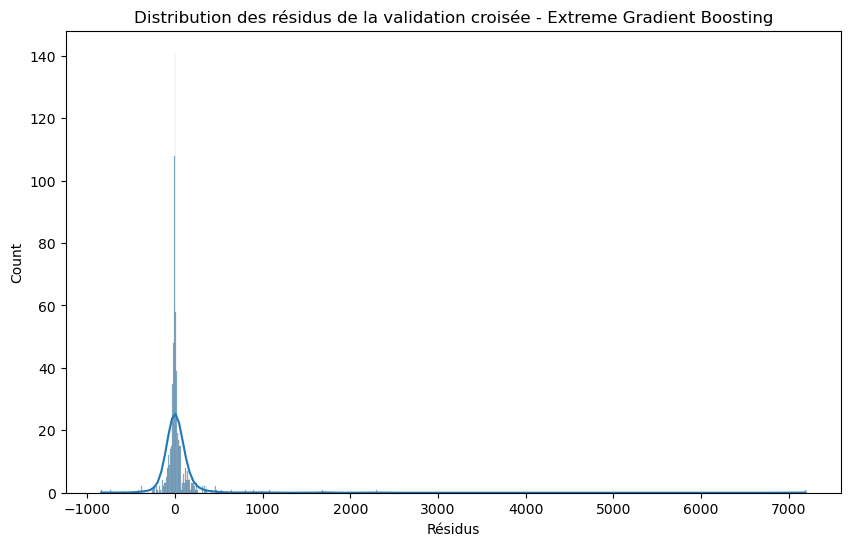

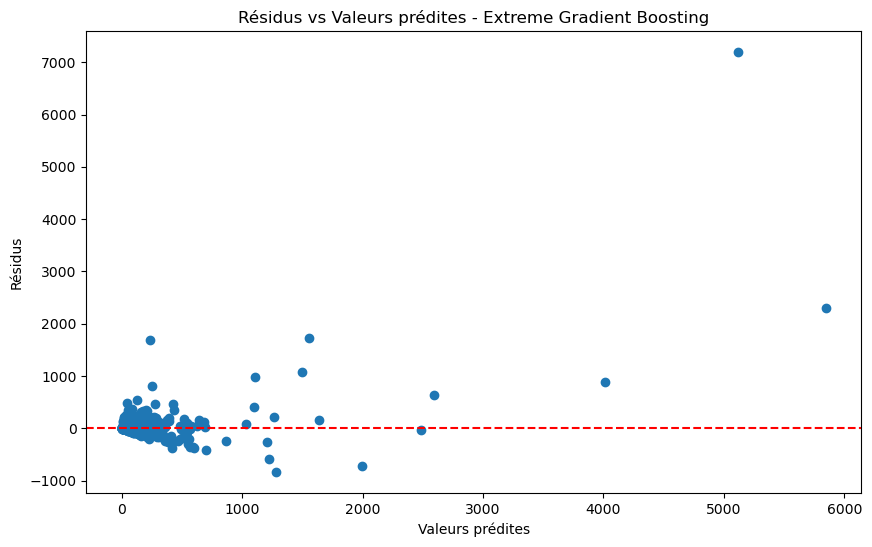

Statistiques des résidus :
Moyenne : 30.188295356849544
Écart-type : 314.37407622055207
Médiane : 0.10414245605468864
Détail des 10 plus grands résidus - Extreme Gradient Boosting :
      Valeur réelle  Valeur prédite       Résidu
618        12307.16     5113.524902  7193.635098
124         8145.52     5848.237305  2297.282695
1672        3278.11     1551.919922  1726.190078
558         1921.82      238.998184  1682.821816
262         2573.75     1494.203491  1079.546509
2           2089.28     1104.565674   984.714326
167         4906.33     4013.470947   892.859053
93           443.73     1285.127319  -841.397319
194         1060.13      251.476501   808.653499
20          1265.29     1993.134155  -727.844155


In [1950]:
y_pred_cv_xgb = cross_val_predict(grid_search_xgb_v1.best_estimator_, X_train, y_train, cv=5)

residus_xgb = y_train - y_pred_cv_xgb

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_xgb, kde=True)
plt.title("Distribution des résidus de la validation croisée - Extreme Gradient Boosting")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv_xgb, residus_xgb)
plt.title("Résidus vs Valeurs prédites - Extreme Gradient Boosting")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_xgb.mean()}")
print(f"Écart-type : {residus_xgb.std()}")
print(f"Médiane : {np.median(residus_xgb)}")

# Convertir les prédictions en Series avec le même index que y_train
y_pred_cv_xgb_series = pd.Series(y_pred_cv_xgb, index=y_train.index)

# Trouver les 10 plus grands résidus en valeur absolue
top_10_residus_xgb = residus_xgb.abs().sort_values(ascending=False).head(10)

# Récupérer les valeurs réelles et prédites correspondantes
valeurs_reelles_xgb = y_train.loc[top_10_residus_xgb.index]
valeurs_predites_xgb = y_pred_cv_xgb_series.loc[top_10_residus_xgb.index]

# Créer un DataFrame récapitulatif
df_top10_residus_xgb = pd.DataFrame({
    'Valeur réelle': valeurs_reelles_xgb,
    'Valeur prédite': valeurs_predites_xgb,
    'Résidu': residus_xgb.loc[top_10_residus_xgb.index]
})

# Afficher les résultats
print("Détail des 10 plus grands résidus - Extreme Gradient Boosting :")
print(df_top10_residus_xgb)

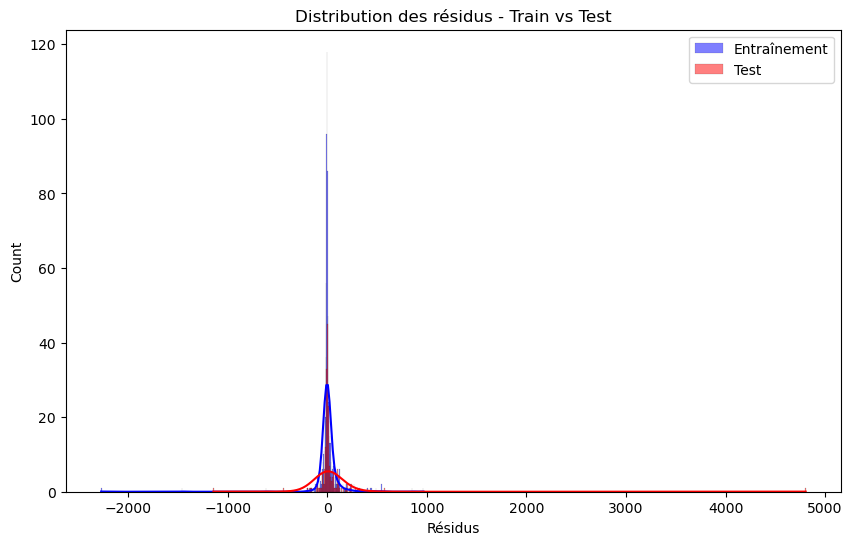

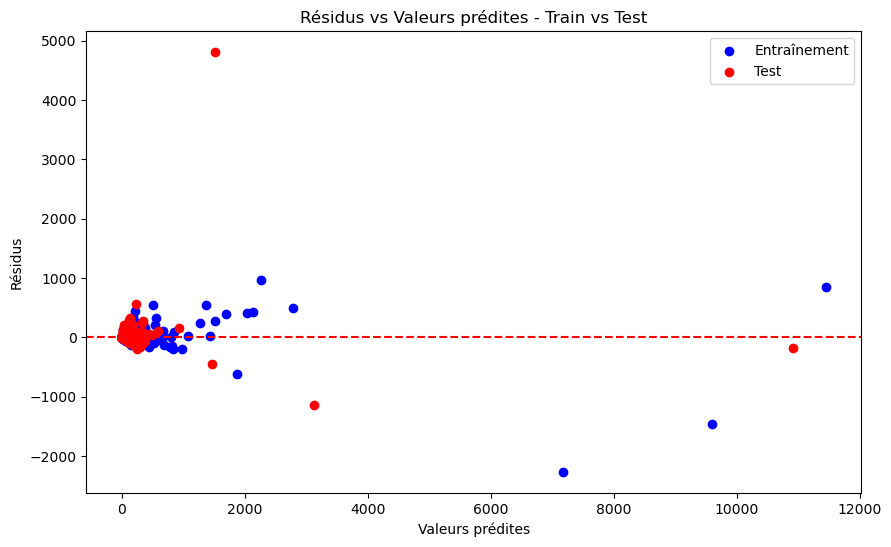

Statistiques des résidus sur l'entraînement :
Moyenne : 8.650289729266921
Écart-type : 130.3227548193921
Médiane : -0.15345882415771506

Statistiques des résidus sur le test :
Moyenne : 37.855817343681416
Écart-type : 370.52455983456827
Médiane : 2.4650671195983884

Détail des 10 plus grands résidus sur le test :
      Valeur réelle  Valeur prédite       Résidu
3264        6330.91     1526.746704  4804.163296
98          1990.50     3132.643066 -1142.143066
477          810.70      240.912918   569.787082
355         1032.63     1475.050659  -442.420659
308          456.22      132.897125   323.322875
401          414.43      114.330872   300.099128
338          632.40      347.009766   285.390234
561          582.28      338.431580   243.848420
512          357.86      122.154289   235.705711
136          369.14      143.897491   225.242509


In [1951]:
# Prédictions sur l'ensemble d'entraînement
y_pred_train_xgb = grid_search_xgb_v1.best_estimator_.predict(X_train)
# Prédictions sur l'ensemble de test
y_pred_test_xgb = grid_search_xgb_v1.best_estimator_.predict(X_test)

# Calcul des résidus sur le train et le test
residus_train_xgb = y_train - y_pred_train_xgb
residus_test_xgb = y_test - y_pred_test_xgb

# Histogramme des résidus sur le train et le test
plt.figure(figsize=(10, 6))
sns.histplot(residus_train_xgb, kde=True, color="blue", label="Entraînement")
sns.histplot(residus_test_xgb, kde=True, color="red", label="Test")
plt.title("Distribution des résidus - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites pour les deux ensembles
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_xgb, residus_train_xgb, color="blue", label="Entraînement")
plt.scatter(y_pred_test_xgb, residus_test_xgb, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Statistiques des résidus sur le train et le test
print("Statistiques des résidus sur l'entraînement :")
print(f"Moyenne : {residus_train_xgb.mean()}")
print(f"Écart-type : {residus_train_xgb.std()}")
print(f"Médiane : {np.median(residus_train_xgb)}")

print("\nStatistiques des résidus sur le test :")
print(f"Moyenne : {residus_test_xgb.mean()}")
print(f"Écart-type : {residus_test_xgb.std()}")
print(f"Médiane : {np.median(residus_test_xgb)}")

# Trouver les 10 plus grands résidus en valeur absolue sur le test
top_10_residus_test_xgb = residus_test_xgb.abs().sort_values(ascending=False).head(10)

# Récupérer les valeurs réelles et prédites correspondantes sur le test
valeurs_reelles_test_xgb = y_test.loc[top_10_residus_test_xgb.index]
valeurs_predites_test_xgb = pd.Series(y_pred_test_xgb, index=y_test.index).loc[top_10_residus_test_xgb.index]

# Créer un DataFrame récapitulatif des 10 plus grands résidus sur le test
df_top10_residus_test_xgb = pd.DataFrame({
    'Valeur réelle': valeurs_reelles_test_xgb,
    'Valeur prédite': valeurs_predites_test_xgb,
    'Résidu': residus_test_xgb.loc[top_10_residus_test_xgb.index]
})

# Afficher les résultats
print("\nDétail des 10 plus grands résidus sur le test :")
print(df_top10_residus_test_xgb)

In [1995]:
# Indices des plus grands résidus dans le DataFrame original X
indices_residus = [3264, 98, 477, 355, 308, 401, 338, 561, 512, 136]

# Extraire les indices de X_test (qui sont dans X d'origine)
indices_X_temp = X_temp.index

# Trouver les indices dans X_test en comparant avec les indices de X
indices_residus_dans_X_temp = [idx for idx in indices_residus if idx in indices_X_temp]

# Extraire les lignes de X_test correspondant à ces indices
X_grands_residus = X_temp.loc[indices_residus_dans_X_temp]

# Afficher les lignes de X_test
(X_grands_residus).head(10)

LargestPropertyUseType CouncilDistrictCode  \
3264  Installations spécialisées et services publics                   3   
98    Installations spécialisées et services publics                   6   
477                   Bureaux et services financiers                   2   
355   Installations spécialisées et services publics                   3   
308              Commerce, distribution et entrepôts                   7   
401              Commerce, distribution et entrepôts                   5   
338                   Bureaux et services financiers                   3   
561                   Bureaux et services financiers                   7   
512                   Bureaux et services financiers                   7   
136              Commerce, distribution et entrepôts                   1   

      age_propriete  Proportion_Electricité  Proportion_Gaz  \
3264            105                    0.55            0.00   
98               71                    0.52            0.48   
477             113                    0.91            0.09   
355              25                    0.63            0.37   
308              24                    0.97            0.03   
401              22                    0.54            0.46   
338              23                    0.70            0.30   
561             100                    0.72            0.00   
512              47                    0.80            0.20   
136              60                    0.28            0.72   

      NumberofBuildings  NumberofFloors  PropertyGFABuilding(s)  \
3264                  1               8                  374466   
98                    4               5                  285333   
477                   1               6                 1380959   
355                   1               7                  201075   
308                   1               6                  200783   
401                   1               1                   50734   
338                   1               5                  353919   
561                   1              18                  335064   
512                   1               1                  105100   
136                   1               1                   67745   

      LargestPropertyUseTypeGFA  ENERGYSTARScore  TotalGHGEmissions  \
3264                  1010135.0             74.0            6330.91   
98                     302661.0             14.0            1990.50   
477                   1000730.0             79.0             810.70   
355                    215602.0             23.0            1032.63   
308                    164332.0            100.0             456.22   
401                     51722.0             41.0             414.43   
338                    372503.0             71.0             632.40   
561                    281598.0             68.0             582.28   
512                    105100.0              1.0             357.86   
136                     67782.0             37.0             369.14   

             Size_Category                               Usage_Taille_Combiné  \
3264  Très grand + Immense  Installations spécialisées et services publics...   
98    Très grand + Immense  Installations spécialisées et services publics...   
477   Très grand + Immense  Bureaux et services financiers Très grand + Im...   
355   Très grand + Immense  Installations spécialisées et services publics...   
308   Très grand + Immense  Commerce, distribution et entrepôts Très grand...   
401                  Petit          Commerce, distribution et entrepôts Petit   
338   Très grand + Immense  Bureaux et services financiers Très grand + Im...   
561   Très grand + Immense  Bureaux et services financiers Très grand + Im...   
512        Moyenne + Grand     Bureaux et services financiers Moyenne + Grand   
136                  Petit          Commerce, distribution et entrepôts Petit   

                      Usage_Regroupé      Taille_Regroupée  \
3264  Installations/Servi

In [1952]:
# Résumé statistique des résidus sur l'entraînement
describe_residus_train = residus_train_xgb.describe()

# Résumé statistique des résidus sur le test
describe_residus_test = residus_test_xgb.describe()

# Affichage des résumés
print("Résumé statistique des résidus sur l'entraînement :")
print(describe_residus_train)

print("\nRésumé statistique des résidus sur le test :")
print(describe_residus_test)

Résumé statistique des résidus sur l'entraînement :
count     751.000000
mean        8.650290
std       130.322755
min     -2269.557695
25%        -8.490747
50%        -0.153459
75%        11.378513
max       966.762949
Name: TotalGHGEmissions, dtype: float64

Résumé statistique des résidus sur le test :
count     188.000000
mean       37.855817
std       370.524560
min     -1142.143066
25%        -8.374671
50%         2.465067
75%        22.428086
max      4804.163296
Name: TotalGHGEmissions, dtype: float64


# Analyse des résidus par tranche

Statistiques des résidus par tranche (Train) :
                       mean          std      median  count
Tranche                                                   
[0-48.13]        -4.362642    12.170029   -1.933293    376
[48.13-173.67]    3.816666    32.005171    3.433372    225
[173.67-313.3]   31.179236    72.212227   25.903358     75
[313.3-2005.55]  76.240701   172.742612   52.297599     67
2005.55+        -21.074795  1175.800821  421.230186      8

Statistiques des résidus par tranche (Test) :
                         mean          std       median  count
Tranche                                                      
[0-48.13]          -3.329912    18.776310    -0.468673     94
[48.13-173.67]      3.387355    59.363138     7.679504     56
[173.67-313.3]     68.117607    87.638140    71.355996     19
[313.3-2005.55]    77.940978   376.733074   159.073752     17
2005.55+         2310.491160  3526.584955  2310.491160      2


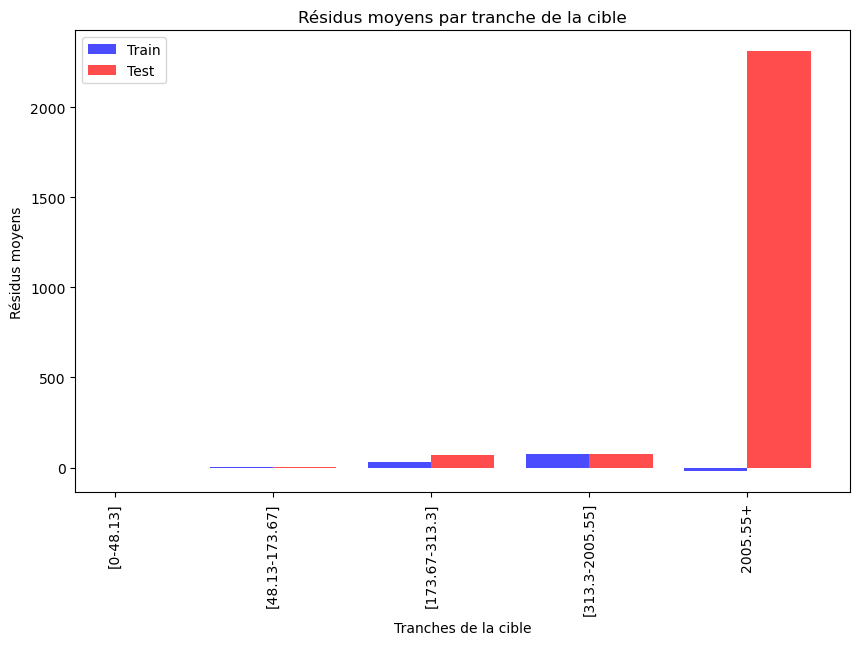

In [1686]:
# Définir les tranches basées sur les statistiques de la cible
bins = [0, 48.13, 173.67, 313.3, 2005.55, np.inf]  # Tranches basées sur les quantiles et std
labels = ['[0-48.13]', 
          '[48.13-173.67]', '[173.67-313.3]', '[313.3-2005.55]',
          '2005.55+']

# Ajout des tranches à l'ensemble d'entraînement et de test
y_train_bins = pd.cut(y_train, bins=bins, labels=labels)
y_test_bins = pd.cut(y_test, bins=bins, labels=labels)

# Ajouter les résidus dans un DataFrame pour simplifier l'analyse
residus_train_df = pd.DataFrame({'Cible': y_train, 'Résidus': residus_train_xgb, 'Tranche': y_train_bins})
residus_test_df = pd.DataFrame({'Cible': y_test, 'Résidus': residus_test_xgb, 'Tranche': y_test_bins})

# Calculer les statistiques des résidus par tranche
stat_residus_train = residus_train_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test = residus_test_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train) :\n", stat_residus_train)
print("\nStatistiques des résidus par tranche (Test) :\n", stat_residus_test)

# Visualiser les résidus moyens par tranche
plt.figure(figsize=(10, 6))
stat_residus_train['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train', width=0.4, position=1)
stat_residus_test['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.show()

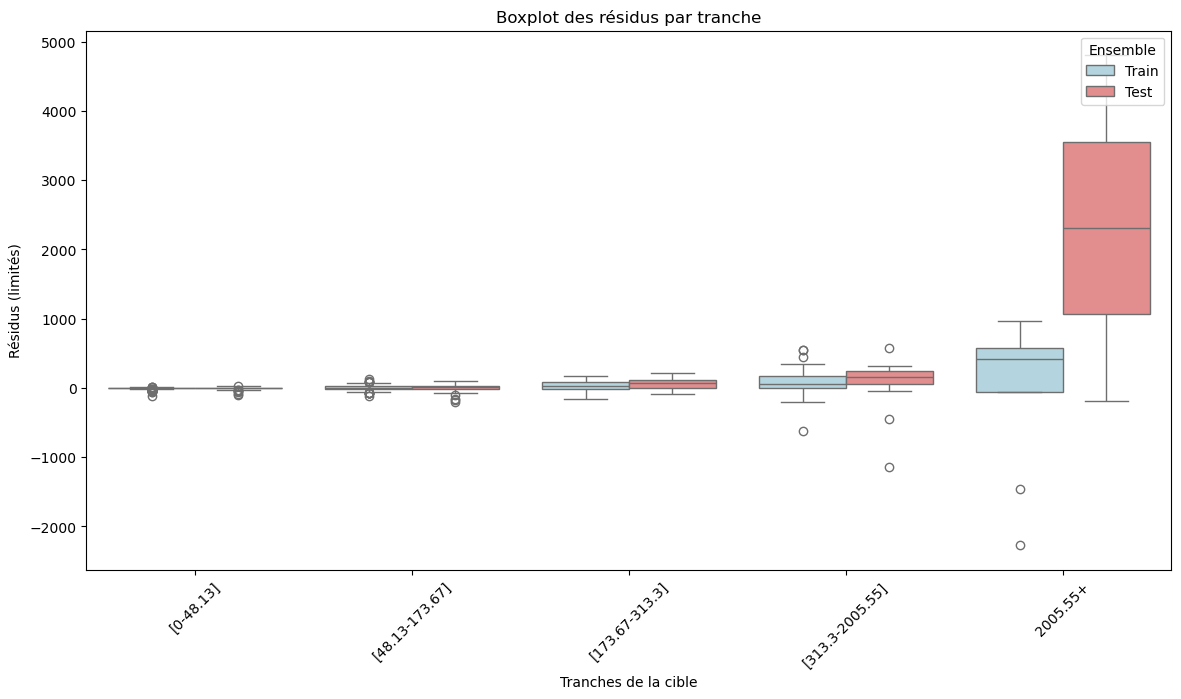

Nombre de valeurs extrêmes : 0
Empty DataFrame
Columns: [Cible, Résidus, Tranche, Ensemble, Résidu limité]
Index: []


In [1808]:
# Définir une limite pour les résidus 
residus_limite = 5000

# Ajouter une colonne pour différencier les ensembles
residus_train_df['Ensemble'] = 'Train'
residus_test_df['Ensemble'] = 'Test'

# Combiner les deux DataFrames
residus_combined_df = pd.concat([residus_train_df, residus_test_df])

# Ajouter une colonne pour filtrer les valeurs extrêmes
residus_combined_df['Résidu limité'] = residus_combined_df['Résidus'].clip(-residus_limite, residus_limite)

# Créer les boxplots avec limite
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=residus_combined_df,
    x='Tranche',
    y='Résidu limité',
    hue='Ensemble',
    palette={'Train': 'lightblue', 'Test': 'lightcoral'}
)
plt.title("Boxplot des résidus par tranche")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus (limités)")
plt.xticks(rotation=45)
plt.legend(title="Ensemble", loc='upper right')
plt.show()

# Identifier les valeurs extrêmes (hors des limites)
valeurs_extremes = residus_combined_df[
    (residus_combined_df['Résidus'] > residus_limite) | 
    (residus_combined_df['Résidus'] < -residus_limite)
]

# Afficher les valeurs extrêmes
print(f"Nombre de valeurs extrêmes : {len(valeurs_extremes)}")
print(valeurs_extremes)

**Statistiques des résidus par tranche (Train)** :

| Tranche           | mean       | std        | median     | count | % cumulé |
|:------------------|------------|------------|------------|-------|----------|
| [0-48.13]         | -4.362642  | 12.170029  | -1.933293  | 376   | 50.07%   |
| [48.13-173.67]    | 3.816666   | 32.005171  | 3.433372   | 225   | 80.03%   |
| [173.67-313.3]    | 31.179236  | 72.212227  | 25.903358  | 75    | 90.01%   |
| [313.3-2005.55]   | 76.240701  | 172.742612 | 52.297599  | 67    | 98.93%   |
| 2005.55+          | -21.074795 | 1175.800821| 421.230186 | 8     | 100.00%  |

**Statistiques des résidus par tranche (Test)** :

| Tranche           | mean       | std        | median     | count | % cumulé |
|:------------------|------------|------------|------------|-------|----------|
| [0-48.13]         | -3.329912  | 18.776310  | -0.468673  | 94    | 50.00%   |
| [48.13-173.67]    | 3.387355   | 59.363138  | 7.679504   | 56    | 79.79%   |
| [173.67-313.3]    | 68.117607  | 87.638140  | 71.355996  | 19    | 89.89%   |
| [313.3-2005.55]   | 77.940978  | 376.733074 | 159.073752 | 17    | 98.94%   |
| 2005.55+          | 2310.491160| 3526.584955| 2310.491160| 2     | 100.00%  |

**Performance globale** :<br>
Le modèle XGBoost montre des performances généralement bonnes, avec un R² de 0.797 en validation croisée et 0.836 sur l'ensemble de test. Ces scores indiquent une capacité décente à prédire les émissions de gaz à effet de serre.<br>
**Forces du modèle** :<br>
Bonne performance sur la majorité des données, en particulier pour les valeurs basses et moyennes.<br>
Capacité à capturer des relations non linéaires dans les données.<br>
Robustesse générale, comme en témoigne la cohérence entre les scores de validation croisée et de test.<br>
**Limitations et défis** :<br>
Difficulté à prédire avec précision les valeurs élevées, principalement due à leur sous-représentation dans le jeu de données.
Erreurs importantes sur certaines prédictions individuelles, en particulier pour les valeurs élevées.<br>
**Problème de déséquilibre des données** :<br>
La distribution très déséquilibrée des données, avec une forte concentration dans les tranches inférieures et très peu d'observations dans les tranches supérieures, est le principal défi pour ce modèle.<br>
**Pistes d'amélioration** :<br>
Traiter le déséquilibre des données par des techniques comme l'ajustement des poids des échantillons.

# Ajout de poids sur les outliers

In [1819]:
best_model = pipeline_xgb_v3.set_params(**grid_search_xgb_v1.best_params_)
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité',
                                                   'age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'NumberofBuildings'])])),
                ('model',
                 TransformedTargetRegressor(re...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=3,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=100,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [1862]:
# Appliquer la transformation log à y_train
y_train_transformed = best_model.named_steps['model'].transformer.transform(y_train.values.reshape(-1, 1)).ravel()

# Calculer les poids sur y_train transformé
sample_weights = np.ones(len(y_train_transformed))
high_value_threshold = np.percentile(y_train_transformed, 95)
high_value_mask = y_train_transformed > high_value_threshold
sample_weights[high_value_mask] = 1.2

In [1863]:
# Appliquer le prétraitement
X_train_preprocessed = best_model.named_steps['preprocessing'].transform(X_train)

# Réentraîner le modèle XGBoost avec les poids
best_model.named_steps['model'].regressor_.fit(X_train_preprocessed, y_train_transformed, sample_weight=sample_weights)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1864]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Scores sur l'entraînement :")
print(f"R² (train) : {r2_score(y_train, y_pred_train)}")
print(f"MAE (train) : {mean_absolute_error(y_train, y_pred_train)}")
print(f"RMSE (train) : {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"MAPE (train) : {mean_absolute_percentage_error(y_train, y_pred_train)}")

print("\nScores sur le test :")
print(f"R² (test) : {r2_score(y_test, y_pred_test)}")
print(f"MAE (test) : {mean_absolute_error(y_test, y_pred_test)}")
print(f"RMSE (test) : {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
print(f"MAPE (test) : {mean_absolute_percentage_error(y_test, y_pred_test)}")


Scores sur l'entraînement :
R² (train) : 0.9764173299539968
MAE (train) : 35.039332568223244
RMSE (train) : 96.60767764932291
MAPE (train) : 0.3345030861013799

Scores sur le test :
R² (test) : 0.6005224757853105
MAE (test) : 108.11190561208318
RMSE (test) : 580.2253198149734
MAPE (test) : 0.5507601219395739


## Analyse des résidus

In [1865]:
y_pred_train_weighted = best_model.predict(X_train)
y_pred_test_weighted = best_model.predict(X_test)

In [1866]:
residus_train_weighted = y_train - y_pred_train_weighted
residus_test_weighted = y_test - y_pred_test_weighted

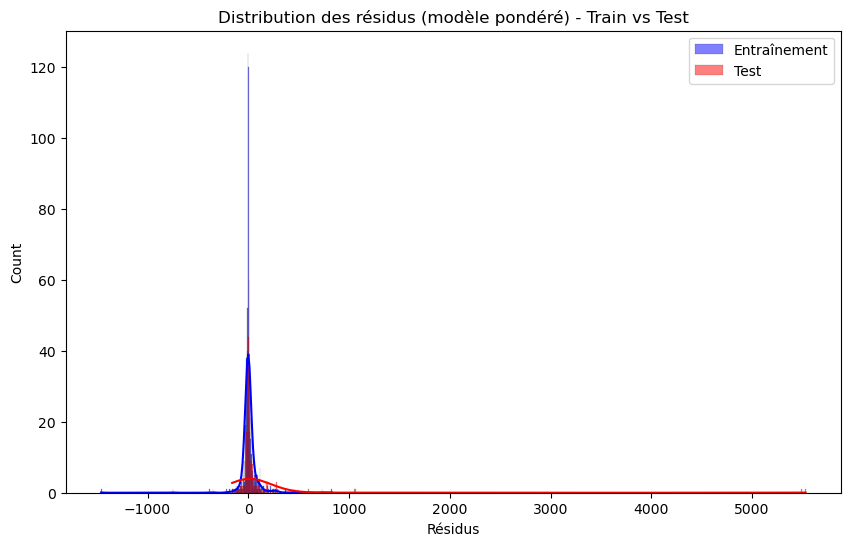

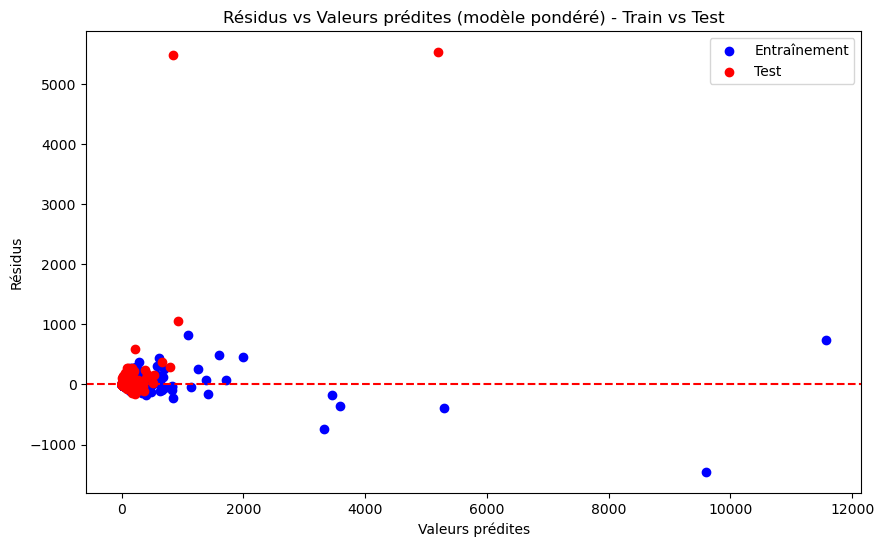

Statistiques des résidus sur l'entraînement (modèle pondéré) :
count     751.000000
mean        7.709567
std        96.363742
min     -1460.615742
25%        -9.829320
50%        -0.479584
75%        11.379061
max       829.103447
Name: TotalGHGEmissions, dtype: float64

Statistiques des résidus sur le test (modèle pondéré) :
count     188.000000
mean       88.423894
std       574.979263
min      -160.272243
25%        -6.950320
50%         2.176793
75%        25.544139
max      5531.731621
Name: TotalGHGEmissions, dtype: float64


In [1867]:
# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_train_weighted, kde=True, color="blue", label="Entraînement")
sns.histplot(residus_test_weighted, kde=True, color="red", label="Test")
plt.title("Distribution des résidus (modèle pondéré) - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_weighted, residus_train_weighted, color="blue", label="Entraînement")
plt.scatter(y_pred_test_weighted, residus_test_weighted, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites (modèle pondéré) - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Statistiques des résidus
print("Statistiques des résidus sur l'entraînement (modèle pondéré) :")
print(residus_train_weighted.describe())

print("\nStatistiques des résidus sur le test (modèle pondéré) :")
print(residus_test_weighted.describe())

Statistiques des résidus par tranche (Train, modèle pondéré) :
                        mean         std      median  count
Tranche                                                   
[0-48.13]         -4.278576   11.767237   -1.806704    376
[48.13-173.67]     4.409765   33.263181    4.965500    225
[173.67-313.3]    27.430089   76.139930   23.964371     75
[313.3-2005.55]   86.386827  161.621935   63.750920     67
2005.55+        -179.842724  729.959214 -265.356982      8

Statistiques des résidus par tranche (Test, modèle pondéré) :
                         mean         std       median  count
Tranche                                                     
[0-48.13]          -4.541320   21.078692    -0.731128     94
[48.13-173.67]      2.883892   49.162656     3.057973     56
[173.67-313.3]     71.274554   81.285560    84.952773     19
[313.3-2005.55]   265.611937  248.204218   239.973578     17
2005.55+         5509.729441   31.115782  5509.729441      2


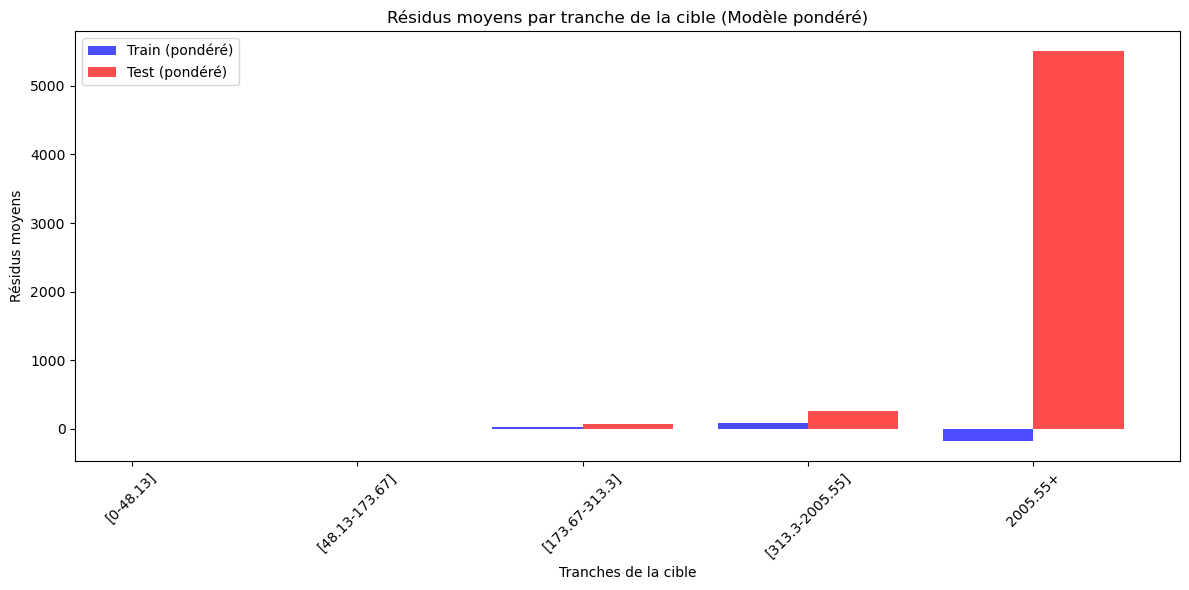

In [1868]:
# Analyse par tranche
residus_train_df_weighted = pd.DataFrame({'Cible': y_train, 'Résidus': residus_train_weighted, 'Tranche': y_train_bins})
residus_test_df_weighted = pd.DataFrame({'Cible': y_test, 'Résidus': residus_test_weighted, 'Tranche': y_test_bins})

stat_residus_train_weighted = residus_train_df_weighted.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test_weighted = residus_test_df_weighted.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train, modèle pondéré) :\n", stat_residus_train_weighted)
print("\nStatistiques des résidus par tranche (Test, modèle pondéré) :\n", stat_residus_test_weighted)

# Visualiser les résidus moyens par tranche pour le modèle pondéré
plt.figure(figsize=(12, 6))
stat_residus_train_weighted['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train (pondéré)', width=0.4, position=1)
stat_residus_test_weighted['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test (pondéré)', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible (Modèle pondéré)")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

L'ajustement des poids visait à améliorer les prédictions pour les valeurs élevées sous-représentées dans le jeu de données, en leur accordant une importance accrue lors de l'entraînement du modèle.<br>
Résultats observés :<br>
Surapprentissage significatif : Le R² sur l'ensemble d'entraînement a augmenté considérablement (jusqu'à 0.98), tandis que celui sur l'ensemble de test a diminué (jusqu'à 0.61).<br>
Dégradation des performances de test : Le RMSE et le MAE sur l'ensemble de test ont augmenté de manière significative.
Légère amélioration du MAPE : Une diminution marginale du MAPE a été observée sur l'ensemble de test, mais au détriment d'autres métriques importantes.<br>
Implications :<br>
L'approche de pondération a conduit le modèle à se concentrer excessivement sur les valeurs élevées, compromettant sa capacité à généraliser sur l'ensemble des données.<br>
La complexité accrue du modèle n'a pas permis de capturer efficacement la structure sous-jacente des données pour toutes les gammes de valeurs.<br>
Conclusion finale :<br>
L'ajustement des poids n'a pas apporté l'amélioration escomptée au modèle XGBoost dans ce cas particulier. Au contraire, il a introduit un biais significatif et a dégradé les performances globales du modèle sur l'ensemble de test.

# Conclusion sur le modèle final

**Performance globale du modèle**

Le modèle XGBoost entraîné présente des performances globalement satisfaisantes avec un bon équilibre entre biais et variance.<br> 

R² moyen (test) : 0.836, indiquant que 83.6% de la variance des émissions de gaz à effet de serre est expliquée par le modèle.<br> 
MAE moyen (test) : 77.93.<br> 
RMSE moyen (test) : 338.82.<br> 
MAPE moyen (test) : 0.62.<br> 
Ces résultats démontrent que le modèle est capable de capturer efficacement les tendances principales des émissions tout en conservant une bonne robustesse.<br> 

Les hyperparamètres optimisés permettent d’assurer une complexité modérée du modèle :<br> 

max_depth = 3 : Faible profondeur des arbres, limitant la complexité pour éviter l’overfitting.<br> 
n_estimators = 100 : Nombre modéré d’arbres, équilibrant biais et variance.<br> 
learning_rate = 0.3 : Taux d’apprentissage relativement rapide, permettant une convergence efficace.<br> 
min_child_weight = 3 : Empêche la création de feuilles trop petites, réduisant la sensibilité au bruit.<br> 
reg_alpha = 0.5 et reg_lambda = 0.1 : Régularisation L1 et L2 modérées pour éviter le surajustement.<br> 
subsample = 0.7 et colsample_bytree = 0.8 : Techniques de sous-échantillonnage pour introduire de la variance et améliorer la généralisation.<br> 
Globalement, ces choix permettent d’avoir un modèle suffisamment flexible pour capturer les relations complexes dans les données tout en évitant un surajustement excessif.<br> 

**Problèmes rencontrés et ajustements** : Prédiction des valeurs extrêmes<br>

Les valeurs extrêmes restent difficiles à prédire, notamment celles supérieures à 2005.55. Des tentatives de rééquilibrage via la pondération des observations ont été effectuées, mais elles ont conduit à une dégradation des performances générales :

Diminution du R² test de 0.836 à 0.61
Augmentation du RMSE (580.22 contre 338.82 initialement)
Cela indique que la prise en compte forcée des valeurs extrêmes perturbe le modèle plus qu’elle ne l’améliore.

Le modèle XGBoost obtenu est globalement performant et exploitable, expliquant efficacement les tendances générales des émissions de gaz à effet de serre. Les performances sont bonnes sur la majorité des données, bien que la prédiction des valeurs extrêmes reste un défi. L’approche la plus pragmatique consiste désormais à valider son utilité métier et à l’interpréter pour en tirer des insights exploitables.

# Analyse de l'importance des features

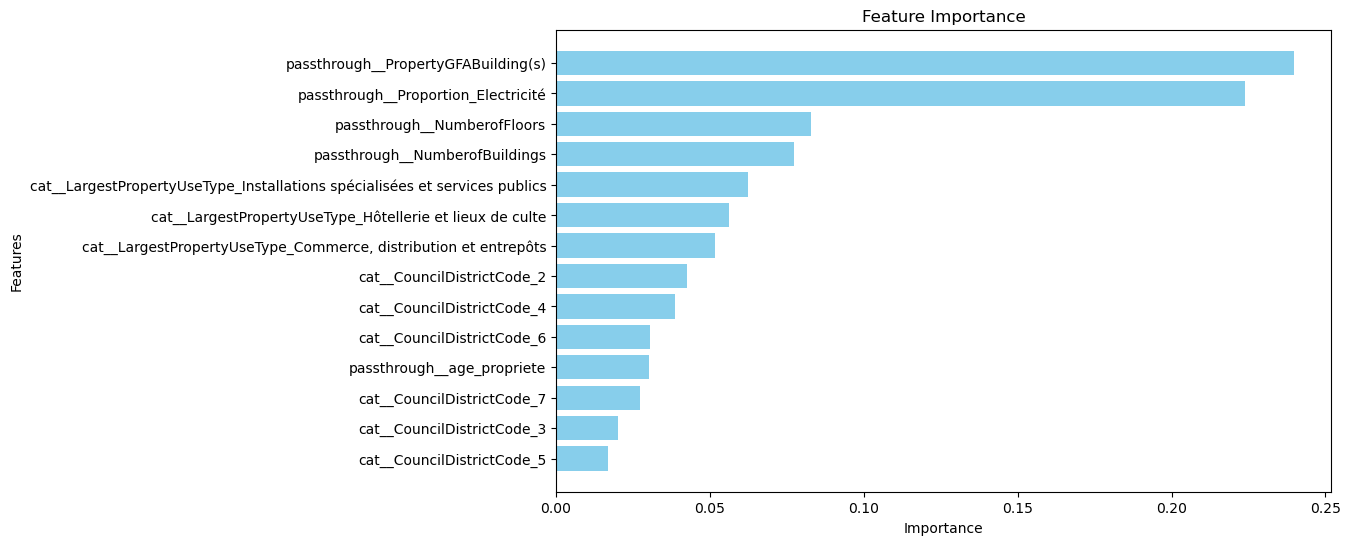

In [1909]:
# Créer un modèle d'encodage isolé pour extraire les noms des colonnes
preprocessing_fitted = preprocessing_v20.fit(X_train)

# Récupérer les noms des colonnes après transformation
column_names = preprocessing_fitted.get_feature_names_out()

# Récupérer les importances des caractéristiques du modèle entraîné
feature_importances = best_model_xgb_v2.named_steps['model'].regressor_.feature_importances_

# Associer les noms des colonnes aux importances
feature_importances_df = pd.DataFrame({
    'Feature': column_names,
    'Importance': feature_importances
})

# Trier les colonnes par ordre d'importance décroissant
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverser l'axe pour avoir les plus importantes en haut
plt.show()

In [1912]:
feature_importances_df

Feature  Importance
11                passthrough__PropertyGFABuilding(s)    0.239834
9                 passthrough__Proportion_Electricité    0.223942
12                        passthrough__NumberofFloors    0.082786
13                     passthrough__NumberofBuildings    0.077321
2   cat__LargestPropertyUseType_Installations spéc...    0.062395
1   cat__LargestPropertyUseType_Hôtellerie et lieu...    0.056197
0   cat__LargestPropertyUseType_Commerce, distribu...    0.051518
3                          cat__CouncilDistrictCode_2    0.042565
5                          cat__CouncilDistrictCode_4    0.038619
7                          cat__CouncilDistrictCode_6    0.030567
10                         passthrough__age_propriete    0.030068
8                          cat__CouncilDistrictCode_7    0.027193
4                          cat__CouncilDistrictCode_3    0.020194
6                          cat__CouncilDistrictCode_5    0.016801

## Features numériques

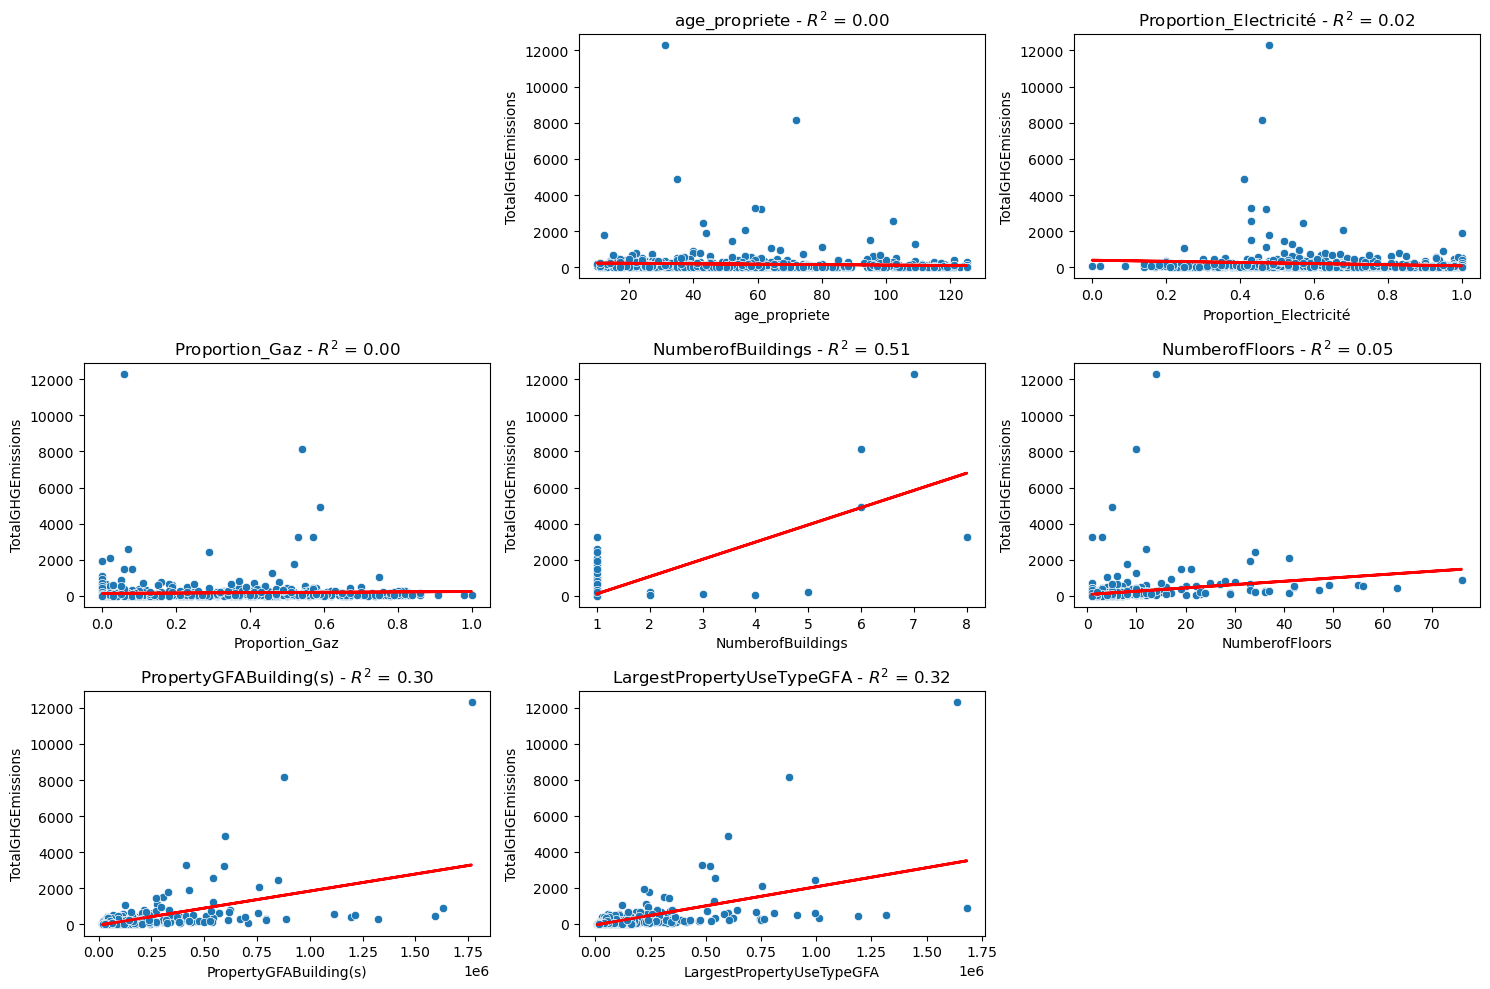

In [1919]:
# Sélectionner uniquement les colonnes numériques de X_train
X_train_numeric = X_train.select_dtypes(include=['number'])

# Créer la figure avec une taille définie
plt.figure(figsize=(15, 10))

# Affichage des nuages de points et des droites de régression
for i, col in enumerate(X_train_numeric.columns):
    plt.subplot(3, 3, i+2)  # 3 lignes et 3 colonnes de graphiques (7 graphiques au total)
    
    # Nuage de points
    sns.scatterplot(x=X_train_numeric[col], y=y_train)
    
    # Ajustement d'une droite de régression
    model = LinearRegression()
    model.fit(X_train_numeric[[col]], y_train)
    y_pred = model.predict(X_train_numeric[[col]])
    
    # Calcul du R^2
    r2 = r2_score(y_train, y_pred)
    
    # Tracer la droite de régression
    plt.plot(X_train_numeric[col], y_pred, color='red', linewidth=2)
    
    # Titre avec le R²
    plt.title(f"{col} - $R^2$ = {r2:.2f}")
    
# Ajuster l'affichage pour ne pas chevaucher
plt.tight_layout()
plt.show()

In [1921]:
# Calcul de la corrélation de Spearman entre chaque variable de X_train et y_train
correlations = []
for col in X_train_numeric.columns:
    corr, _ = spearmanr(X_train_numeric[col], y_train)
    correlations.append((col, corr))

# Créer un DataFrame pour afficher les résultats
corr_df = pd.DataFrame(correlations, columns=['Feature', 'Spearman Correlation'])
corr_df = corr_df.sort_values(by='Spearman Correlation', ascending=False)

# Afficher les résultats
print(corr_df)

                     Feature  Spearman Correlation
5     PropertyGFABuilding(s)              0.612870
6  LargestPropertyUseTypeGFA              0.601197
4             NumberofFloors              0.382731
2             Proportion_Gaz              0.371409
3          NumberofBuildings              0.106922
0              age_propriete             -0.157971
1     Proportion_Electricité             -0.460321


**PropertyGFABuilding(s) (Spearman: 0.61, Importance: 0.24)**<br>
La surface brute du bâtiment (PropertyGFABuilding(s)) présente une corrélation positive forte avec la cible (0.61), indiquant que des bâtiments plus grands ont tendance à avoir plus d'émissions de gaz à effet de serre. Cette variable a également une importance relativement élevée (0.24), ce qui montre qu'elle joue un rôle essentiel dans le modèle pour prédire les émissions de gaz à effet de serre. Plus la superficie du bâtiment est grande, plus l'impact sur les émissions est important, ce qui est cohérent avec le comportement observé dans la corrélation.

**Proportion d'Électricité (Spearman: -0.46, Importance: 0.22)**<br>
La variable "Proportion d'Électricité" montre une corrélation négative modérée avec la cible (-0.46), ce qui suggère qu'une plus grande proportion d'électricité dans la consommation énergétique est associée à une diminution des émissions de gaz à effet de serre. Dans le modèle, cette variable est la plus importante avec une valeur d'importance de 0.22. Cela indique qu'elle a une influence significative sur la prédiction des émissions de gaz à effet de serre, et que sa capacité à réduire la cible (diminution des émissions) est bien capturée par le modèle.

**NumberofFloors (Spearman: 0.38, Importance: 0.08))**<br>
Le nombre d'étages dans le bâtiment (NumberofFloors) présente une corrélation positive modérée avec la cible (0.38), suggérant que les bâtiments avec plus d'étages génèrent plus d'émissions. Avec une importance de 0.08, cette variable contribue à la prédiction, mais son rôle reste relativement modéré comparé aux autres variables. Elle semble jouer un rôle important dans les bâtiments de plus grande taille.<br>

**NumberofBuildings (Spearman: 0.11, Importance: 0.08)**<br>
Le nombre de bâtiments (NumberofBuildings) a une corrélation positive faible avec la cible (0.11), ce qui suggère que plus de bâtiments pourrait légèrement augmenter les émissions de gaz à effet de serre. Cependant, son importance très faible (0.08) montre que cette variable est moins significative pour la prédiction du modèle.

**Age de la Propriété (Spearman: -0.16, Importance: 0.03)**<br>
L'âge de la propriété (age_propriete) présente une corrélation négative faible avec la cible (-0.16), ce qui pourrait indiquer que les bâtiments plus anciens ont potentiellement des émissions de gaz à effet de serre moins élevées, bien que cet effet soit faible. Avec une importance de 0.03, cette variable n'a qu'un impact minimal sur le modèle.

**En résumé** :<br>
Les variables qui ont une forte importance dans le modèle, comme la Proportion d'Électricité et la Surface brute du bâtiment (PropertyGFABuilding(s)), sont également celles qui ont des corrélations plus marquées avec la cible. Par exemple, une plus grande proportion d'électricité dans la consommation énergétique est associée à une réduction des émissions, ce qui est bien capturé par le modèle.<br>
À l'inverse, des variables comme Age de la Propriété ou NumberofBuildings ont une influence moins significative sur le modèle, ce qui est reflété par leurs faibles importances et corrélations faibles avec la cible.

## Features catégorielles

In [1922]:
# Créer une copie de X_train avec les variables catégorielles existantes
X_train_cat = X_train[['CouncilDistrictCode', 'LargestPropertyUseType']].copy()

In [1923]:
# Grouper les données par 'LargestPropertyUseType' et afficher les statistiques descriptives de 'y_train'
y_train_by_district= y_train.groupby(X_train_cat['CouncilDistrictCode'], observed=True).describe()

# Afficher les résultats
y_train_by_district

count        mean          std   min     25%     50%  \
CouncilDistrictCode                                                         
1                     46.0   76.661522    80.432832  3.71  24.235  43.205   
2                    180.0   59.939111    79.724652  1.06  12.365  30.025   
3                     75.0  395.551333  1550.218758  2.19  27.225  64.880   
4                     82.0  203.246829   913.686435  0.81  16.520  45.950   
5                     58.0  166.270862   440.968586  1.59  21.085  49.320   
6                     51.0   74.105686    94.917453  1.12  20.295  34.900   
7                    259.0  198.136718   350.196307  3.04  29.615  72.780   

                          75%       max  
CouncilDistrictCode                      
1                    101.1450    352.77  
2                     74.6175    455.39  
3                    159.9900  12307.16  
4                    126.2525   8145.52  
5                    151.2950   3278.11  
6                     71.8800    384.27  
7                    214.9700   2573.75

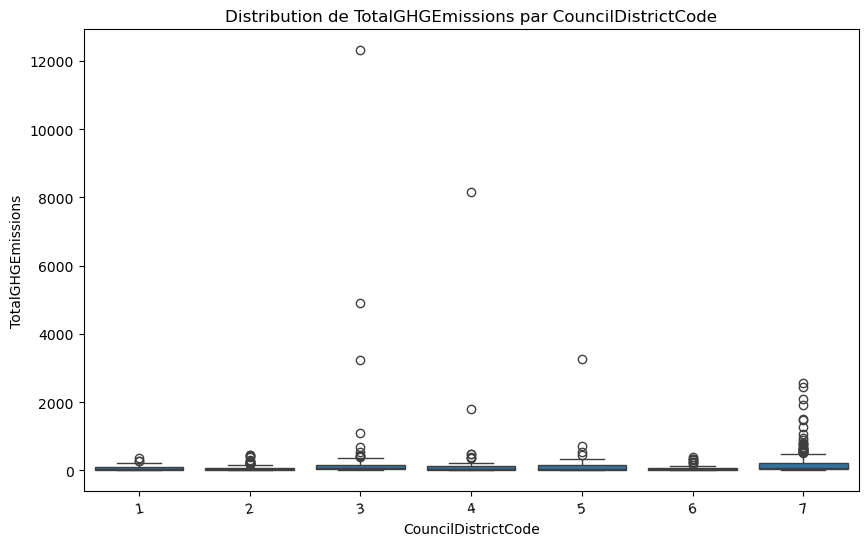

In [1915]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train_cat['CouncilDistrictCode'], y=y_train)
plt.title('Distribution de TotalGHGEmissions par CouncilDistrictCode')
plt.xticks(rotation=10)
plt.show()

**Des émissions faibles et concentrées**<br>
Le district 2 présente la moyenne d'émissions la plus faible (60) parmi tous les districts, accompagnée d'un écart-type relativement faible (80). Cela indique que **les émissions y sont non seulement faibles, mais aussi réparties de manière plus homogène.**
Ce profil unique différencie ce district des autres, en particulier des districts comme le 3  ou le 4 , où les émissions sont beaucoup plus élevées et plus dispersées.

**Une variable clé pour expliquer la variance**<br>
Les algorithmes d'apprentissage machine attribuent une forte importance aux variables qui permettent de mieux segmenter et expliquer la variance de la cible (les émissions). Le contraste clair entre les faibles émissions du district 2 et les niveaux plus élevés dans d'autres districts en fait un point de segmentation précieux.

In [1924]:
# Grouper les données par 'LargestPropertyUseType' et afficher les statistiques descriptives de 'y_train'
y_train_by_category = y_train.groupby(X_train_cat['LargestPropertyUseType'], observed=True).describe()

# Afficher les résultats
y_train_by_category

count        mean  \
LargestPropertyUseType                                              
Bureaux et services financiers                  343.0  117.096822   
Commerce, distribution et entrepôts             246.0   85.034309   
Hôtellerie et lieux de culte                    109.0  236.851927   
Installations spécialisées et services publics   53.0  726.208679   

                                                        std   min      25%  \
LargestPropertyUseType                                                       
Bureaux et services financiers                   233.134258  2.52  19.9500   
Commerce, distribution et entrepôts              114.961063  0.81  13.7475   
Hôtellerie et lieux de culte                     447.977067  1.85  31.7400   
Installations spécialisées et services publics  2121.783012  4.48  43.9700   

                                                  50%       75%       max  
LargestPropertyUseType                                                     
Bureaux et services financiers                  46.85  128.5700   3238.24  
Commerce, distribution et entrepôts             37.91   99.9225    723.47  
Hôtellerie et lieux de culte                    68.97  228.4000   2573.75  
Installations spécialisées et services publics  72.88  222.7800  12307.16

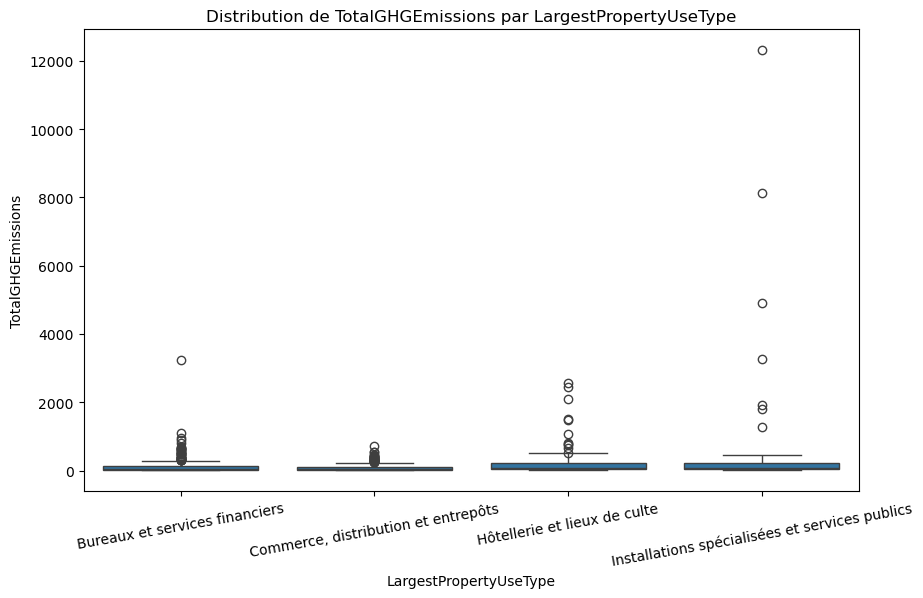

In [1917]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train_cat['LargestPropertyUseType'], y=y_train)
plt.title('Distribution de TotalGHGEmissions par LargestPropertyUseType')
plt.xticks(rotation=10)
plt.show()

Les propriétés de type "Installations spécialisées et services publics" se distinguent par des caractéristiques spécifiques qui expliquent leur présence parmi les features importantes :

- **Fortes émissions moyennes** : Les émissions moyennes pour ce type de propriété sont de 726.2, ce qui est significativement supérieur à celles des autres types de propriétés comme "Bureaux et services financiers" (117.1) ou "Commerce, distribution et entrepôts" (85).

- **Disparité des émissions** : La dispersion des émissions est relativement forte pour ce type de propriété, avec un écart type de 2121.8. En comparaison, d'autres types de propriétés comme "Commerce, distribution et entrepôts" présentent une variabilité bien plus faible (115).

- **Valeur maximum** : La valeur maximum des émissions pour ce type de bâtiment est bien plus élevée que pour les autres types (12307) et on peut voir la présence d'outliers.

Ces caractéristiques font des propriétés "Installations spécialisées et services publics" un indicateur clé pour le modèle, car elles capturent une portion significative de la variabilité des émissions.

# Conclusion sur l'importance des variables dans le modèle

En conclusion, notre analyse de l'importance des variables montre que certaines caractéristiques spécifiques, telles que la proportion d'électricité dans la consommation énergétique, la superficie des bâtiments, et le type d'usage des propriétés, ont une influence significative sur les émissions de gaz à effet de serre. Le District 2, avec ses émissions relativement faibles et homogènes, ainsi que le type "Installations spécialisées et services publics", émerge comme un facteur clé expliquant cette variabilité.

# Interprétation du modèle avec SHAP

In [1935]:
# Extraire le modèle XGBoost du TransformedTargetRegressor
xgb_model = best_model_xgb_v1.named_steps['model'].regressor_

# Appliquer les transformations de prétraitement sur les données d'entraînement et de test
X_train_preprocessed = best_model_xgb_v1.named_steps['preprocessing'].transform(X_train)
X_test_preprocessed = best_model_xgb_v1.named_steps['preprocessing'].transform(X_test)

# Créer l'explainer SHAP pour le modèle XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Calcul des valeurs SHAP pour les données de test
shap_values = explainer.shap_values(X_test_preprocessed)

# Obtenir les noms des caractéristiques transformées
feature_names = best_model_xgb_v1.named_steps['preprocessing'].get_feature_names_out()

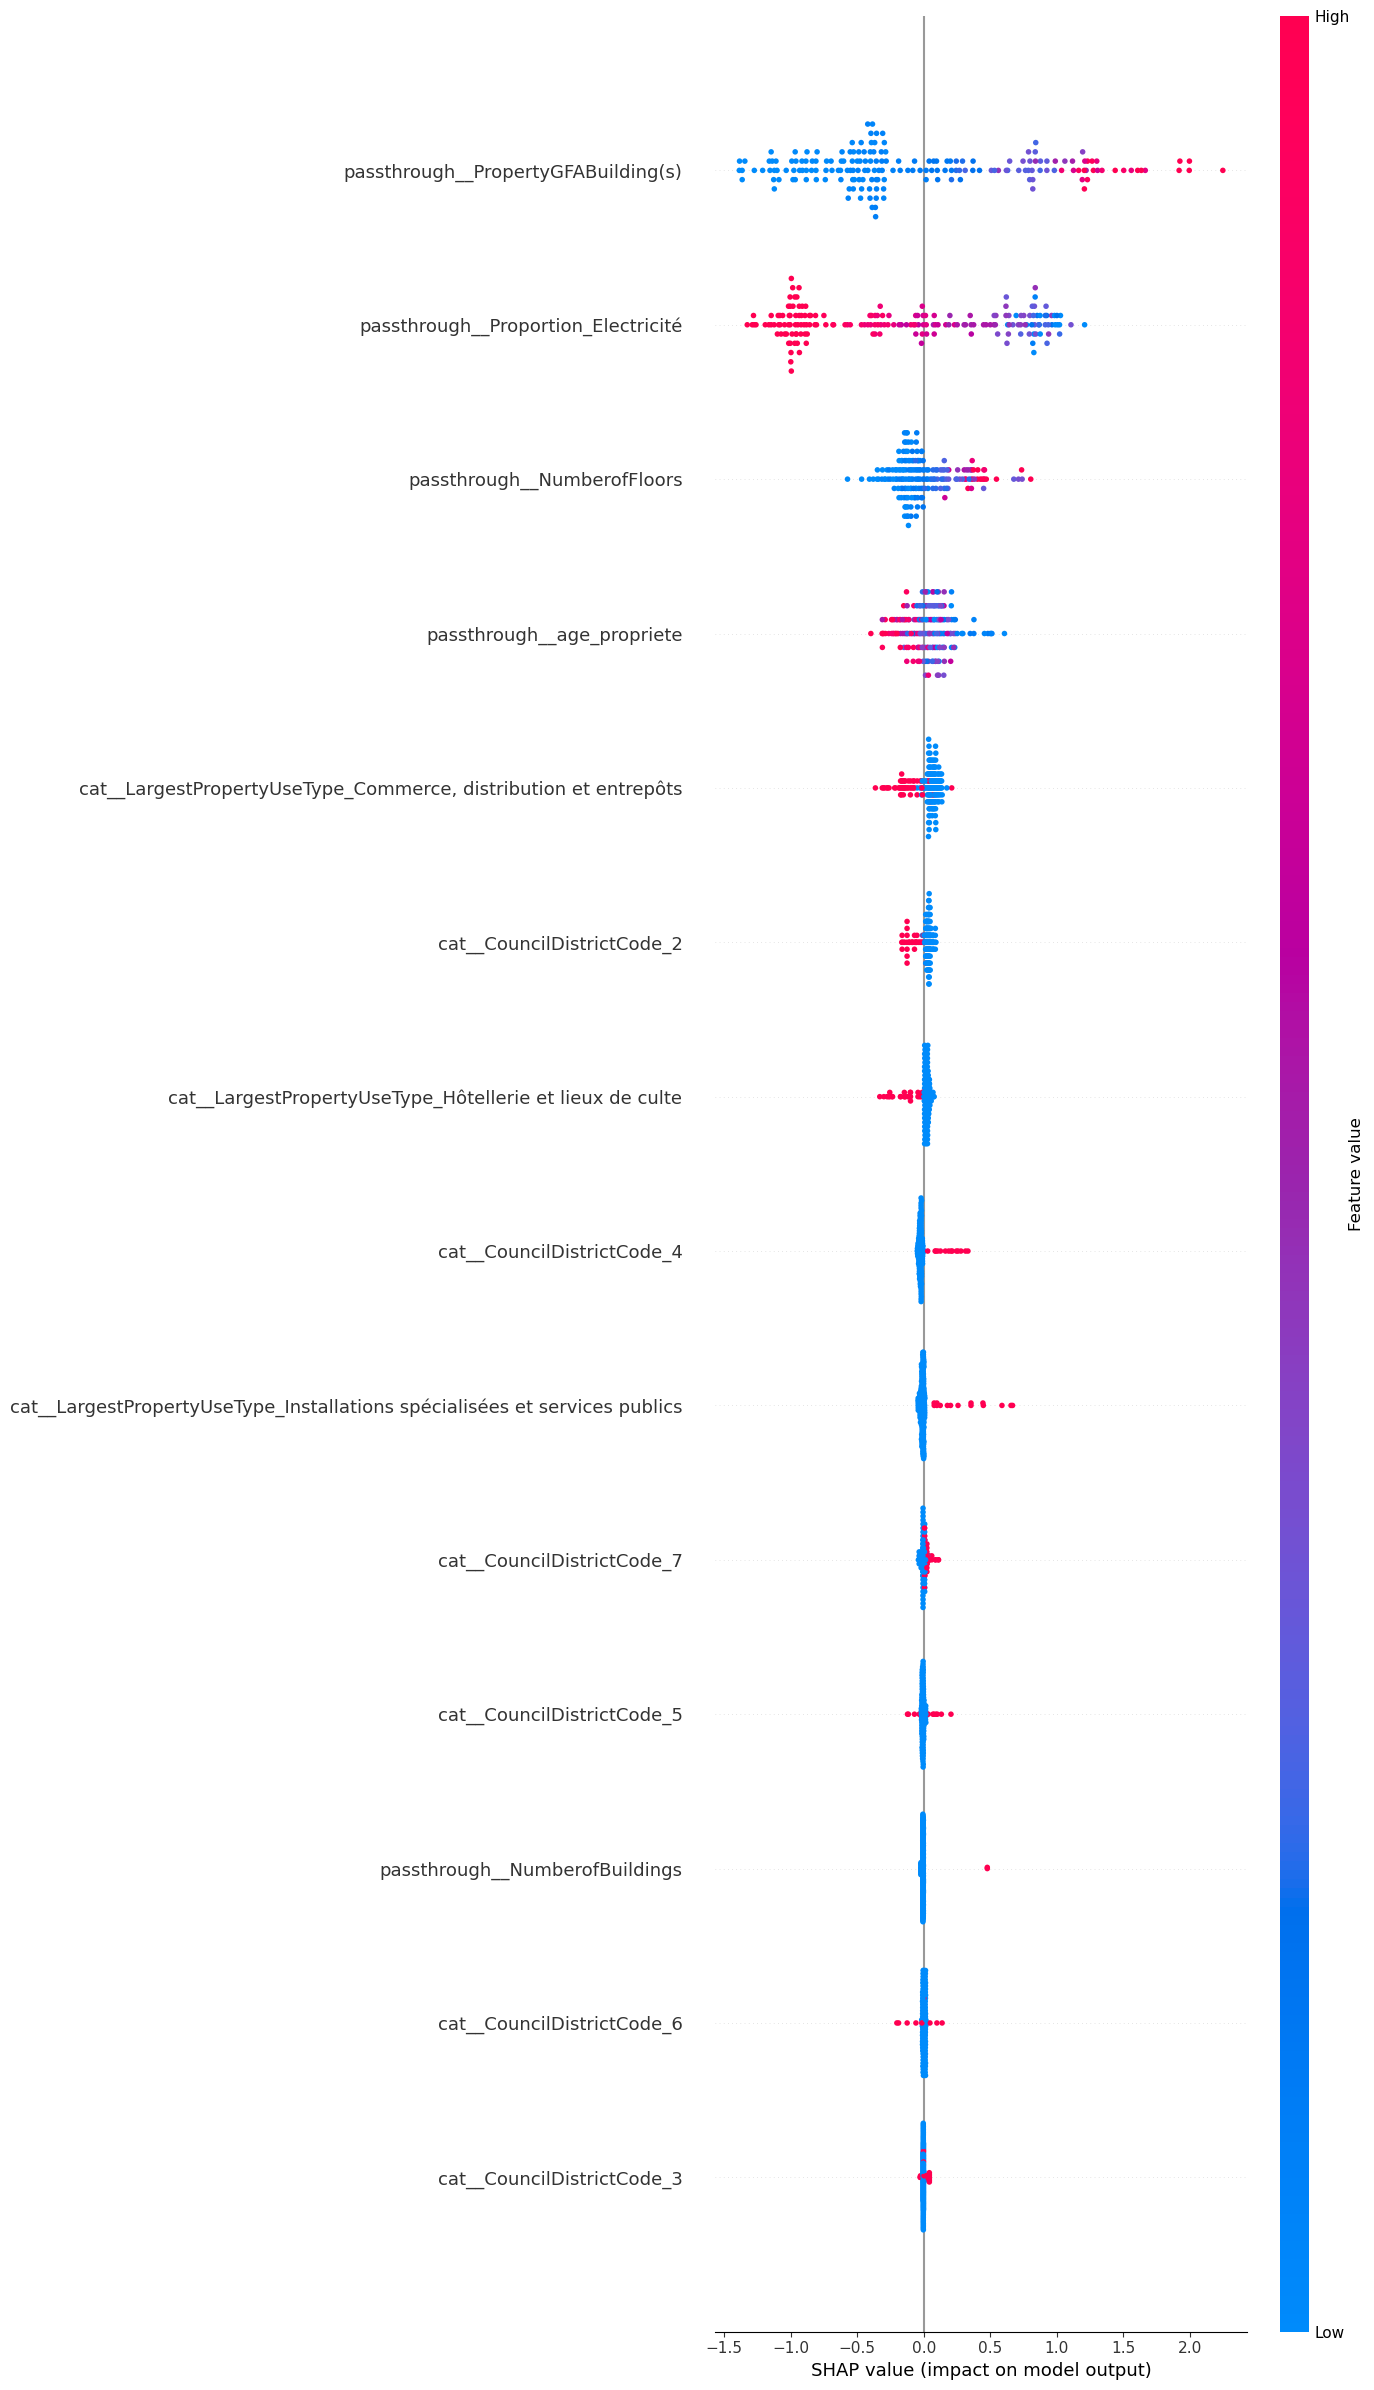

In [1936]:
# Visualiser les résultats avec un summary plot
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names, plot_size=(14, 24), max_display=20)

Axe horizontal : Impact sur la prédiction (négatif à gauche, positif à droite).<br>
Couleur : Valeur de la feature (bleu = bas, rouge = élevé).<br>
Position verticale : Importance globale de la feature (plus haut = plus important).<br>

- **PropertyGFABuilding(s)**<br>
Points bleus à gauche : Les petits bâtiments ont tendance à diminuer la prédiction.<br>
Points rouges à droite : Les grands bâtiments ont tendance à augmenter la prédiction.<br>
Cohérent car on a vu que des bâtiments plus grands ont tendance à avoir plus d'émissions de gaz à effet de serre.

- **Proportion_Electricité**<br>
Points rouges à gauche : Une proportion élevée d'électricité tend à diminuer la prédiction.<br>
Points bleus à droite : Une faible proportion d'électricité tend à augmenter la prédiction.<br>
Cohérent car on a vu qu'une plus grande proportion d'électricité dans la consommation énergétique est associée à une diminution des émissions de gaz à effet de serre.<br>

- **NumberofFloors**<br>
Points bleus à gauche : Les bâtiments avec moins d'étages ont tendance à diminuer la prédiction.<br>
Points rouges à droite : Les bâtiments avec plus d'étages ont tendance à augmenter la prédiction.<br>
Cohérent car on a vu que les bâtiments avec plus d'étages génèrent plus d'émissions.

- **age_propriété**<br>
Points rouges à gauche : Les propriétés plus vieilles tendent à diminuer la prédiction.<br>
Points bleus à droite : Les propriétés plus vieilles tendent à augmenter la prédiction.<br>
Cohérent car les bâtiments plus vieux ont tendance à être plus petits et donc par conséquent à émettre moins de co2.

- **Commerce, distribution et entrepôts**<br>
Points rouges à gauche : Les bâtiments dont l'usage principal est commerce etc tendent à diminuer la prédiction.<br>
Points bleus à droite :Les bâtiments dont l'usage principal n'est pas commerce etc tendent à augmenter la prédiction.<br>
Cohérent car on a vu que ce type de propriété présente des émissions moyennes relativement faibles.

- **Disctrict 2, hôtellerie et lieu de culte**<br>
Points rouges à gauche : Ces bâtiments tendent à diminuer la prédiction.<br>
Points bleus à droite : Quand ce ne sont pas ces bâtiments cela a tendance à augmenter la prédiction.<br>
Cohérents car on a vu que les batiments du district 2 émettent moins de co2. De même pour les bâtiments de l'hôtellerie et lieu de culte.

## Graphiques de dépendance

In [1937]:
feature_names

array(['cat__LargestPropertyUseType_Commerce, distribution et entrepôts',
       'cat__LargestPropertyUseType_Hôtellerie et lieux de culte',
       'cat__LargestPropertyUseType_Installations spécialisées et services publics',
       'cat__CouncilDistrictCode_2', 'cat__CouncilDistrictCode_3',
       'cat__CouncilDistrictCode_4', 'cat__CouncilDistrictCode_5',
       'cat__CouncilDistrictCode_6', 'cat__CouncilDistrictCode_7',
       'passthrough__Proportion_Electricité',
       'passthrough__age_propriete',
       'passthrough__PropertyGFABuilding(s)',
       'passthrough__NumberofFloors', 'passthrough__NumberofBuildings'],
      dtype=object)

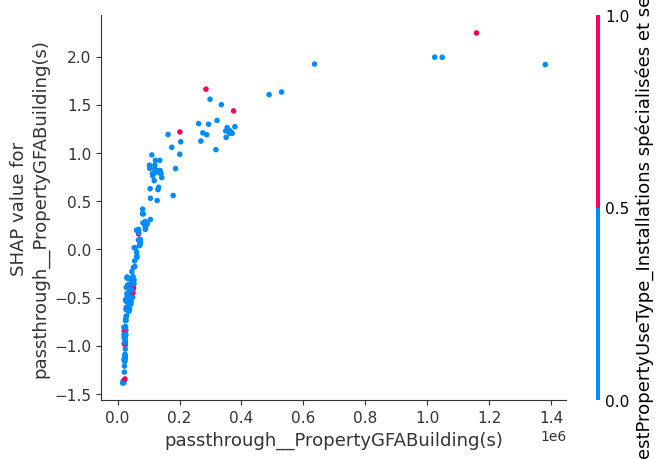

In [1938]:
shap.dependence_plot('passthrough__PropertyGFABuilding(s)', shap_values, X_test_preprocessed, feature_names=feature_names)

Le graphique montre que l’augmentation de la taille des bâtiments entraîne une hausse des émissions de CO₂, de manière non linéaire.

- Hausse des émissions avec la taille<br>
Le nuage de points suit une tendance croissante : plus la taille de la propriété augmente, plus les émissions de CO₂ augmentent.
- Répartition des catégories d’usage<br>
Les points rouges (installations spécialisées et services publics) suivent la même tendance que les autres bâtiments (points bleus).<br>
Cela signifie que ces installations n’ont pas un comportement très différent des autres types de bâtiments en termes d’impact CO₂.
Quelques points rouges sont situés :<br>
En bas à gauche (petites installations avec faibles émissions).<br>
Au centre (tailles moyennes avec émissions élevées).<br>
En haut à droite (grande installation avec très fortes émissions).<br>

Conclusion
Bien que les installations spécialisées et services publics présentent des variations d’émissions, leur impact s’aligne globalement sur la tendance des autres bâtiments : plus la taille augmente, plus les émissions de CO₂ croissent.

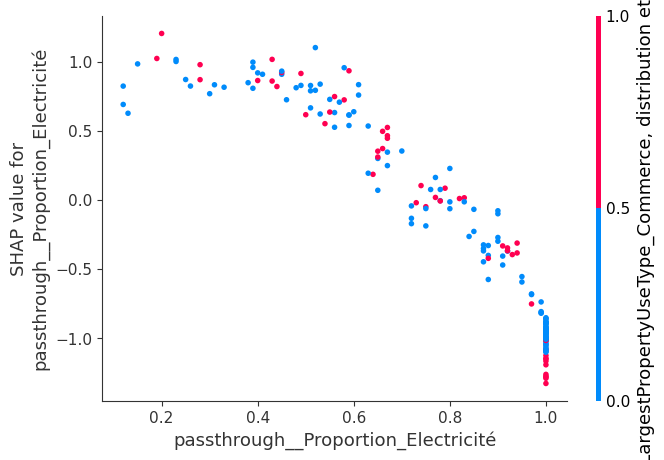

In [1939]:
shap.dependence_plot('passthrough__Proportion_Electricité', shap_values, X_test_preprocessed, feature_names=feature_names)

Ce graphique de dépendance SHAP illustre la relation entre la proportion d’électricité utilisée (passthrough__Proportion_Electricité) et son impact sur les émissions de CO₂. La couleur des points représente l’usage principal du bâtiment, notamment le secteur "Commerce, distribution et entrepôts".

- Effet de l’augmentation de la proportion d’électricité : Lorsque la part d’électricité dans la consommation énergétique augmente (de gauche à droite), l’impact SHAP diminue. Cela indique une réduction des émissions de CO₂, suggérant que les bâtiments ayant une proportion d'utilisation d'électricité plus élevée ont tendance à être moins émetteurs de gaz à effet de serre.
- Répartition des points colorés : Les points sont répartis de manière relativement uniforme tout au long de la courbe.Les bâtiments du secteur "Commerce, distribution et entrepôts" suivent cette tendance, sans comportement notablement différent des autres types de bâtiments.

Conclusion<br>
Ce graphique met en évidence une relation inverse entre la proportion d’électricité utilisée et les émissions de CO₂, soulignant le rôle clé de la source d’énergie dans la réduction de l’empreinte carbone des bâtiments.

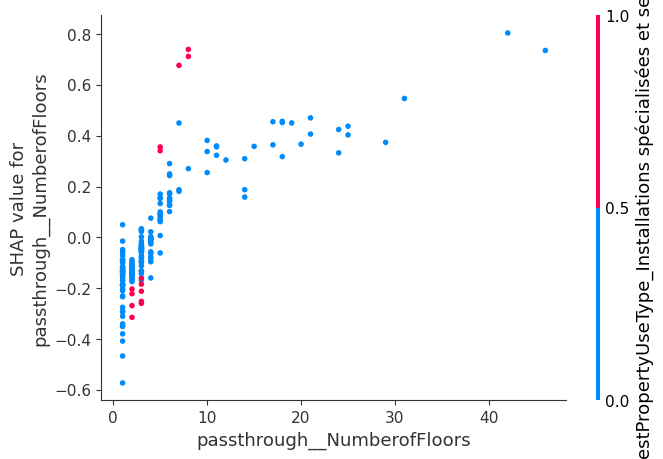

In [1940]:
shap.dependence_plot('passthrough__NumberofFloors', shap_values, X_test_preprocessed, feature_names=feature_names)

Ce graphique de dépendance SHAP illustre la relation entre le nombre d'étages d'un bâtiment et son impact sur les émissions de CO₂. La couleur des points représente le type d'usage principal du bâtiment, allant du bleu (type différent d'installations spécialisées et services publics) au rouge (Installations spécialisées et services publics).

Le graphique montre une progression significative des émissions en fonction du nombre d’étages :
- Chaque trait vertical (correspondant à un nombre d'étages donné) commence plus haut que le précédent.
- Plus le nombre d'étages augmente, plus l'impact sur les émissions de CO₂ est important.<br>

Les bâtiments "Installations spécialisées et services publics" (en rouge) sont principalement présents dans les petits bâtiments à faibles émissions, mais dépassent les autres types de bâtiments autour de 10 étages.
Au-delà de 10 étages, il n’y a plus de bâtiments de ce type dans l’échantillon.

Conclusion<br>
Les bâtiments plus hauts contribuent davantage aux émissions de CO₂, ce qui s’explique par des besoins énergétiques accrus (chauffage, climatisation, éclairage, équipements). Les Installations spécialisées et services publics ont un comportement différencié, avec une influence plus marquée sur les émissions autour de 10 étages.

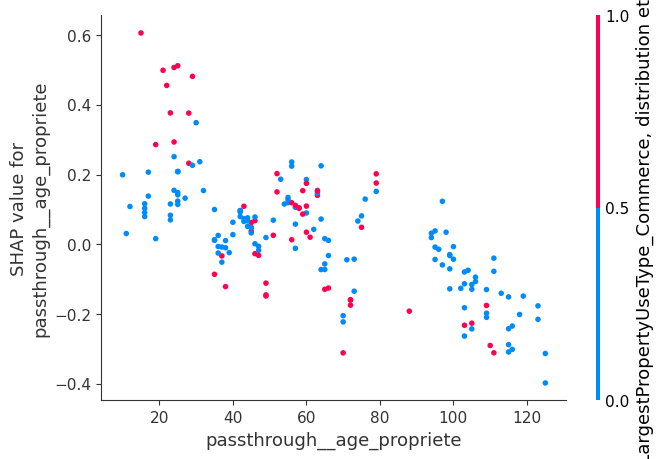

In [1941]:
shap.dependence_plot('passthrough__age_propriete', shap_values, X_test_preprocessed, feature_names=feature_names)

Ce graphique de dépendance SHAP illustre la relation entre l'âge d'une propriété et son impact sur les émissions de CO₂. La couleur des points représente l’usage principal du bâtiment, notamment le secteur "Commerce, distribution et entrepôts".

- Le nuage de points suit une dynamique descendante, débutant en haut à gauche et se terminant en bas à droite. Cette configuration suggère que plus une propriété est ancienne, plus ses émissions de CO₂ ont tendance à diminuer.
- Les points sont répartis de manière relativement uniforme tout au long de la courbe.Les bâtiments du secteur "Commerce, distribution et entrepôts" suivent cette tendance, sans comportement notablement différent des autres types de bâtiments.

Le graphique met en évidence une corrélation négative entre l’âge du bâtiment et ses émissions de CO₂. Les bâtiments du secteur "Commerce, distribution et entrepôts" ne présentent pas de différence significative avec le reste de l’échantillon, confirmant une tendance générale de réduction des émissions.

# Conclusion sur l'analyse avec SHAP

L’analyse des graphiques de dépendance SHAP permet de mieux comprendre les facteurs influençant les prédictions du modèle sur les émissions de CO₂ des bâtiments :

Facteurs influençant fortement les prédictions<br>

- Taille et hauteur des bâtiments : Plus un bâtiment est grand et comporte d’étages, plus la prédiction des émissions de CO₂ augmente. Cette relation est non linéaire, avec une intensification marquée pour les grands bâtiments.
- Proportion d’électricité utilisée : Une proportion plus élevée d’électricité réduit la prédiction des émissions, confirmant que les sources d’énergie impactent directement les résultats du modèle.

Facteurs ayant un effet modérateur sur les prédictions<br>

- Âge des bâtiments : Les bâtiments plus anciens ont tendance à être associés à des émissions plus faibles, influençant négativement la prédiction du modèle.
- Usage principal du bâtiment : Certains types de bâtiments, comme ceux du secteur "Commerce, distribution et entrepôts", ainsi que l’hôtellerie et les lieux de culte, réduisent légèrement la prédiction du modèle.
- District: Les bâtiments du district 2 ont tendance à réduire la prédiction du modèle.

Robustesse et cohérence du modèle<br>
Les tendances observées dans les graphiques SHAP sont cohérentes avec les attentes physiques et énergétiques des bâtiments (taille, source d’énergie, usage).<br>
Le modèle capture bien les relations entre les variables, notamment l’effet croisé entre nombre d’étages et usage principal.

Conclusion générale<br>
Le modèle de prédiction des émissions de CO₂ repose sur des relations bien définies entre la taille, l’énergie utilisée et l’âge des bâtiments. Les contributions SHAP permettent de valider que les prédictions sont alignées avec les caractéristiques structurelles et énergétiques des bâtiments, renforçant la fiabilité du modèle. 

# Ajout de la variable ENERGYSTARScore

In [2000]:
X_Energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 3347
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     939 non-null    object  
 1   CouncilDistrictCode        939 non-null    category
 2   age_propriete              939 non-null    int64   
 3   Proportion_Electricité     939 non-null    float64 
 4   Proportion_Gaz             939 non-null    float64 
 5   NumberofBuildings          939 non-null    int32   
 6   NumberofFloors             939 non-null    int64   
 7   PropertyGFABuilding(s)     939 non-null    int64   
 8   LargestPropertyUseTypeGFA  939 non-null    float64 
 9   ENERGYSTARScore            939 non-null    float64 
dtypes: category(1), float64(4), int32(1), int64(3), object(1)
memory usage: 71.0+ KB


In [2001]:
y_bins = pd.qcut(y, q=150, labels=False) 
# Séparer les données en train (80%) et test (20%) avec stratification
X_Energy_train, X_Energy_test, y_train, y_test = train_test_split(
    X_Energy, y, test_size=0.2, random_state=42, stratify=y_bins
)

In [2002]:
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

var_sans_transfo = ['Proportion_Electricité', 'age_propriete', 'PropertyGFABuilding(s)', 
                    'NumberofFloors', 'NumberofBuildings', 'ENERGYSTARScore']

minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v20 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('passthrough', 'passthrough', var_sans_transfo)
    ],
)
# Pipeline avec XGBoost et transformation logarithmique de la cible
pipeline_xgb_v3 = Pipeline([
    ('preprocessing', preprocessing_v20),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True  # Vérifie que l'inverse est cohérent
    ))
])

log_transformer_y = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)

# Pipeline avec XGBoost et transformation de la cible
pipeline_xgb_v3 = Pipeline([
    ('preprocessing', preprocessing_v20),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(
            colsample_bytree=0.8,
            learning_rate=0.3,
            max_depth=3,
            min_child_weight=3,
            n_estimators=100,
            reg_alpha=0.5,
            reg_lambda=0.1,
            subsample=0.7,
            random_state=42
        ),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [2003]:
# Entraînement du modèle avec le pipeline
pipeline_xgb_v3.fit(X_Energy_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Electricité',
                                                   'age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'NumberofBuildings',
                                                   'ENERGYSTARScore'])])),
                ('model',
                 Transformed...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=3,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=100,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [2008]:
# Validation croisée stratifiée
cv_results = cross_validate(
    pipeline_xgb_v3, 
    X_Energy_train, 
    y_train, 
    cv=stratified_cv.split(X_Energy_train, y_train_bins),  # Utilisez les bins pour la stratification
    scoring=scoring, 
    return_train_score=False
)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 65.01373422985489
RMSE moyen sur la validation croisée: 254.31738816072794
R² moyen sur la validation croisée: 0.8109513729431954
MAPE moyen sur la validation croisée: 0.5120753869996867


In [2009]:
metrics, y_train_pred, y_test_pred = evaluation_model(pipeline_xgb_v3, X_Energy_train, y_train, X_Energy_test, y_test)
print(metrics)

R² (train): 0.97
MAE (train): 29.46
RMSE (train): 104.85
MAPE (train): 0.24
R² (test): 0.60
MAE (test): 107.91
RMSE (test): 580.67
MAPE (test): 0.49
{'R² (train)': 0.9722228021606141, 'MAE (train)': 29.462893728663854, 'RMSE (train)': 104.84781176619367, 'MAPE (train)': 0.24024706482898214, 'R² (test)': 0.5999119321024491, 'MAE (test)': 107.90983611768864, 'RMSE (test)': 580.6685458157187, 'MAPE (test)': 0.488215245504867}


## Analyse des résidus

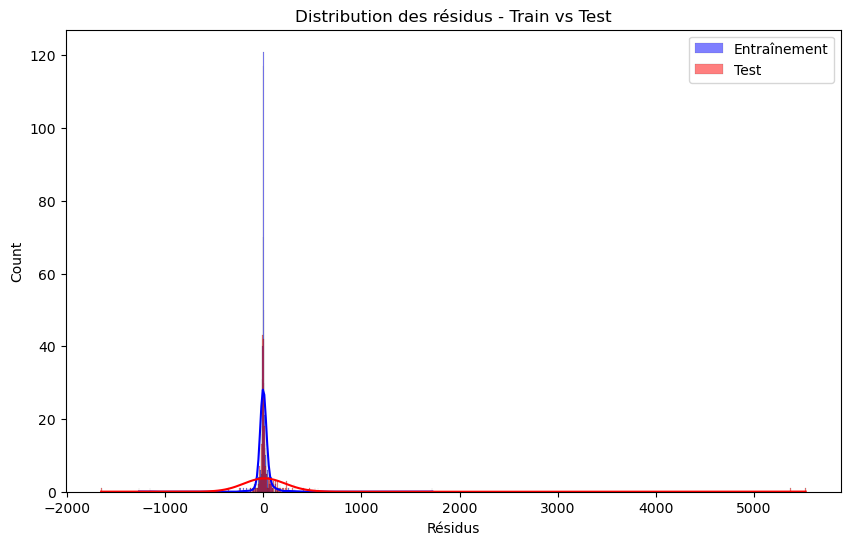

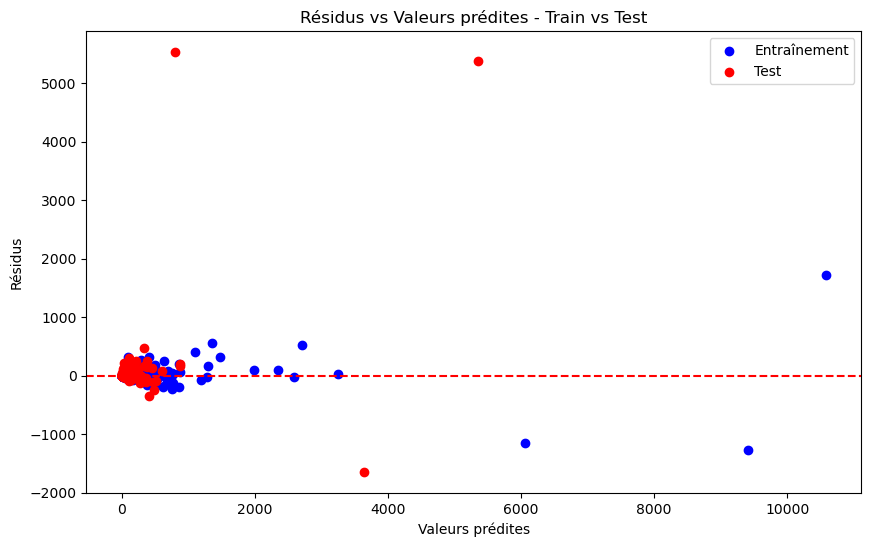


Détail des 10 plus grands résidus sur le test :
      Valeur réelle  Valeur prédite       Résidu
3264        6330.91      804.008362  5526.901638
170        10734.57     5358.853027  5375.716973
98          1990.50     3642.353271 -1651.853271
477          810.70      334.305817   476.394183
420           57.73      411.137695  -353.407695
401          414.43      115.386665   299.043335
308          456.22      212.423187   243.796813
338          632.40      388.663055   243.736945
556          246.83      488.472321  -241.642321
1522         384.85      144.399414   240.450586


In [2010]:
# Calculer les résidus
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Histogramme des résidus sur le train et le test
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, kde=True, color="blue", label="Entraînement")
sns.histplot(residuals_test, kde=True, color="red", label="Test")
plt.title("Distribution des résidus - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites pour les deux ensembles
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, color="blue", label="Entraînement")
plt.scatter(y_test_pred, residuals_test, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()


# Trouver les 10 plus grands résidus en valeur absolue sur le test
top_10_residus_test = residuals_test.abs().sort_values(ascending=False).head(10)

# Récupérer les valeurs réelles et prédites correspondantes sur le test
valeurs_reelles_test_xgb = y_test.loc[top_10_residus_test.index]
valeurs_predites_test_xgb = pd.Series(y_test_pred, index=y_test.index).loc[top_10_residus_test.index]

# Créer un DataFrame récapitulatif des 10 plus grands résidus sur le test
df_top10_residus_test_xgb = pd.DataFrame({
    'Valeur réelle': valeurs_reelles_test_xgb,
    'Valeur prédite': valeurs_predites_test_xgb,
    'Résidu': residuals_test.loc[top_10_residus_test.index]
})

# Afficher les résultats
print("\nDétail des 10 plus grands résidus sur le test :")
print(df_top10_residus_test_xgb)

In [2011]:
# Résumé statistique des résidus sur l'entraînement
describe_residus_train = residuals_train.describe()

# Résumé statistique des résidus sur le test
describe_residus_test = residuals_test.describe()

# Affichage des résumés
print("Résumé statistique des résidus sur l'entraînement :")
print(describe_residus_train)

print("\nRésumé statistique des résidus sur le test :")
print(describe_residus_test)

Résumé statistique des résidus sur l'entraînement :
count     751.000000
mean        6.906535
std       104.689814
min     -1265.726094
25%        -6.731760
50%        -0.077095
75%         8.574679
max      1722.699062
Name: TotalGHGEmissions, dtype: float64

Résumé statistique des résidus sur le test :
count     188.000000
mean       65.940554
std       578.452791
min     -1651.853271
25%        -8.001950
50%         0.690590
75%        22.530128
max      5526.901638
Name: TotalGHGEmissions, dtype: float64


## Analyse des résidus par tranche de la cible

Statistiques des résidus par tranche (Train) :
                       mean         std     median  count
Tranche                                                 
[0-48.13]        -2.490590    8.040064  -0.976011    376
[48.13-173.67]    3.328782   22.212043   2.921252    225
[173.67-313.3]   25.826673   61.040255  28.384661     75
[313.3-2005.55]  50.710626  146.710453  31.517833     67
2005.55+          4.960102  940.925949  62.707512      8

Statistiques des résidus par tranche (Test) :
                         mean         std       median  count
Tranche                                                     
[0-48.13]          -3.345042   15.530050    -1.071781     94
[48.13-173.67]      0.685005   63.676086     5.103528     56
[173.67-313.3]     56.847017  112.923759    65.984830     19
[313.3-2005.55]    40.599176  459.526885   140.733894     17
2005.55+         5451.309305  106.903702  5451.309305      2


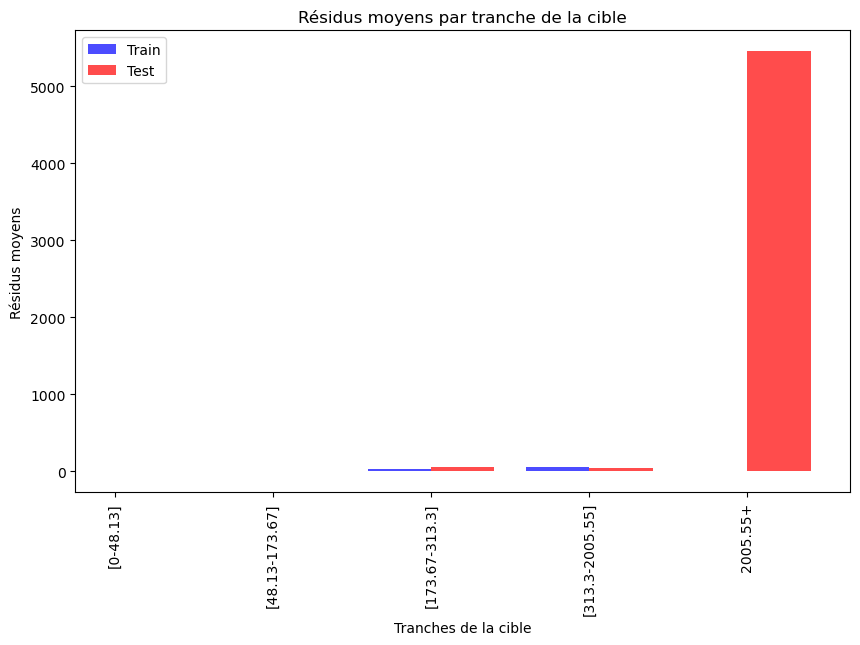

In [2014]:
# Définir les tranches basées sur les statistiques de la cible
bins = [0, 48.13, 173.67, 313.3, 2005.55, np.inf]  # Tranches basées sur les quantiles et std
labels = ['[0-48.13]', 
          '[48.13-173.67]', '[173.67-313.3]', '[313.3-2005.55]',
          '2005.55+']

# Ajout des tranches à l'ensemble d'entraînement et de test
y_train_bins = pd.cut(y_train, bins=bins, labels=labels)
y_test_bins = pd.cut(y_test, bins=bins, labels=labels)

# Ajouter les résidus dans un DataFrame pour simplifier l'analyse
residus_train_df = pd.DataFrame({'Cible': y_train, 'Résidus': residuals_train, 'Tranche': y_train_bins})
residus_test_df = pd.DataFrame({'Cible': y_test, 'Résidus': residuals_test, 'Tranche': y_test_bins})

# Calculer les statistiques des résidus par tranche
stat_residus_train = residus_train_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test = residus_test_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train) :\n", stat_residus_train)
print("\nStatistiques des résidus par tranche (Test) :\n", stat_residus_test)

# Visualiser les résidus moyens par tranche
plt.figure(figsize=(10, 6))
stat_residus_train['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train', width=0.4, position=1)
stat_residus_test['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.show()

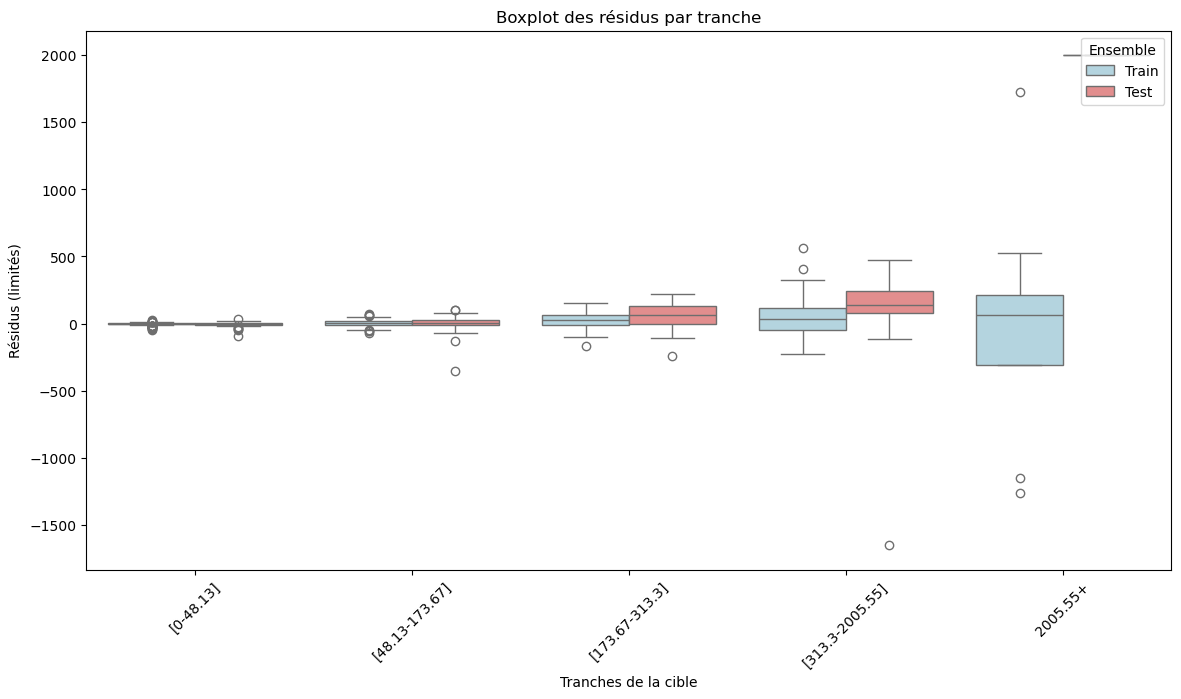

Nombre de valeurs extrêmes : 2
         Cible      Résidus   Tranche Ensemble  Résidu limité
170   10734.57  5375.716973  2005.55+     Test         2000.0
3264   6330.91  5526.901638  2005.55+     Test         2000.0


In [2015]:
# Définir une limite pour les résidus
residus_limite = 2000

# Ajouter une colonne pour différencier les ensembles
residus_train_df['Ensemble'] = 'Train'
residus_test_df['Ensemble'] = 'Test'

# Combiner les deux DataFrames
residus_combined_df = pd.concat([residus_train_df, residus_test_df])

# Ajouter une colonne pour filtrer les valeurs extrêmes
residus_combined_df['Résidu limité'] = residus_combined_df['Résidus'].clip(-residus_limite, residus_limite)

# Créer les boxplots avec limite
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=residus_combined_df,
    x='Tranche',
    y='Résidu limité',
    hue='Ensemble',
    palette={'Train': 'lightblue', 'Test': 'lightcoral'}
)
plt.title("Boxplot des résidus par tranche")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus (limités)")
plt.xticks(rotation=45)
plt.legend(title="Ensemble", loc='upper right')
plt.show()

# Identifier les valeurs extrêmes (hors des limites)
valeurs_extremes = residus_combined_df[
    (residus_combined_df['Résidus'] > residus_limite) | 
    (residus_combined_df['Résidus'] < -residus_limite)
]

# Afficher les valeurs extrêmes
print(f"Nombre de valeurs extrêmes : {len(valeurs_extremes)}")
print(valeurs_extremes)

| **Métrique**                         | **Avant l'ajout de ergystarscore** | **Après l'ajout de ergystarscore** |
|:-------------------------------------|-------------------------------------|--------------------------------------|
| **MAE moyen (validation croisée)**   | 64.79                               | 65.01                                |
| **RMSE moyen (validation croisée)**  | 169.83                              | 254.32                               |
| **R² moyen (validation croisée)**    | 0.797                               | 0.811                                |
| **MAPE moyen (validation croisée)**  | 0.721                               | 0.512                                |
| **R² (train)**                       | 0.957                               | 0.970                                |
| **MAE (train)**                      | 43.65                               | 29.46                                |
| **RMSE (train)**                     | 233.14                              | 104.85                               |
| **MAPE (train)**                     | 0.326                               | 0.240                                |
| **R² (test)**                        | 0.836                               | 0.600                                |
| **MAE (test)**                       | 77.93                               | 107.91                               |
| **RMSE (test)**                      | 338.82                              | 580.67                               |
| **MAPE (test)**                      | 0.619                               | 0.490                                |

Impact sur les données d'entraînement :<br>
L'ajout de ergystarscore améliore les performances du modèle, avec des réductions significatives des erreurs (MAE, RMSE, MAPE) et une légère augmentation du R².

Impact sur les données de test :<br>
L'ajout de la variable entraîne une baisse des performances sur les données de test, avec une diminution du R² et une augmentation du MAE et du RMSE. Toutefois, le MAPE s'améliore légèrement.
En résumé, ergystarscore semble améliorer la précision sur les données d'entraînement mais dégrade les performances sur les données de test, ce qui pourrait suggérer un surajustement.

**Statistiques des résidus par tranche (Train) sans L'EnergyStarScore** :

| Tranche           | mean       | std        | median     | count | % cumulé |
|:------------------|------------|------------|------------|-------|----------|
| [0-48.13]         | -4.362642  | 12.170029  | -1.933293  | 376   | 50.07%   |
| [48.13-173.67]    | 3.816666   | 32.005171  | 3.433372   | 225   | 80.03%   |
| [173.67-313.3]    | 31.179236  | 72.212227  | 25.903358  | 75    | 90.01%   |
| [313.3-2005.55]   | 76.240701  | 172.742612 | 52.297599  | 67    | 98.93%   |
| 2005.55+          | -21.074795 | 1175.800821| 421.230186 | 8     | 100.00%  |

**Statistiques des résidus par tranche (Train) avec L'EnergyStarScore** :

| **Tranche**       | **mean**   | **std**      | **median**  | **count** | **% cumulé** |
|:-----------------|------------|--------------|-------------|-----------|--------------|
| [0-48.13]        | -2.49      | 8.04         | -0.98       | 376       | 50.07%       |
| [48.13-173.67]   | 3.33       | 22.21        | 2.92        | 225       | 80.03%       |
| [173.67-313.3]   | 25.83      | 61.04        | 28.38       | 75        | 90.01%       |
| [313.3-2005.55]  | 50.71      | 146.71       | 31.52       | 67        | 98.93%       |
| 2005.55+         | 4.96       | 940.93       | 62.71       | 8         | 100.00%      |


**Statistiques des résidus par tranche (Test) sans L'EnergyStarScore** :

| Tranche           | mean       | std        | median     | count | % cumulé |
|:------------------|------------|------------|------------|-------|----------|
| [0-48.13]         | -3.329912  | 18.776310  | -0.468673  | 94    | 50.00%   |
| [48.13-173.67]    | 3.387355   | 59.363138  | 7.679504   | 56    | 79.79%   |
| [173.67-313.3]    | 68.117607  | 87.638140  | 71.355996  | 19    | 89.89%   |
| [313.3-2005.55]   | 77.940978  | 376.733074 | 159.073752 | 17    | 98.94%   |
| 2005.55+          | 2310.491160| 3526.584955| 2310.491160| 2     | 100.00%  |

**Statistiques des résidus par tranche (Test) avec L'EnergyStarScore** :

| **Tranche**       | **mean**   | **std**      | **median**  | **count** | **% cumulé** |
|:-----------------|------------|--------------|-------------|-----------|--------------|
| [0-48.13]        | -3.35      | 15.53        | -1.07       | 94        | 50.00%       |
| [48.13-173.67]   | 0.69       | 63.68        | 5.10        | 56        | 79.79%       |
| [173.67-313.3]   | 56.85      | 112.92       | 65.98       | 19        | 89.89%       |
| [313.3-2005.55]  | 40.60      | 459.53       | 140.73      | 17        | 98.94%       |
| 2005.55+         | 5451.31    | 106.90       | 5451.31     | 2         | 100.00%      |


L'ajout de la variable EnergyStarScore a un impact positif sur le modèle pour 99% des données :<br>

- Amélioration des prédictions pour les tranches basses et moyennes (jusqu'à 313.3) sur les ensembles d'entraînement et de test.
- Réduction significative des résidus moyens pour la tranche [313.3-2005.55] sur les ensembles d'entraînement (de 76.24 à 50.71) et de test (de 77.94 à 40.60).
- Le modèle montre une meilleure performance globale pour la majorité des bâtiments, particulièrement ceux avec des émissions moyennes à élevées (mais non extrêmes).
- Seul bémol : dégradation des prédictions pour les valeurs extrêmes (1% des données), surtout sur l'ensemble de test.

En conclusion, l'ajout de l'EnergyStarScore améliore globalement les performances du modèle pour 99% des données, rendant les prédictions plus précises pour la grande majorité des bâtiments.


## Analyse de l'importance des features

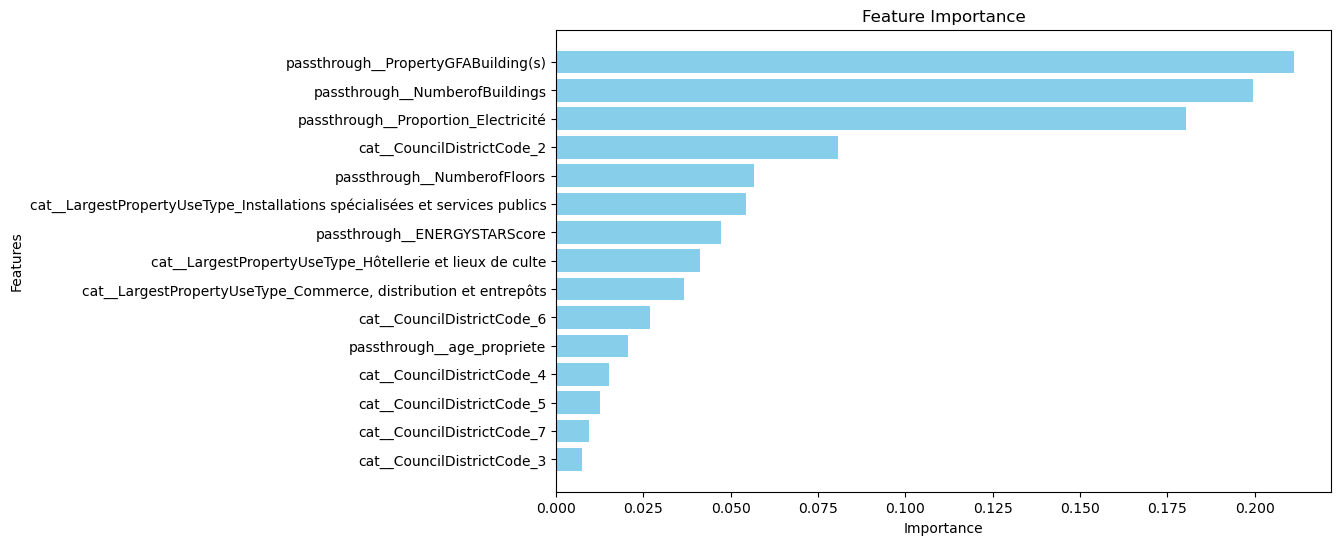

In [2016]:
# Créer un modèle d'encodage isolé pour extraire les noms des colonnes
preprocessing_fitted = preprocessing_v20.fit(X_Energy_train)

# Récupérer les noms des colonnes après transformation
column_names = preprocessing_fitted.get_feature_names_out()

# Récupérer les importances des caractéristiques du modèle entraîné
feature_importances =  pipeline_xgb_v3.named_steps['model'].regressor_.feature_importances_

# Associer les noms des colonnes aux importances
feature_importances_df = pd.DataFrame({
    'Feature': column_names,
    'Importance': feature_importances
})

# Trier les colonnes par ordre d'importance décroissant
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverser l'axe pour avoir les plus importantes en haut
plt.show()

In [2017]:
feature_importances_df

Feature  Importance
11                passthrough__PropertyGFABuilding(s)    0.211271
13                     passthrough__NumberofBuildings    0.199472
9                 passthrough__Proportion_Electricité    0.180393
3                          cat__CouncilDistrictCode_2    0.080725
12                        passthrough__NumberofFloors    0.056607
2   cat__LargestPropertyUseType_Installations spéc...    0.054295
14                       passthrough__ENERGYSTARScore    0.047333
1   cat__LargestPropertyUseType_Hôtellerie et lieu...    0.041155
0   cat__LargestPropertyUseType_Commerce, distribu...    0.036604
7                          cat__CouncilDistrictCode_6    0.026764
10                         passthrough__age_propriete    0.020737
5                          cat__CouncilDistrictCode_4    0.015264
6                          cat__CouncilDistrictCode_5    0.012513
8                          cat__CouncilDistrictCode_7    0.009404
4                          cat__CouncilDistrictCode_3    0.007463

Analyse de l'impact de l'ajout de l'ENERGYSTARScore sur l'importance des features :<br>
- ENERGYSTARScore :<br>
Se positionne en 7ème place avec une importance de 4.73%<br>
Contribue de manière modérée au modèle<br>
- Changements majeurs :<br>
PropertyGFABuilding(s) : reste en 1ère position mais baisse de 23.98% à 21.13%<br>
NumberofBuildings : monte de la 4ème à la 2ème place, passant de 7.73% à 19.95%<br>
Proportion_Electricité : passe de la 2ème à la 3ème place, baissant de 22.39% à 18.04%<br>
- Autres changements notables :<br>
NumberofFloors : baisse de la 3ème à la 5ème place<br>
CouncilDistrictCode_2 : monte de la 8ème à la 4ème place<br>

Conclusion :<br>
L'ajout de l'ENERGYSTARScore a redistribué l'importance des features, notamment en renforçant l'impact du nombre de bâtiments et en réduisant légèrement l'influence de la surface et de la proportion d'électricité. Cela suggère que l'ENERGYSTARScore apporte une information complémentaire pertinente au modèle.

## Interprétation du modèle avec SHAP

In [2021]:
# Extraire le modèle XGBoost du TransformedTargetRegressor
xgb_model = pipeline_xgb_v3.named_steps['model'].regressor_

# Appliquer les transformations de prétraitement sur les données d'entraînement et de test
X_train_preprocessed =  pipeline_xgb_v3.named_steps['preprocessing'].transform(X_Energy_train)
X_test_preprocessed =  pipeline_xgb_v3.named_steps['preprocessing'].transform(X_Energy_test)

# Créer l'explainer SHAP pour le modèle XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Calcul des valeurs SHAP pour les données de test
shap_values = explainer.shap_values(X_test_preprocessed)

# Obtenir les noms des caractéristiques transformées
feature_names =  pipeline_xgb_v3.named_steps['preprocessing'].get_feature_names_out()

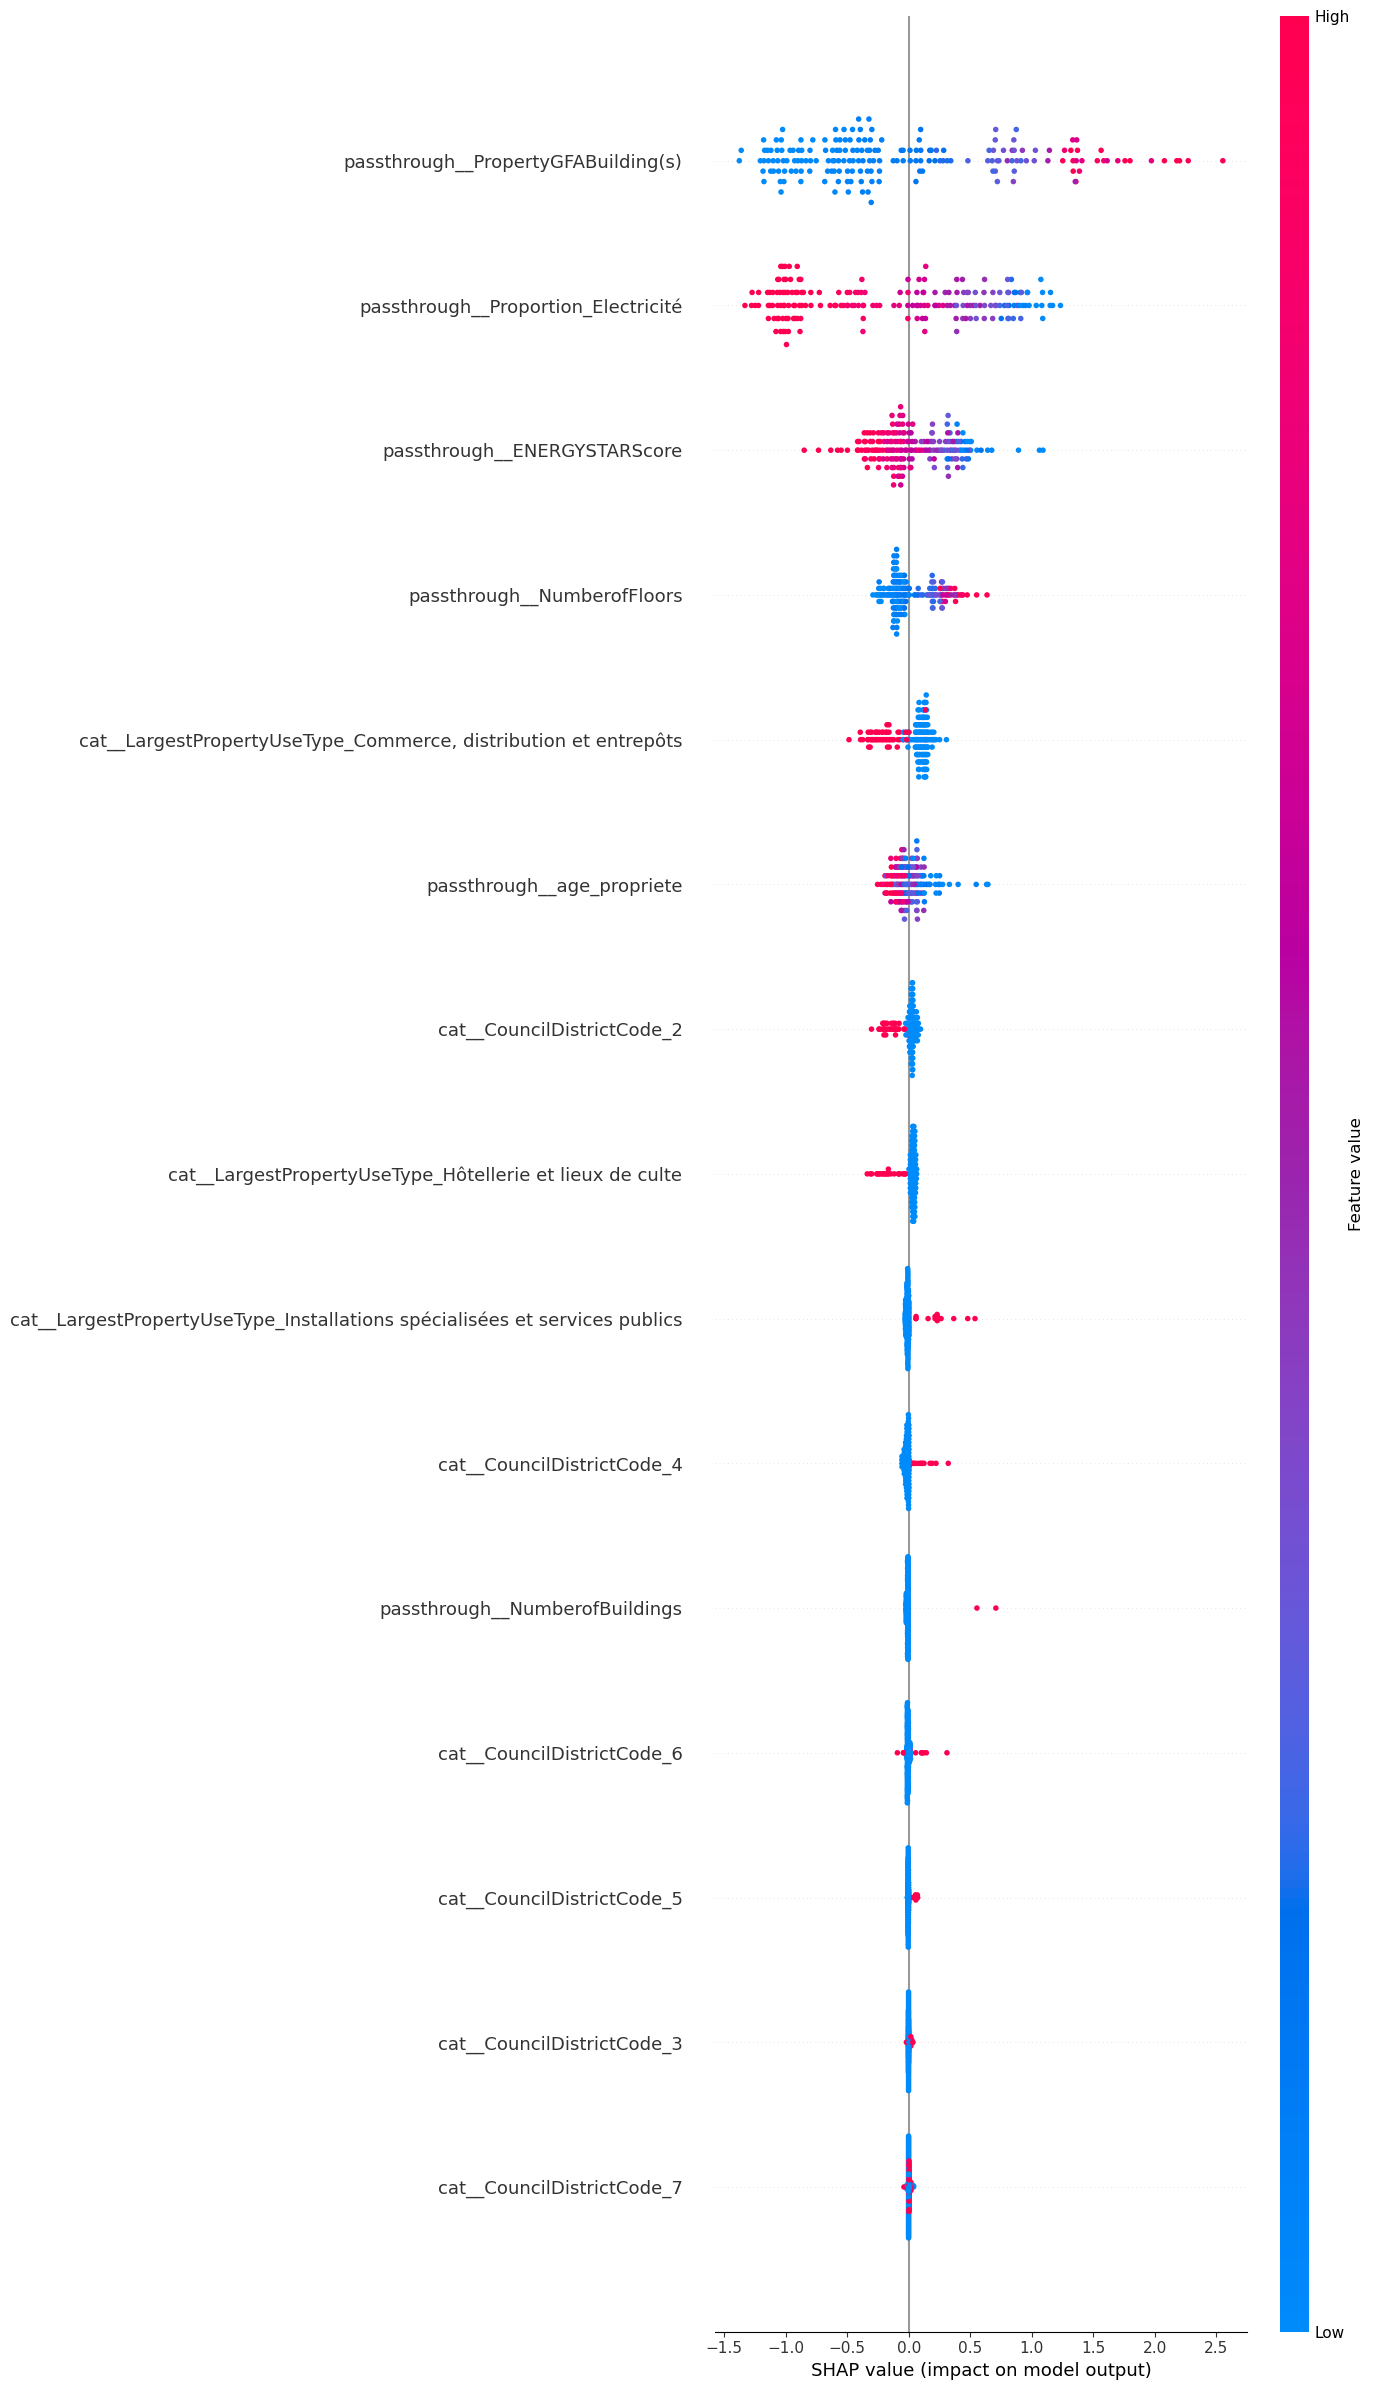

In [2022]:
# Visualiser les résultats avec un summary plot
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names, plot_size=(14, 24), max_display=20)

Analyse comparative des valeurs SHAP avant et après l'ajout de l'ENERGYSTARScore :<br>
- PropertyGFABuilding(s) :<br>
Avant et après : Reste la feature la plus importante avec le même impact.<br>
Impact inchangé : Les grands bâtiments augmentent la prédiction, les petits la diminuent.<br>
- Proportion_Electricité :<br>
Impact constant : Une proportion élevée d'électricité diminue la prédiction.<br>
- ENERGYSTARScore (nouvelle feature) :<br>
Se place en 3ème position d'importance.<br>
Impact : Un score élevé diminue la prédiction, un score faible l'augmente.<br>
Cohérent avec le principe du score Energy Star.<br>
- NumberofFloors :<br>
Avant : 3ème feature la plus importante.<br>
Après : 4ème place, impact similaire.<br>
Impact constant : Plus d'étages augmente la prédiction.<br>
- Autres features (Commerce/distribution/entrepôts, age_propriété, District 2/hôtellerie/lieu de culte) :<br>
Conservent leurs impacts et leur ordre d'importance relatif.<br>

Conclusion :<br>
L'ajout de l'ENERGYSTARScore a principalement :<br>
Introduit une nouvelle dimension cohérente avec l'efficacité énergétique.<br>
Légèrement réorganisé l'importance relative des features existantes.<br>
Maintenu la cohérence et la direction des impacts des autres variables.<br>

L'ENERGYSTARScore apporte une information complémentaire pertinente sans perturber la logique globale du modèle.

# Conclusion générale sur l'ajout de la variable *EnergyStarScore*

L'ajout de la variable *EnergyStarScore* a un impact contrasté sur les performances du modèle et la structure des prédictions.

**Améliorations constatées :**  
- Sur l'ensemble d'entraînement, l'ajout de cette variable **réduit significativement les erreurs** (MAE, RMSE, MAPE) et **augmente légèrement le R²**, indiquant une meilleure capacité du modèle à capturer la variance des données.  
- Pour **99% des observations**, l'intégration de *EnergyStarScore* améliore la précision des prédictions, en particulier pour les bâtiments aux **émissions moyennes à élevées**.  
- En termes d'importance des variables, cette nouvelle feature apporte une **information complémentaire cohérente** avec l'efficacité énergétique et se positionne directement comme une variable significative du modèle.  

**Limites et risques identifiés :**   
- Les **valeurs extrêmes (1% des observations)** voient une dégradation notable des prédictions, en particulier sur l'ensemble de test.  

**Conclusion finale :**  
L'intégration de *EnergyStarScore* **améliore la précision du modèle pour la majorité des données** et apporte une information pertinente sur l'efficacité énergétique. Cependant, l'impact négatif sur les valeurs extrêmes suggèrent une **nécessité d'ajuster le modèle** (ex. régularisation, sélection de features, traitement des valeurs aberrantes) pour garantir une généralisation robuste.